# 環境構築



*   Pythonモジュールへのパス追加





In [3]:
!pwd

/mnt/MachineLearning/NoteBook/NumDropletsRoI


In [4]:
# import os

# os.chdir("/mnt/MachineLearning")

In [5]:
import sys
sys.path.append('/mnt/MachineLearning/modules')

In [6]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import interpolate
import show_mod

# 前処理

In [4]:
#読み込むデータのパスの設定

# data_path = './data'
# input_list = glob.glob(data_path+"/*"+"/inputdata.csv")

# input_list

In [5]:
#input(空調条件等)の読み込み
# df_input = None

# for input_fname in input_list:
#     df_read = pd.read_csv(input_fname, index_col="case_name")
#     if df_input is None:
#         df_input = df_read
#     else:
#         df_input = pd.concat([df_input, df_read])

# df_input

In [6]:
#空調条件のみ抽出
# df_meta = df_input.loc[:, ['aircon', 'ventilation', 'exhaust']]

# df_meta

In [7]:
#排気口位置a,b,offをダミー変数化

# df_meta = pd.get_dummies(df_meta, columns=['exhaust'])
# # dummies = pd.get_dummies(df_input['exhaust'])
# # df_input.drop("exhaust", axis=1, inplace=True)
# # df_input = pd.concat([df_input, dummies], axis=1)
# # df_input = df_input.reindex(columns=['aircon','ventilation','exhaust_a','b','off'
# #           ,'1_x','1_y','1_z','1_angle','2_x','2_y','2_z','2_angle','3_x','3_y','3_z','3_angle'
# #           ,'4_x','4_y','4_z','4_angle','5_x','5_y','5_z','5_angle',"office_size_x","office_size_y"
# #           ,"aircon_position_x","aircon_position_y"])

# df_meta

# データ追加（2022/10/26）

- データ数：from 263 to 431
- オフィス数：from 9 to 15 (ID : 1,2,3,4,5,6,7,8,9,10,14,15,16,22,28)

In [8]:
# df_count = pd.read_csv("./CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv", index_col="casename")
df_count = pd.read_csv("/mnt/MachineLearning/CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv")
df_count

,casename,num_drop,volume[ml],RoI
0,office2_0_0,6739.4,0.000067,204.224242
1,office2_0_164_aout,7865.4,0.000063,238.345455
2,office2_0_164_bout,6049.8,0.000062,183.327273
3,office2_0_246_aout,7934.4,0.000050,240.436364
4,office2_0_246_bout,7662.0,0.000082,232.181818
...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727
427,office3_960_246_aout,4428.0,0.000073,134.181818
428,office3_960_246_bout,3890.0,0.000066,117.878788
429,office3_960_82_aout,5221.2,0.000072,158.218182


In [9]:
def get_val_from_casename(casename:str, index:int):
    return float(casename.split("_")[index])

print(get_val_from_casename("office2_0_164_aout", 2))

164.0


In [10]:
def get_exhaust_from_casename(casename:str):
    s_split = casename.split("_")
    if len(s_split) == 4:
        exhaust_str = s_split[3]
        if exhaust_str == "aout":
            exhaust = "a"
        elif exhaust_str == "bout":
            exhaust = "b"
    else:
        exhaust = "off"
        
    return exhaust

print(get_exhaust_from_casename("office2_0_164"))

off


In [11]:
# df_count["aircon"] = df_count["casename"].apply(get_val_from_casename, args=(1,))
# df_count["ventilation"] = df_count["casename"].apply(get_val_from_casename, args=(2,))
# df_count["exhaust"] = df_count["casename"].apply(get_exhaust_from_casename)
                                                     
# df_count

In [12]:
# df_summary = df_count

In [13]:
# df_summary.to_csv("/mnt/MachineLearning/data/summary_221015.csv", index=False)

# データ取り込み

In [7]:
df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_20221216.csv")

df_summary

,case_name,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand
0,office2_0_0,office2,0.0,0.0,off,6739.4,204.224242,902.212978,3665.252246
1,office2_0_164_aout,office2,0.0,164.0,a,7865.4,238.345455,594.272879,3491.917804
2,office2_0_164_bout,office2,0.0,164.0,b,6049.8,183.327273,432.678869,2354.737770
3,office2_0_246_aout,office2,0.0,246.0,a,7934.4,240.436364,326.691514,2902.480532
4,office2_0_246_bout,office2,0.0,246.0,b,7662.0,232.181818,562.535441,2757.177704
...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,b,5117.4,155.072727,779.372047,3209.723128
427,office3_960_246_aout,office3,960.0,246.0,a,4428.0,134.181818,1662.486855,3671.024626
428,office3_960_246_bout,office3,960.0,246.0,b,3890.0,117.878788,1343.338436,3968.834276
429,office3_960_82_aout,office3,960.0,82.0,a,5221.2,158.218182,1130.875541,4683.139767


In [8]:
#排気口位置a,b,offをダミー変数化

df_total = pd.get_dummies(df_summary, columns=['exhaust'])
df_total

,case_name,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off
0,office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1
1,office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0
2,office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0
3,office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0
4,office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0
427,office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0
428,office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0
429,office3_960_82_aout,office3,960.0,82.0,5221.2,158.218182,1130.875541,4683.139767,1,0,0


In [9]:
df_total = df_total.set_index('case_name')

In [10]:
df_total["n_from2sec/S"]

case_name
office2_0_0             204.224242
office2_0_164_aout      238.345455
office2_0_164_bout      183.327273
office2_0_246_aout      240.436364
office2_0_246_bout      232.181818
                           ...    
office3_960_164_bout    155.072727
office3_960_246_aout    134.181818
office3_960_246_bout    117.878788
office3_960_82_aout     158.218182
office3_960_82_bout     160.024242
Name: n_from2sec/S, Length: 431, dtype: float64

In [53]:
# binning
# labels=False: index_labeling
# df_total["n_from2sec/S_bin"] = pd.qcut(df_total["n_from2sec/S"], 4, labels=False)
df_total["countTimeMean_bin"] = pd.qcut(df_total["countTimeMean_sit2stand"], 4, labels=False)

df_total

,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off,n_from2sec/S_bin,countTimeMean_bin
case_name,,,,,,,,,,,,
office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1,3,3
office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0,3,3
office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0,2,2
office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0,3,3
office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0,1,3
office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0,0,3
office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0,0,3


In [12]:
# # df_meta.join(df_count)
# df_total = pd.merge(df_meta, df_count, left_index=True, right_index=True)

# df_total

In [54]:
df_total.std(numeric_only=True)

aircon                     360.876287
ventilation                 83.985694
n_from2sec                 921.844114
n_from2sec/S                36.376848
countTimeMean_sit          219.342164
countTimeMean_sit2stand    758.168789
exhaust_a                    0.495869
exhaust_b                    0.495869
exhaust_off                  0.344132
n_from2sec/S_bin             1.120371
countTimeMean_bin            1.120371
dtype: float64

In [55]:
from sklearn import preprocessing

#meta(condifion of air)データの標準化
stdscaler = preprocessing.StandardScaler()
df_meta = df_total[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]]
stdscaler.fit(df_meta)
df_meta_array = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_array, index=df_total.index, columns=df_meta.columns)
# df_total_standardized = pd.DataFrame(df_total_tf, index=df_total.index, columns=df_total.columns)
df_meta_standardized

# df_input_std = df_input.copy()
# for i in range(int(input_std.shape[1])):
#     df_input_std.iloc[:, i] = input_std[:, i]


,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249
...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249


In [56]:
# df_ml = df_meta_standardized.join(df_total[["office", "n_from2sec/S", "countTimeMean_sit2stand"]])
df_ml = df_meta_standardized.join(df_total[["office", "countTimeMean_bin"]])
df_ml

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,countTimeMean_bin
case_name,,,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993,office2,3
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249,office2,3
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249,office2,2
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249,office2,3
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249,office2,3
...,...,...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249,office3,3
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249,office3,3
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249,office3,3


In [22]:
# import numpy as np
# import pointCloud_sampling as pcs

# # rng = np.random.default_rng()

# #予め点群をサンプリングしておいたものを取得
# sampledPointCloud_dict = pcs.read_sampledPointCloud('/content/drive/MyDrive/ML/PointNetTrial/data/pointCloud_sampled')

# sampledPointCloud_dict

In [23]:
officemodel_path = '/mnt/MachineLearning/Office3DModel/model_origin'
# office_list = os.listdir(officemodel_path)
# case_list = [s.replace('office', 'case') for s in os.listdir(data_path)]
case_list = os.listdir(officemodel_path)
print(case_list)
# office_list = ['office1', 'office2', 'office3', 'office7', 'office10', 'office15', 'office16', 'office22', 'office28']
# print(office_list)

['case1', 'case10', 'case11', 'case12', 'case13', 'case14', 'case15', 'case16', 'case17', 'case18', 'case19', 'case2', 'case20', 'case21', 'case22', 'case23', 'case24', 'case25', 'case26', 'case27', 'case28', 'case29', 'case3', 'case30', 'case31', 'case32', 'case33', 'case4', 'case5', 'case6', 'case7', 'case8', 'case9']


点数memo

- aircon: 580
- airvent: 8
- room: 20
- desks: 1800~1825
- bosy: 約26500

In [ ]:
import os
import random
import numpy as np
import json
import glob
from stl import mesh
from enum import Enum, auto

# 列挙型の定義
class OfficePart(Enum):
    aircon = auto()
    airvent = auto()
    body = auto()
    room = auto()
    desks = auto()


"""
データの前処理

オフィスモデル（STLファイル）を読み込み、点群情報のみ取り出し、
ランダムサンプリングで指定個の点群(ndarray)にする。


aircon: air conditioner
airvent: hole of Air vent
body: body of human
layout: deskd and walls
"""


# 列挙型のメンバーの列挙
for part in OfficePart:
    print(part)
    
NUM_POINTS = 2048

pointCloud_dict = {}
for casename in case_list:
    officename = casename.replace('case', 'office') 
    
    #まずは単純に読み込み、辞書に格納
    pc_dict = {}
    for part in OfficePart:
        path = officemodel_path + '/' + casename + '/' + part.name
        # print(path)
        stl_list = glob.glob(path + "/*.stl")
        # print(stl_list)
        pc_list = []
        for stlfname in stl_list:
            for mesh_read in mesh.Mesh.from_multi_file(stlfname):
                points = mesh_read.points.reshape([-1, 3])
                pc_list.append(points)

        points_concat = np.concatenate(pc_list)
        points_concat = np.unique(points_concat, axis=0)
        pc_dict[part] = points_concat.copy()
                        
            
    """
    ここから都合合わせのため調整
    """
    pc_dict_modified = {}

    pc_dict_modified["aircon"] = pc_dict[OfficePart.aircon]
    pc_dict_modified["airvent"] = pc_dict[OfficePart.airvent]
    
    pc_body = pc_dict[OfficePart.body]
    rand_list = random.sample(range(len(pc_body)), k=2048)
    pc_dict_modified["body"] = pc_body[rand_list, :]
    
    pc_room = pc_dict[OfficePart.room]
    num_sampling_desks = 1024 - len(pc_room)
    print("num_sampling_desks = ", num_sampling_desks)
    pc_desks = pc_dict[OfficePart.desks]
    rand_list = random.sample(range(len(pc_desks)), k=num_sampling_desks)
    pc_sampled_desks = pc_desks[rand_list, :]
    pc_dict_modified["layout"] = np.concatenate([pc_room, pc_sampled_desks])
    
    
    pointCloud_dict[officename] = pc_dict_modified


In [16]:
pcFilePath = '/mnt/MachineLearning/Office3DModel/PointCloud_sampled/PointCloud_dict_test.npy'

In [17]:
# import numpy as np

# np.save(pcFilePath, pointCloud_dict, allow_pickle='TRUE')

In [18]:
import numpy as np

a = np.load(pcFilePath, allow_pickle='TRUE')    # 0-D Array で返ってくる
pointCloud_dict = a.item()
pointCloud_dict

{'office1': array([[2.5     , 2.25    , 2.6     ],
        [2.5     , 2.375   , 2.6     ],
        [2.5     , 2.45    , 2.6     ],
        ...,
        [3.825   , 1.733333, 0.7     ],
        [0.925   , 2.875   , 0.05    ],
        [1.495   , 1.278333, 0.53    ]], dtype=float32),
 'office10': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
        ...,
        [3.9725  , 2.275   , 0.7     ],
        [3.065   , 4.078333, 0.48    ],
        [1.485   , 2.533333, 0.7     ]], dtype=float32),
 'office11': array([[3.       , 2.5      , 2.6      ],
        [3.       , 2.625    , 2.6      ],
        [3.       , 2.7      , 2.6      ],
        ...,
        [3.96     , 4.305    , 0.53     ],
        [3.45     , 3.183333 , 0.75     ],
        [2.7      , 5.1      , 0.2833333]], dtype=float32),
 'office12': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
     

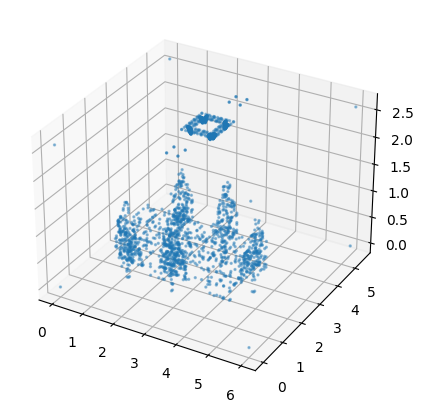

In [19]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    plt.show()
    
plot3d_points(pointCloud_dict['office1'])

In [20]:
# import numpy as np
# '''
# 点群シャッフルによるデータ増強
# よく考えると無意味だと思う
# '''
# rng = np.random.default_rng()

# pointCloud_augumented_dict = {}
# for office_name, pointCloud in sampledPointCloud_dict.items():
#     pc_list = []
#     for i in range(4):
#         pc = pointCloud.copy()

#         if i >= 1:
#             #点群のシャッフル
#             rng.shuffle(pc)

#         pc_list.append(pc)

#     pointCloud_augumented_dict[office_name] = pc_list

# pointCloud_augumented_dict

In [21]:
# plot3d_points(pointCloud_augumented_dict['office10'][0])
# plot3d_points(pointCloud_augumented_dict['office10'][1])
# plot3d_points(pointCloud_augumented_dict['office10'][2])
# plot3d_points(pointCloud_augumented_dict['office10'][3])

In [22]:
# def get_augumented_dataset():
#     '''
#     点群データ増強に合わせて、メタデータや感染リスク分布のデータも複製して増やす
#     '''
#     case_index_list = list(df_total.index)
#     # case_index_list = list(df_total["casename"])


#     case_index_augumented_list = []

#     pointCloudArray_list = []
#     metaArray_list = []

#     RoI_list = []

#     for case_index in case_index_list:
#         office_name = case_index.split('_', maxsplit=1)[0]
#         pc_list = pointCloud_augumented_dict[office_name]
#         for augumentID, pointCloud in enumerate(pc_list):
#             case_index_augumented_list.append(case_index + '-' + str(augumentID))
#             pointCloudArray_list.append(pointCloud)
#             metaArray_list.append(df_meta_standardized.loc[case_index])
#             # RoI_list.append(df_total["RoI"].loc[case_index])
#             RoI_list.append(df_total["count_timeMean"].loc[case_index])

#     case_index_array = np.array(case_index_augumented_list)
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pointCloudArray = np.array(pointCloudArray_list)
    
#     return case_index_array, pointCloudArray, metaArray, RoIArray

# X_index, X_pc, X_meta, y = get_augumented_dataset()

In [23]:
# def get_officeDataset(officename_list:list, df_core:pd.DataFrame, pointCloud_dict:dict, shuffle:bool):
#     """
#     Return a certain office Dataset.
#     You can specify List of offices.
#     """
    
#     df_main = pd.DataFrame()
    
#     for officename in officename_list:
#         df = df_core[ df_core["office"]==officename ]
#         df_main = pd.concat([df_main, df])
        
#     if shuffle:
#         df_main = df_main.sample(frac=1, random_state=0)
        
#     # meke Dictionary of pointCloudList in order of MainDataFrame
#     pc_list_dict = {"aircon":[], "airvent":[], "body":[], "layout":[], }
#     for officename in df_main["office"]:
#         for key, pc_list in pc_list_dict.items():
#             pc_list.append(pointCloud_dict[officename][key])
            
#     # make input-Dictionary and to ND-Array
#     input_dict = {"meta":df_main[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off", ]]}
#     for key, pc in pc_list_dict.items():
#         input_dict[f"pointCloud_{key}"] = np.array(pc)
                
#     return input_dict, df_main["countTimeMean_sit2stand"]
        

In [24]:
def get_officeDataset(
    officename_list:list,
    df_core:pd.DataFrame,
    pointCloud_dict:dict,
    objective_col:str,
    shuffle:bool,
    standardize_pointCloud=True
):
    """
    Return a certain office Dataset.
    You can specify List of offices.
    """
    
    df_main = pd.DataFrame()
    
    for officename in officename_list:
        df = df_core[ df_core["office"]==officename ]
        df_main = pd.concat([df_main, df])
        
    if shuffle:
        df_main = df_main.sample(frac=1, random_state=0)
        
    # meke Dictionary of pointCloudList in order of MainDataFrame
    pc_list = []
    for officename in df_main["office"]:
        pc_list.append(pointCloud_dict[officename])
        
    pc_array = np.array(pc_list)
    
    if standardize_pointCloud:
        pc_array = ( pc_array - pc_array.mean() ) / pc_array.std()
            
    # make input-Dictionary and to ND-Array
    input_dict = {
        "meta":df_main[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off", ]],
        "pointCloud":pc_array,
    }
                
    # return input_dict, df_main["countTimeMean_sit2stand"]
    # return input_dict, df_main["n_from2sec/S"]
    return input_dict, df_main[objective_col]
        

In [57]:
X_dict_sample, y_sample = get_officeDataset(
    list(df_ml["office"].unique()),
    df_ml, pointCloud_dict, "countTimeMean_bin",
    standardize_pointCloud=True,
    shuffle=True
)

In [58]:
X_dict_sample

{'meta':                         aircon  ventilation  exhaust_a  exhaust_b  exhaust_off
 case_name                                                                     
 office6_0_246_aout   -1.384552     1.265523   1.147695  -0.871311    -0.398249
 office5_660_0         0.446455    -1.666952  -0.871311  -0.871311     2.510993
 office15_960_82_aout  1.278731    -0.689460   1.147695  -0.871311    -0.398249
 office4_660_82_bout   0.446455    -0.689460  -0.871311   1.147695    -0.398249
 office2_360_246_aout -0.385821     1.265523   1.147695  -0.871311    -0.398249
 ...                        ...          ...        ...        ...          ...
 office10_0_246_bout  -1.384552     1.265523  -0.871311   1.147695    -0.398249
 office4_360_82_bout  -0.385821    -0.689460  -0.871311   1.147695    -0.398249
 office1_960_246_aout  1.278731     1.265523   1.147695  -0.871311    -0.398249
 office15_660_82_aout  0.446455    -0.689460   1.147695  -0.871311    -0.398249
 office6_960_0         1.278731 

In [59]:
y_sample

case_name
office6_0_246_aout      0
office5_660_0           1
office15_960_82_aout    0
office4_660_82_bout     2
office2_360_246_aout    0
                       ..
office10_0_246_bout     3
office4_360_82_bout     2
office1_960_246_aout    0
office15_660_82_aout    2
office6_960_0           2
Name: countTimeMean_bin, Length: 431, dtype: int64

In [60]:
y_sample.nunique()

4

In [29]:
# def get_dataset(df_main, df_meta):
#     '''
#     説明変数と目的変数をNDArrayに変換する
#     '''
    
#     pc_aircon_list = []
#     pc_airvent_list = []
#     pc_body_list = []
#     pc_layout_list = []
    
#     metaArray_list = []

#     RoI_list = []

#     for index, row in df_total.iterrows():
#         office_name = row["office"]
#         pc_aircon_list.append(pointCloud_dict[office_name]["aircon"])
#         pc_airvent_list.append(pointCloud_dict[office_name]["airvent"])
#         pc_body_list.append(pointCloud_dict[office_name]["body"])
#         pc_layout_list.append(pointCloud_dict[office_name]["layout"])
        
#         metaArray_list.append(df_meta_standardized.loc[index])
            
#         RoI_list.append(df_main["countTimeMean_sit2stand"].loc[index])
#         # RoI_list.append(df_main["count_timeMean"].loc[case_index])

#     officename_array = df_total["office"].to_numpy()
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pc_aircon_array = np.array(pc_aircon_list)
#     pc_airvent_array = np.array(pc_airvent_list)
#     pc_body_array = np.array(pc_body_list)
#     pc_layout_array = np.array(pc_layout_list)
    
#     pc_array_dict = {"aircon":pc_aircon_array, "airvent":pc_airvent_array, "body":pc_body_array, "layout":pc_layout_array}
    
#     return officename_array, pc_array_dict, metaArray, RoIArray.reshape(-1,1)


In [30]:
# X_officename, X_pc_dict, X_meta, y = get_dataset(df_total, df_meta)

# # print(X_pc.max())
# # X_pc /= X_pc.max() #Normalization
# # print(X_pc.max())

# for key, X_pc in X_pc_dict.items():
#     #Standardization
#     X_pc_dict[key] = ( X_pc - X_pc.mean() ) / X_pc.std()
    
    
# # l_mul = map(lambda X_pc: ( X_pc - X_pc.std() ) / X_pc.std(), X_pc_list)
# # # print(list(l_mul))

# # X_pc_airvent.std()

In [61]:
import sys

def standardization_test(X:np.ndarray):
    """
    標準化されているかをテスト
    """
    threshold = 1.e-5
    
    if abs(X.mean()) > threshold:
        sys.stderr.write(f'StandardizationError: mean= {X.mean()}\n')
        
    if abs(X.std() - 1.) > threshold:
        sys.stderr.write(f'StandardizationError: std= {X.std()}')
        

In [62]:
# print(X_officename.shape)

for key, value in X_dict_sample.items():
    if key == "meta":
        for column_name, item in value.iteritems():
            X = item.values
            standardization_test(X)
            print(column_name)
            print(X.shape, X.mean(), X.std())
        
    else:
        standardization_test(value)
        
        standardization_test(X)
        print(key)
        print(X.shape, X.mean(), X.std())
    
# print(X_meta.shape, X_meta.mean(), X_meta.var())

# print(y.shape, y.mean(), y.var())

aircon
(431,) 5.976142499142374e-17 1.0
ventilation
(431,) 1.772235361814635e-16 0.9999999999999999
exhaust_a
(431,) -4.12147758561543e-17 0.9999999999999999
exhaust_b
(431,) -2.472886551369258e-17 0.9999999999999998
exhaust_off
(431,) -2.2668126720884866e-17 1.0
pointCloud
(431,) -2.2668126720884866e-17 1.0


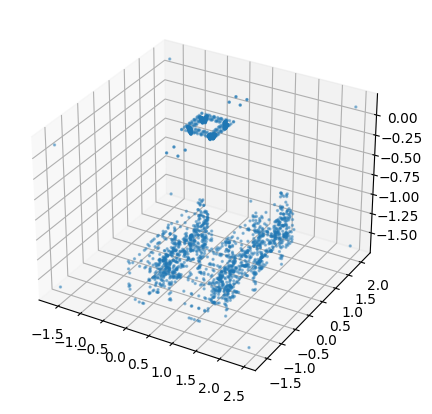

In [33]:
plot3d_points(X_dict_sample["pointCloud"][0, :,:])

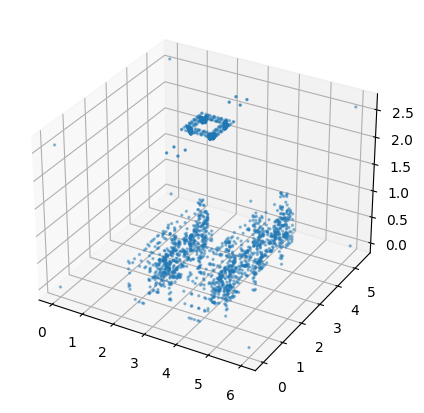

In [34]:
plot3d_points(pointCloud_dict["office6"])

# チューニング

In [35]:
office_list = list(df_total["office"].unique())
# office_list = ["office1", "office2", "office3", "office4", "office5", "office6", ]

office_list

['office2',
 'office15',
 'office14',
 'office1',
 'office22',
 'office6',
 'office4',
 'office16',
 'office8',
 'office9',
 'office7',
 'office10',
 'office28',
 'office5',
 'office3']

In [36]:
test_office_list = ["office1", "office7", "office10", "office16", "office22", "office28", ]
# test_office_list = office_list

test_office_list

['office1', 'office7', 'office10', 'office16', 'office22', 'office28']

In [37]:
from tensorflow.python.client import device_lib; print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12977095142919276741
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9739763712
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12932115773935301294
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2022-12-22 03:12:04.786663: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /device:GPU:0 with 9288 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [38]:
# def conv_bn(x, filters):
#     x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
#     x = layers.BatchNormalization(momentum=0.0)(x)
#     return layers.Activation("relu")(x)


In [68]:
from tensorflow import keras
import PointNet

def myPointNet(trial, input_pointCloud:keras.Input):
        
    hp_conv_layers = trial.suggest_int('conv_layers', 1, 3, step=1)
    
    x = input_pointCloud
    for i in range(hp_conv_layers):
        hp_filters = trial.suggest_int(f'filters-{i}', 32, 256, step=32)
        
        x = PointNet.conv_bn(x, hp_filters)
        
#         x = keras.layers.Conv1D(hp_filters, kernel_size=1, padding="valid")(x)
#         x = keras.layers.BatchNormalization(momentum=0.99)(x)       
#         x = keras.layers.ReLU()(x)
    
    return keras.layers.GlobalMaxPooling1D()(x)

In [126]:
from PointNet import conv_bn
from tensorflow import keras

db_path = '/mnt/MachineLearning/OptunaLog/classification_countTimeMean.db'


def total_model_builder(trial):
    """
    感染リスク分布予測モデル

    順序不変性モデルに、メタデータ（空調条件）を合流させ、MLPで感染リスク予測

    KerasTunerから呼び出され、ハイパーパラメータをチューニングする
    """
    
    input_list = []
    features_list = []
    for key, value in X_dict_sample.items():
        if key == "meta":
            # MetaData
            input_meta = keras.Input(shape=(len(value.columns), ), name='meta')
            
            # append metaData to input_list
            input_list.append(input_meta)

            # append metaData to features_list
            features_list.append(input_meta)
            
        elif key == "pointCloud":
            # PointCloud
            input_pc = keras.Input(shape=(value.shape[1], 3), name=key)

            # append pointClouds to input_list
            input_list.append(input_pc)

            # append feturesOfPointClouds to features_list
            features_list.append(myPointNet(trial, input_pointCloud=input_pc))
        
    
    x = keras.layers.Concatenate()(features_list)
    
    hp_dense_layers = trial.suggest_int('dense_layers', 0, 4, step=1)
    if hp_dense_layers > 0:
        hp_activation = trial.suggest_categorical('activation', ["ReLU", "LeakyReLU", "ELU"])
        hp_dropout = trial.suggest_categorical('dropout', [None, 0.3, 0.5])
    
    for i in range(hp_dense_layers):
        hp_units = trial.suggest_int(f'units-{i}', 64, 512, step=64)
        x = keras.layers.Dense(hp_units)(x)
        
        if hp_activation == "ReLU":
            x = keras.layers.ReLU()(x)
        elif hp_activation == "LeakyReLU":
            x = keras.layers.LeakyReLU()(x)
        elif hp_activation == "ELU":
            x = keras.layers.ELU()(x)
            
        if hp_dropout is not None:
            x = keras.layers.Dropout(hp_dropout)(x)

    x = keras.layers.Dense(y_sample.nunique())(x)
    outputs = keras.layers.Softmax()(x)

#     hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    hp_learning_rate = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    model = keras.Model(inputs=input_list, outputs=outputs, name="predictionnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#         optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
        # loss='mse',
        # metrics=['mae'],
        loss='sparse_categorical_crossentropy',
        metrics=["sparse_categorical_accuracy"],
        )

    return model


from tensorflow.keras.callbacks import EarlyStopping
import optuna
from keras.backend import clear_session

# 1. Define an objective function to be maximized.
# def objective(trial, X_dict_train, y_train, X_dict_val, y_val):
def objective(trial, fit_office_list, val_office_list):
    # Clear clutter from previous Keras session graphs.
    clear_session()
    print("*** clear_session() occured ! ***")
    
    mse_max_list = []
    for val_office in val_office_list:
        
        train_office_list = [office for office in fit_office_list if office != val_office]
    
        X_dict_train, y_train = get_officeDataset(train_office_list, 
                                                  df_ml, pointCloud_dict, "countTimeMean_bin",
                                                  standardize_pointCloud=True, shuffle=True)
        X_dict_val, y_val = get_officeDataset([val_office],
                                              df_ml, pointCloud_dict, "countTimeMean_bin",
                                              standardize_pointCloud=True, shuffle=False)
    
        model = total_model_builder(trial)

        hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 32, 64, 128])
    #     hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 64, 128, 256, 512])

        history = model.fit(
            X_dict_train, y_train,
            validation_data = (X_dict_val, y_val),
            epochs = 200,
            batch_size=hp_batch_size,
            callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)],
            verbose=False,
        )

        #履歴の最後の１０エポック
        val_loss_list = history.history['val_loss'][-10:] #List of MSE
        
        # evaluate = model.evaluate({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val, verbose=0)

        mse_max = np.max(val_loss_list) #終盤の誤差の最大値（振動抑制が目的）
        mse_max_list.append(mse_max)
        
        print("(train, val): ", ([s.replace('office', '') for s in train_office_list], val_office), mse_max)

    #交差検証の結果の平均値を目的関数
    return np.mean(mse_max_list)#, np.mean(mse_min_list)


db_path

'/mnt/MachineLearning/OptunaLog/classification_countTimeMean.db'

In [73]:
"""
最終テスト用オフィスを切り替えながらチューニング実行
"""

for test_office in test_office_list:
    print("test_office:", test_office)
    
    study_name = test_office + '_is_test'

    # 3. Create a study object and optimize the objective function.
    # study = optuna.create_study(direction='minimize')
    study = optuna.create_study(
        # sampler=optuna.samplers.RandomSampler(),
        direction='minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )
    
    fit_office_list = [office for office in office_list if office != test_office]
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

    study.optimize(
        lambda trial: objective(trial, fit_office_list, val_office_list),
        n_trials=100,
        gc_after_trial=True
    )


[I 2022-12-23 01:35:02,557] Using an existing study with name 'office1_is_test' instead of creating a new one.


test_office: office1
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.5243676900863647
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3768521547317505
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.554000973701477
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.59797203540802


[I 2022-12-23 01:35:20,479] Trial 102 finished with value: 1.4577784299850465 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 4.10229477164671e-05, 'batch_size': 128}. Best is trial 68 with value: 1.399736762046814.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2356992959976196
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.5143994092941284
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7454572916030884
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4712941646575928
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6762731075286865


[I 2022-12-23 01:35:36,825] Trial 103 finished with value: 1.5428932666778565 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 3.688208752113312e-05, 'batch_size': 128}. Best is trial 68 with value: 1.399736762046814.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3070423603057861
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2300360202789307
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5839358568191528
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4185444116592407
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.651856541633606


[I 2022-12-23 01:35:47,866] Trial 104 finished with value: 1.4334068059921266 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 9.983475559436982e-05, 'batch_size': 128}. Best is trial 68 with value: 1.399736762046814.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2826611995697021
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3906084299087524
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6689847707748413
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.489745020866394
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4204155206680298


[I 2022-12-23 01:36:00,741] Trial 105 finished with value: 1.4501084804534912 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 3.678225706953448e-05, 'batch_size': 128}. Best is trial 68 with value: 1.399736762046814.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2807886600494385
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4975863695144653
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5177563428878784
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4541982412338257
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5319386720657349


[I 2022-12-23 01:36:09,049] Trial 106 finished with value: 1.47352933883667 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 0.00010393243572180227, 'batch_size': 128}. Best is trial 68 with value: 1.399736762046814.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3661670684814453
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.356212854385376
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4590586423873901
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.415925145149231
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5402085781097412


[I 2022-12-23 01:36:23,808] Trial 107 finished with value: 1.410189700126648 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 3.800098254641656e-05, 'batch_size': 128}. Best is trial 68 with value: 1.399736762046814.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2795432806015015
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.487738013267517
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.617517113685608
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3516970872879028
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4400370121002197


[I 2022-12-23 01:36:34,341] Trial 108 finished with value: 1.4437195777893066 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 4.173113088289669e-05, 'batch_size': 128}. Best is trial 68 with value: 1.399736762046814.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3216086626052856
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.378955602645874
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6023117303848267
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4392651319503784
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.582579255104065


[I 2022-12-23 01:36:45,883] Trial 109 finished with value: 1.483999991416931 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 3.440046997657991e-05, 'batch_size': 128}. Best is trial 68 with value: 1.399736762046814.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.4168882369995117
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.37038254737854
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5452343225479126
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.29814875125885
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.550033450126648


[I 2022-12-23 01:36:56,543] Trial 110 finished with value: 1.415702486038208 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 1.9443576474132075e-05, 'batch_size': 128}. Best is trial 68 with value: 1.399736762046814.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3147133588790894
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3265312910079956
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3679190874099731
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5069849491119385
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3209120035171509


[I 2022-12-23 01:37:08,293] Trial 111 finished with value: 1.381542706489563 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 1.737090366788692e-05, 'batch_size': 128}. Best is trial 111 with value: 1.381542706489563.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3853662014007568
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3516868352890015
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4698361158370972
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.337760329246521
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.533338189125061


[I 2022-12-23 01:37:35,175] Trial 112 finished with value: 1.3919575691223145 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 1.7693044728091448e-05, 'batch_size': 128}. Best is trial 111 with value: 1.381542706489563.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2671663761138916
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2717329263687134
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.44879150390625
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4320706129074097
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.1890909671783447
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3712838888168335


[I 2022-12-23 01:37:50,037] Trial 113 finished with value: 1.3425939798355102 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 1.840184297817071e-05, 'batch_size': 128}. Best is trial 113 with value: 1.3425939798355102.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3153795003890991
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4080759286880493
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.382271409034729
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5692236423492432


[I 2022-12-23 01:38:07,626] Trial 114 finished with value: 1.422606635093689 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 2.066985850201897e-05, 'batch_size': 128}. Best is trial 113 with value: 1.3425939798355102.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.4380826950073242
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.41472327709198
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4808425903320312
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4153355360031128
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.591799020767212


[I 2022-12-23 01:38:26,954] Trial 115 finished with value: 1.426548171043396 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 1.7826223324209506e-05, 'batch_size': 128}. Best is trial 113 with value: 1.3425939798355102.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.230040431022644
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2940406799316406
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4611399173736572
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4083532094955444
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.2961758375167847


[I 2022-12-23 01:38:38,202] Trial 116 finished with value: 1.3666837453842162 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 1.717332674851774e-05, 'batch_size': 128}. Best is trial 113 with value: 1.3425939798355102.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3737090826034546
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3138598203659058
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4981602430343628
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4039896726608276
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6394155025482178


[I 2022-12-23 01:38:48,560] Trial 117 finished with value: 1.4430929899215699 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 1.7350181482266825e-05, 'batch_size': 128}. Best is trial 113 with value: 1.3425939798355102.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3600397109985352
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3122822046279907
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5054512023925781
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3754163980484009
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6343929767608643


[I 2022-12-23 01:39:07,118] Trial 118 finished with value: 1.4417374849319458 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 1.7449083379140572e-05, 'batch_size': 128}. Best is trial 113 with value: 1.3425939798355102.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.381144642829895
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3436481952667236
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5771615505218506
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.525513768196106
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.7108553647994995


[I 2022-12-23 01:39:22,168] Trial 119 finished with value: 1.5243108987808227 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 1.446443578992824e-05, 'batch_size': 128}. Best is trial 113 with value: 1.3425939798355102.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.464375615119934
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3468351364135742
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3848931789398193
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4630225896835327
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.557511329650879


[I 2022-12-23 01:39:36,752] Trial 120 finished with value: 1.4230310440063476 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 2.2907855803891037e-05, 'batch_size': 128}. Best is trial 113 with value: 1.3425939798355102.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.362892985343933
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3957339525222778
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5668067932128906
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4331798553466797
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5763829946517944


[I 2022-12-23 01:39:51,693] Trial 121 finished with value: 1.4572448253631591 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 2.3233824629365073e-05, 'batch_size': 128}. Best is trial 113 with value: 1.3425939798355102.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3141205310821533
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3093265295028687
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4637454748153687
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.201363444328308
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.1387362480163574


[I 2022-12-23 01:40:04,786] Trial 122 finished with value: 1.310073184967041 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 1.003151483117132e-05, 'batch_size': 128}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.4371942281723022
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.410635232925415
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5436499118804932
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.442217469215393
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5902823209762573


[I 2022-12-23 01:40:22,612] Trial 123 finished with value: 1.4836862325668334 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 1.0012767241014204e-05, 'batch_size': 128}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.4316462278366089
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.284476637840271
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.384441614151001
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4440006017684937
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5364058017730713


[I 2022-12-23 01:40:42,845] Trial 124 finished with value: 1.4032108545303346 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 1.406569326657497e-05, 'batch_size': 128}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3667296171188354
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3327043056488037
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3704473972320557
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3594156503677368
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3848092555999756


[I 2022-12-23 01:40:54,587] Trial 125 finished with value: 1.3566929817199707 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 1.2990784282519881e-05, 'batch_size': 128}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3360882997512817
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.400478482246399
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5385953187942505
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3142979145050049
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.690654993057251


[I 2022-12-23 01:41:09,378] Trial 126 finished with value: 1.452716326713562 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 1.3323789140527595e-05, 'batch_size': 128}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3195549249649048
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4262990951538086
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3766793012619019
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.325094223022461
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6962287425994873


[I 2022-12-23 01:41:50,945] Trial 127 finished with value: 1.4205769538879394 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 3.0268342456966297e-05, 'batch_size': 4}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2785834074020386
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.389334797859192
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3964818716049194
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3622161149978638
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5001264810562134


[I 2022-12-23 01:42:22,145] Trial 128 finished with value: 1.395709252357483 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 2.8889958055802373e-05, 'batch_size': 4}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.330386996269226
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2858823537826538
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2811018228530884
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5517367124557495
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5450528860092163


[I 2022-12-23 01:42:53,388] Trial 129 finished with value: 1.3901385545730591 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 2.8876861290008212e-05, 'batch_size': 4}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2869189977645874
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3445674180984497
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6187264919281006
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3113243579864502
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.7354098558425903


[I 2022-12-23 01:43:26,254] Trial 130 finished with value: 1.463710570335388 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.1717457429765329e-05, 'batch_size': 4}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.30852472782135
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3606892824172974
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6414120197296143
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3802357912063599
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.849929690361023


[I 2022-12-23 01:43:45,721] Trial 131 finished with value: 1.5109623432159425 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.6316984917628684e-05, 'batch_size': 4}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3225449323654175
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3664356470108032
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.30003821849823
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4317814111709595
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6795583963394165


[I 2022-12-23 01:44:32,747] Trial 132 finished with value: 1.4048996686935424 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.3363419820736943e-05, 'batch_size': 4}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2466846704483032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.585310935974121
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.460210919380188
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.388950228691101
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6049997806549072


[I 2022-12-23 01:45:07,780] Trial 133 finished with value: 1.468506669998169 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.3242909241564741e-05, 'batch_size': 4}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3030614852905273
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3143144845962524
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.645849585533142
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.381395697593689
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.731955647468567


[I 2022-12-23 01:45:42,539] Trial 134 finished with value: 1.4705552577972412 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.5258773230689318e-05, 'batch_size': 4}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2792608737945557
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.312286138534546
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3927327394485474
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4671190977096558
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6374568939208984


[I 2022-12-23 01:46:24,031] Trial 135 finished with value: 1.428362536430359 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 2.0584774626385457e-05, 'batch_size': 4}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.332217812538147
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3996009826660156
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6935378313064575
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.507383942604065
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.7560827732086182


[I 2022-12-23 01:46:43,248] Trial 136 finished with value: 1.5327504396438598 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.1893265372990243e-05, 'batch_size': 4}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.307146668434143
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4175527095794678
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4187438488006592
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3805948495864868
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.7718284130096436


[I 2022-12-23 01:47:26,048] Trial 137 finished with value: 1.4472118616104126 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 3.1283190013569405e-05, 'batch_size': 4}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2473394870758057
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3214399814605713
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5028645992279053
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.359413981437683
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.64535653591156


[I 2022-12-23 01:48:01,990] Trial 138 finished with value: 1.445896577835083 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 2.467439875335368e-05, 'batch_size': 4}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.4004077911376953
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3443878889083862
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6149815320968628
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5047122240066528
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5663686990737915


[I 2022-12-23 01:48:13,024] Trial 139 finished with value: 1.4734575986862182 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 448, 'lr': 1.9461557717511712e-05, 'batch_size': 128}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.336837649345398
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2870951890945435
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3372598886489868
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3567349910736084
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3990533351898193


[I 2022-12-23 01:48:21,299] Trial 140 finished with value: 1.3596624851226806 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.5204588851062179e-05, 'batch_size': 128}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.4181690216064453
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4071532487869263
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5438605546951294
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4038817882537842
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6753995418548584


[I 2022-12-23 01:48:39,441] Trial 141 finished with value: 1.481089973449707 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.4877106356231356e-05, 'batch_size': 128}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.375154733657837
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3411009311676025
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 0.9492411613464355
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5177890062332153
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4299379587173462


[I 2022-12-23 01:48:55,233] Trial 142 finished with value: 1.317267394065857 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.2362711858008862e-05, 'batch_size': 128}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.348267912864685
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3163865804672241
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4858752489089966
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.202630877494812
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.537202000617981


[I 2022-12-23 01:49:11,288] Trial 143 finished with value: 1.392239546775818 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.324192104075987e-05, 'batch_size': 128}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.4191030263900757
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2575064897537231
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4287300109863281
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4613227844238281
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.616860270500183


[I 2022-12-23 01:49:22,643] Trial 144 finished with value: 1.4032321453094483 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.0042729550647617e-05, 'batch_size': 128}. Best is trial 122 with value: 1.310073184967041.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2517411708831787
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2868425846099854
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.209451675415039
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.2013887166976929
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.361221432685852


[I 2022-12-23 01:49:35,384] Trial 145 finished with value: 1.2773889541625976 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.0071820227450991e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.328040361404419
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3303865194320679
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.1981637477874756
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3909988403320312
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3094435930252075


[I 2022-12-23 01:49:49,375] Trial 146 finished with value: 1.3165024042129516 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.246537948815896e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.353519320487976
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3204890489578247
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4921518564224243
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3797352313995361
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4540252685546875


[I 2022-12-23 01:50:10,117] Trial 147 finished with value: 1.4057889938354493 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.1884619509497277e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3825435638427734
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.382860779762268
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.595790147781372
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.2826403379440308
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5703569650650024


[I 2022-12-23 01:50:26,144] Trial 148 finished with value: 1.4253596544265748 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 2.6379411313816336e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2951500415802002
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.30096435546875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3967053890228271
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3788726329803467
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.1402987241744995


[I 2022-12-23 01:50:50,435] Trial 149 finished with value: 1.3176499128341674 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.567418002886568e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.371408462524414
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4073102474212646
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5769392251968384
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4785176515579224
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6207762956619263


[I 2022-12-23 01:51:10,576] Trial 150 finished with value: 1.4821451902389526 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.1895598903675555e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3271825313568115
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.415201187133789
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5605106353759766
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3478418588638306
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6738144159317017


[I 2022-12-23 01:51:21,953] Trial 151 finished with value: 1.4636310338974 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.6678795350956677e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3207870721817017
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3408660888671875
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2884953022003174
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3855019807815552
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6092957258224487


[I 2022-12-23 01:51:43,019] Trial 152 finished with value: 1.4036844968795776 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.0016844254158425e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3942633867263794
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3091591596603394
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.1456607580184937
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3685187101364136
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5032376050949097


[I 2022-12-23 01:51:56,161] Trial 153 finished with value: 1.3308383703231812 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.4596989051448343e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3276156187057495
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.31915283203125
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5332475900650024
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3247781991958618
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5312365293502808


[I 2022-12-23 01:52:06,712] Trial 154 finished with value: 1.4199416637420654 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 2.2352175513748214e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3912931680679321
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3817092180252075
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.609781265258789
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.38301682472229
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.552446722984314


[I 2022-12-23 01:52:23,429] Trial 155 finished with value: 1.4469905614852905 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.406762774354454e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.307998776435852
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3830397129058838
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4460639953613281
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3386046886444092
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.0721198320388794


[I 2022-12-23 01:52:41,203] Trial 156 finished with value: 1.3277422428131103 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.6281013435286516e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3988829851150513
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3887813091278076
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6134567260742188
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4142282009124756
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 0.9896796345710754


[I 2022-12-23 01:52:51,678] Trial 157 finished with value: 1.352730143070221 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.8086756829608484e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3575048446655273
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4278833866119385
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5434963703155518
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4165716171264648
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5340389013290405


[I 2022-12-23 01:53:06,137] Trial 158 finished with value: 1.4366523265838622 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.8093911177641206e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.261271357536316
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3417102098464966
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5151441097259521
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4630285501480103
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.701420545578003


[I 2022-12-23 01:53:25,304] Trial 159 finished with value: 1.4881391763687133 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.1486365605814212e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.419392466545105
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3921716213226318
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5595703125
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5852993726730347
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5545251369476318


[I 2022-12-23 01:53:34,055] Trial 160 finished with value: 1.4869272232055664 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.5277483555903296e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3430696725845337
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.367968201637268
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5554773807525635
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4895782470703125
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5922142267227173


[I 2022-12-23 01:53:47,672] Trial 161 finished with value: 1.4760151147842406 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 2.105115160168464e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3748375177383423
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3664346933364868
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.1057997941970825
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.476866602897644
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4527463912963867


[I 2022-12-23 01:53:57,555] Trial 162 finished with value: 1.352498173713684 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.2296307930574123e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3606433868408203
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.387194275856018
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.500335693359375
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3956193923950195
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5057610273361206


[I 2022-12-23 01:54:11,630] Trial 163 finished with value: 1.4198323726654052 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.6246141851602472e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3102514743804932
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2864243984222412
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5472095012664795
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4833821058273315
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.0157177448272705


[I 2022-12-23 01:54:29,981] Trial 164 finished with value: 1.3359229564666748 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.2433938740381386e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3468810319900513
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2468430995941162
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5883712768554688
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4138437509536743
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.628233551979065


[I 2022-12-23 01:54:46,581] Trial 165 finished with value: 1.45679612159729 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.1712430897467573e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.406688928604126
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.291250228881836
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4947319030761719
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.466442346572876
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.0950415134429932


[I 2022-12-23 01:54:59,339] Trial 166 finished with value: 1.3366849660873412 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.8675520493347258e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3359588384628296
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.443799614906311
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4362517595291138
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3606131076812744
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.1396700143814087


[I 2022-12-23 01:55:08,414] Trial 167 finished with value: 1.3401856422424316 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 2.5938706457777373e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3205937147140503
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3484121561050415
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4344724416732788
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.259186863899231
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6084678173065186


[I 2022-12-23 01:55:23,390] Trial 168 finished with value: 1.3869160652160644 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 2.305941967713438e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2840410470962524
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4313653707504272
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2286111116409302
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3672093152999878
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5620384216308594


[I 2022-12-23 01:55:41,514] Trial 169 finished with value: 1.3763367414474488 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.0275852816675193e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.292459487915039
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3721342086791992
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5433179140090942
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.356615662574768
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.327604055404663


[I 2022-12-23 01:55:53,516] Trial 170 finished with value: 1.3829959392547608 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.0314191297843883e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.315307855606079
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.351044774055481
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.0756170749664307
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5251295566558838
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5282580852508545


[I 2022-12-23 01:56:07,407] Trial 171 finished with value: 1.3669186353683471 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.2584834436370053e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.354543685913086
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3349812030792236
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.1666747331619263
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4391967058181763
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.175567626953125


[I 2022-12-23 01:56:16,998] Trial 172 finished with value: 1.3082867860794067 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.3642450196346e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.4250136613845825
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3868967294692993
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.1680524349212646
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3664063215255737
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3142948150634766


[I 2022-12-23 01:56:26,998] Trial 173 finished with value: 1.3195306062698364 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.3045710937360063e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3620027303695679
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.6672431230545044
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5906448364257812
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.457720398902893
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5331742763519287


[I 2022-12-23 01:56:40,158] Trial 174 finished with value: 1.5301207304000854 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.4804806484086283e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.4018210172653198
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3320257663726807
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.438912272453308
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.45445716381073
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5224202871322632


[I 2022-12-23 01:56:54,166] Trial 175 finished with value: 1.4331136226654053 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.9933597398226072e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.4177526235580444
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4452753067016602
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5221823453903198
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4687118530273438
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6249288320541382


[I 2022-12-23 01:57:03,766] Trial 176 finished with value: 1.4662483215332032 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.3934407876742004e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2701432704925537
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3621618747711182
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4089173078536987
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4651044607162476
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5881255865097046


[I 2022-12-23 01:57:17,391] Trial 177 finished with value: 1.438087034225464 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.6421223312278575e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3661259412765503
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3805309534072876
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.1752840280532837
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.425119400024414
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.599722146987915


[I 2022-12-23 01:57:36,802] Trial 178 finished with value: 1.4060370206832886 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.2256527579835358e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.4495285749435425
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3120137453079224
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5197166204452515
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5690374374389648
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6238631010055542


[I 2022-12-23 01:57:48,843] Trial 179 finished with value: 1.4851732969284057 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 2.1142408826820408e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.401235580444336
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2719553709030151
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4680776596069336
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.2497023344039917
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.2564256191253662
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3363310098648071


[I 2022-12-23 01:58:07,986] Trial 180 finished with value: 1.3164983987808228 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.8230725788727295e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4825646877288818
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5964281558990479
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.253520131111145
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5531160831451416


[I 2022-12-23 01:58:17,117] Trial 181 finished with value: 1.4517752408981324 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 2.6584979756981036e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3732471466064453
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3000335693359375
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5288289785385132
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.268088459968567
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5786601305007935


[I 2022-12-23 01:58:31,200] Trial 182 finished with value: 1.3944266080856322 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.3549512909890062e-05, 'batch_size': 128}. Best is trial 145 with value: 1.2773889541625976.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2965219020843506
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3494001626968384
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.1942332983016968
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4131227731704712
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.0867764949798584


[I 2022-12-23 01:58:46,450] Trial 183 finished with value: 1.2636399269104004 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.827963196886808e-05, 'batch_size': 128}. Best is trial 183 with value: 1.2636399269104004.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2746669054031372
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.275980830192566
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5012681484222412
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3160778284072876
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6237977743148804


[I 2022-12-23 01:59:09,501] Trial 184 finished with value: 1.4194244146347046 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.001723206099332e-05, 'batch_size': 128}. Best is trial 183 with value: 1.2636399269104004.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3799974918365479
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4587733745574951
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.615354299545288
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3639081716537476
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5424730777740479


[I 2022-12-23 01:59:23,785] Trial 185 finished with value: 1.4650954008102417 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.87052913728433e-05, 'batch_size': 128}. Best is trial 183 with value: 1.2636399269104004.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3449680805206299
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2495061159133911
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2903295755386353
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.353356122970581
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.637291669845581


[I 2022-12-23 01:59:43,227] Trial 186 finished with value: 1.3809976816177367 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.5048223430982995e-05, 'batch_size': 128}. Best is trial 183 with value: 1.2636399269104004.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3745049238204956
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2907899618148804
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4545438289642334
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.482208013534546
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5323103666305542


[I 2022-12-23 02:00:00,168] Trial 187 finished with value: 1.4116391658782959 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.1904787558531265e-05, 'batch_size': 128}. Best is trial 183 with value: 1.2636399269104004.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2983436584472656
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4025930166244507
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3920551538467407
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3791428804397583
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4831053018569946


[I 2022-12-23 02:00:14,377] Trial 188 finished with value: 1.3953779220581055 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.9649203563162953e-05, 'batch_size': 128}. Best is trial 183 with value: 1.2636399269104004.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.319993257522583
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3283463716506958
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.179769515991211
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3778225183486938
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.1669193506240845


[I 2022-12-23 02:00:26,410] Trial 189 finished with value: 1.2848576068878175 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 2.3642966399744325e-05, 'batch_size': 128}. Best is trial 183 with value: 1.2636399269104004.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3714302778244019
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4103562831878662
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4913595914840698
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5277225971221924
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5599511861801147


[I 2022-12-23 02:00:35,977] Trial 190 finished with value: 1.4711193323135376 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 2.408086410769648e-05, 'batch_size': 128}. Best is trial 183 with value: 1.2636399269104004.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3662070035934448
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3577526807785034
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3764170408248901
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4834727048873901
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4027445316314697


[I 2022-12-23 02:00:46,594] Trial 191 finished with value: 1.3903314828872682 and parameters: {'conv_layers': 1, 'filters-0': 64, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.2025334512895275e-05, 'batch_size': 128}. Best is trial 183 with value: 1.2636399269104004.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.331270456314087
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3876994848251343
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6456949710845947
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.358479380607605
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.6046295166015625


[I 2022-12-23 02:01:00,453] Trial 192 finished with value: 1.4568118572235107 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 2.4268149358562158e-05, 'batch_size': 128}. Best is trial 183 with value: 1.2636399269104004.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2875559329986572
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3526407480239868
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4297350645065308
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.365635633468628
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5350782871246338


[I 2022-12-23 02:01:14,161] Trial 193 finished with value: 1.398589301109314 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.57777247261863e-05, 'batch_size': 128}. Best is trial 183 with value: 1.2636399269104004.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3098567724227905
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.348708152770996
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5873256921768188
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.298374891281128
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.524289846420288


[I 2022-12-23 02:01:32,186] Trial 194 finished with value: 1.4294744968414306 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.3812315628706704e-05, 'batch_size': 128}. Best is trial 183 with value: 1.2636399269104004.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3886739015579224
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2923303842544556
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6173441410064697
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4867864847183228
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5523121356964111


[I 2022-12-23 02:01:45,878] Trial 195 finished with value: 1.4551562547683716 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.81827029930104e-05, 'batch_size': 128}. Best is trial 183 with value: 1.2636399269104004.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3270081281661987
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2727186679840088
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2006092071533203
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3446626663208008
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.589438557624817


[I 2022-12-23 02:01:57,970] Trial 196 finished with value: 1.3509819269180299 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.2637221910714062e-05, 'batch_size': 128}. Best is trial 183 with value: 1.2636399269104004.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3474805355072021
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3674966096878052
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.521401286125183
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.2901945114135742
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4907453060150146


[I 2022-12-23 02:02:17,753] Trial 197 finished with value: 1.39909086227417 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.1780879920759039e-05, 'batch_size': 128}. Best is trial 183 with value: 1.2636399269104004.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3256165981292725
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4491087198257446
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.528791069984436
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.336259126663208
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5162488222122192


[I 2022-12-23 02:02:29,212] Trial 198 finished with value: 1.4384484767913819 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.8953346013296865e-05, 'batch_size': 128}. Best is trial 183 with value: 1.2636399269104004.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3618346452713013
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2708228826522827
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5985221862792969
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.458755373954773
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4123258590698242


[I 2022-12-23 02:02:49,629] Trial 199 finished with value: 1.4295937299728394 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.3262081853534741e-05, 'batch_size': 128}. Best is trial 183 with value: 1.2636399269104004.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.40754234790802
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4419389963150024
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4291940927505493
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3599903583526611
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5017755031585693


[I 2022-12-23 02:03:01,104] Trial 200 finished with value: 1.4231478691101074 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 3.23017955932974e-05, 'batch_size': 128}. Best is trial 183 with value: 1.2636399269104004.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3828403949737549
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.265546441078186
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.595093846321106
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4070894718170166
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.529531478881836


[I 2022-12-23 02:03:20,338] Trial 201 finished with value: 1.4390368700027465 and parameters: {'conv_layers': 1, 'filters-0': 32, 'dense_layers': 1, 'activation': 'ReLU', 'dropout': None, 'units-0': 512, 'lr': 1.0126601848460142e-05, 'batch_size': 128}. Best is trial 183 with value: 1.2636399269104004.


(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3979231119155884


[I 2022-12-23 02:03:20,860] Using an existing study with name 'office7_is_test' instead of creating a new one.


test_office: office7
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.349913477897644
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3983758687973022
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.494442343711853
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.446938157081604


[I 2022-12-23 02:03:48,386] Trial 100 finished with value: 1.3837806463241578 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 512, 'units-3': 192, 'lr': 8.81238222541438e-05, 'batch_size': 32}. Best is trial 66 with value: 1.2530351996421814.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2292333841323853
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0935027599334717
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.2504292726516724
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.420867919921875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5901979207992554


[I 2022-12-23 02:04:18,197] Trial 101 finished with value: 1.345873236656189 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 512, 'units-3': 192, 'lr': 7.919418084090056e-05, 'batch_size': 32}. Best is trial 66 with value: 1.2530351996421814.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3743683099746704
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.2802406549453735
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3970407247543335
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5417929887771606
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4651906490325928


[I 2022-12-23 02:04:42,714] Trial 102 finished with value: 1.4255730628967285 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 512, 'units-3': 192, 'lr': 8.615114811847447e-05, 'batch_size': 32}. Best is trial 66 with value: 1.2530351996421814.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4436002969741821
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0764249563217163
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.5180152654647827
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.689085841178894
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.7187368869781494


[I 2022-12-23 02:05:01,724] Trial 103 finished with value: 1.5758282899856568 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 512, 'units-3': 384, 'lr': 0.00029449132470055515, 'batch_size': 32}. Best is trial 66 with value: 1.2530351996421814.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.8768784999847412
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.3345422744750977
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3552515506744385
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.395225167274475
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4667576551437378


[I 2022-12-23 02:05:25,223] Trial 104 finished with value: 1.3483268737792968 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 512, 'units-3': 256, 'lr': 6.674089837551543e-05, 'batch_size': 32}. Best is trial 66 with value: 1.2530351996421814.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.1898577213287354
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.2491252422332764
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3402138948440552
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.639149785041809
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5831105709075928


[I 2022-12-23 02:05:49,749] Trial 105 finished with value: 1.4503451347351075 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 512, 'units-3': 256, 'lr': 6.419952857259968e-05, 'batch_size': 32}. Best is trial 66 with value: 1.2530351996421814.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4401261806488037
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.4254616498947144
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3470412492752075
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4326189756393433
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4457730054855347


[I 2022-12-23 02:06:10,290] Trial 106 finished with value: 1.3735493659973144 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 512, 'units-3': 192, 'lr': 8.004432785948157e-05, 'batch_size': 32}. Best is trial 66 with value: 1.2530351996421814.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2168519496917725
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.3451541662216187
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3499990701675415
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5215274095535278
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5112067461013794


[I 2022-12-23 02:06:26,286] Trial 107 finished with value: 1.4287390232086181 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 96, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 512, 'units-3': 192, 'lr': 7.853659392905559e-05, 'batch_size': 32}. Best is trial 66 with value: 1.2530351996421814.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4158077239990234
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.9355437159538269
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.177562952041626
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.3841806650161743
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4342803955078125


[I 2022-12-23 02:07:02,049] Trial 108 finished with value: 1.2276695609092712 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 512, 'units-3': 384, 'lr': 5.3728516022769285e-05, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2067800760269165
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.335924506187439
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.446895956993103
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4689592123031616
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.3516204357147217


[I 2022-12-23 02:07:21,999] Trial 109 finished with value: 1.3843656778335571 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 448, 'units-3': 384, 'lr': 5.289164310998293e-05, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3184282779693604
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0097512006759644
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3769876956939697
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.3193861246109009
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5217761993408203


[I 2022-12-23 02:07:46,283] Trial 110 finished with value: 1.336361575126648 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 448, 'units-3': 384, 'lr': 5.357253745919687e-05, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4539066553115845
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0664488077163696
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.430551528930664
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4200363159179688
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4064347743988037
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3065032958984375


[I 2022-12-23 02:08:13,744] Trial 111 finished with value: 1.3259949445724488 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 448, 'units-3': 384, 'lr': 5.786102654807157e-05, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.1820881366729736
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3839751482009888
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.2264550924301147
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.3816616535186768


[I 2022-12-23 02:08:44,592] Trial 112 finished with value: 1.3036247491836548 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 512, 'units-3': 384, 'lr': 0.00011578461609653253, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.34394371509552
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.4349488019943237
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3860200643539429
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4409762620925903
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.48590087890625


[I 2022-12-23 02:09:02,692] Trial 113 finished with value: 1.4260944843292236 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 512, 'units-3': 384, 'lr': 0.00011636374989352901, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3826264142990112
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.996467113494873
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.4196338653564453
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5330027341842651
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4027665853500366


[I 2022-12-23 02:09:25,292] Trial 114 finished with value: 1.3453803300857543 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'units-2': 448, 'units-3': 384, 'lr': 6.501821034400616e-05, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3750313520431519
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.2910391092300415
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.2461706399917603
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5121214389801025
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5782239437103271


[I 2022-12-23 02:09:41,043] Trial 115 finished with value: 1.4082732439041137 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'units-2': 448, 'units-3': 384, 'lr': 6.183679649914848e-05, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4138110876083374
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.194610357284546
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.409535527229309
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.530578374862671
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5611313581466675


[I 2022-12-23 02:10:04,076] Trial 116 finished with value: 1.4237601995468139 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 256, 'units-2': 320, 'units-3': 320, 'lr': 2.7690852576815398e-05, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4229453802108765
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.249539852142334
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3919764757156372
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5189087390899658
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4943193197250366


[I 2022-12-23 02:10:25,860] Trial 117 finished with value: 1.4316287994384767 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'units-2': 448, 'units-3': 384, 'lr': 5.170861265429929e-05, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.5033996105194092
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.8472951054573059
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3611911535263062
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.3512942790985107
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4607478380203247
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2350891828536987


[I 2022-12-23 02:10:55,609] Trial 118 finished with value: 1.2511235117912292 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 192, 'units-2': 448, 'units-3': 384, 'lr': 0.00010800053879889906, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.230721116065979
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.1931097507476807
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4254308938980103
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5667718648910522


[I 2022-12-23 02:11:24,780] Trial 119 finished with value: 1.3312997817993164 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 448, 'units-3': 320, 'lr': 7.173576927430893e-05, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2404652833938599
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.3317309617996216
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 0.922551691532135
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.443543553352356
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.3856512308120728


[I 2022-12-23 02:11:47,811] Trial 120 finished with value: 1.2843239665031434 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 448, 'units-3': 320, 'lr': 6.959145951747037e-05, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3381423950195312
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.1697056293487549
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.1090424060821533
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4645593166351318
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5609978437423706


[I 2022-12-23 02:12:11,971] Trial 121 finished with value: 1.3557343482971191 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 448, 'units-3': 320, 'lr': 6.982774474321167e-05, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.474366545677185
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.240368366241455
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3718212842941284
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.6483023166656494
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4255014657974243


[I 2022-12-23 02:12:32,738] Trial 122 finished with value: 1.4129251956939697 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 448, 'units-3': 384, 'lr': 4.27477411098066e-05, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3786325454711914
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.9254786968231201
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.0303176641464233
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.7437516450881958
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.9136476516723633


[I 2022-12-23 02:12:52,520] Trial 123 finished with value: 1.3479707717895508 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 384, 'units-3': 320, 'lr': 0.0005095423271067912, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.1266582012176514
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.3945074081420898
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.2370129823684692
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4294651746749878
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.226219892501831
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4832133054733276


[I 2022-12-23 02:13:19,898] Trial 124 finished with value: 1.3540837526321412 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 384, 'units-3': 320, 'lr': 5.268435294882762e-05, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0661932229995728
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 2.415186643600464
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5515183210372925
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.6435247659683228


[I 2022-12-23 02:13:36,963] Trial 125 finished with value: 1.5961742877960206 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'units-2': 448, 'units-3': 320, 'lr': 0.00040649008289150867, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3044484853744507
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0312796831130981
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 0.9698776602745056
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5375211238861084
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.9815396070480347


[I 2022-12-23 02:13:54,446] Trial 126 finished with value: 1.3227165579795837 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 192, 'units-2': 448, 'units-3': 448, 'lr': 0.0005883633629262149, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.0933647155761719
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0693950653076172
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3414281606674194
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5094386339187622
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.740020990371704


[I 2022-12-23 02:14:16,938] Trial 127 finished with value: 1.390749454498291 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 192, 'units-2': 448, 'units-3': 448, 'lr': 0.00012917313600688252, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2934644222259521
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.3337544202804565
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.7969796657562256
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.429996132850647
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5093553066253662


[I 2022-12-23 02:14:31,313] Trial 128 finished with value: 1.4818825244903564 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 192, 'units-2': 448, 'units-3': 448, 'lr': 3.8160871641617595e-05, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.339327096939087
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.1468170881271362
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.6140161752700806
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.47396719455719
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.3197675943374634


[I 2022-12-23 02:14:57,863] Trial 129 finished with value: 1.4002742052078248 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 256, 'units-2': 448, 'units-3': 384, 'lr': 2.961357325090848e-05, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4468029737472534
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.470196008682251
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3767904043197632
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5074526071548462
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5598212480545044


[I 2022-12-23 02:15:13,965] Trial 130 finished with value: 1.5241244554519653 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 192, 'units-2': 448, 'units-3': 384, 'lr': 4.800563899521299e-05, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.706362009048462
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0913147926330566
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.2726194858551025
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.2480335235595703
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.835770606994629


[I 2022-12-23 02:15:38,332] Trial 131 finished with value: 1.3420143842697143 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 384, 'units-3': 320, 'lr': 0.00032996332225909865, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2623335123062134
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.8961320519447327
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.4810216426849365
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.3802001476287842
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4967812299728394


[I 2022-12-23 02:16:05,516] Trial 132 finished with value: 1.318022859096527 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 448, 'units-3': 448, 'lr': 0.00026451090280383904, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3359792232513428
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.055866003036499
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 0.9186820387840271
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.6311370134353638
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.7797086238861084


[I 2022-12-23 02:16:24,681] Trial 133 finished with value: 1.350478732585907 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 448, 'units-3': 448, 'lr': 0.0005779604586244291, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3669999837875366
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0836031436920166
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.114768624305725
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5262491703033447
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.508470892906189


[I 2022-12-23 02:16:44,440] Trial 134 finished with value: 1.354161310195923 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 128, 'lr': 0.0002996655357020416, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.5377147197723389
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.2743425369262695
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.4665225744247437
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.3365236520767212
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.7052382230758667


[I 2022-12-23 02:17:07,098] Trial 135 finished with value: 1.4092569589614867 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 256, 'units-2': 384, 'units-3': 512, 'lr': 0.0002821379549415423, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.263657808303833
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.3502370119094849
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.0339423418045044
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.525887131690979
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.7104004621505737


[I 2022-12-23 02:17:25,666] Trial 136 finished with value: 1.4179065227508545 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 384, 'units-3': 448, 'lr': 0.00041718692433822076, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4690656661987305
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.084515929222107
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.4501863718032837
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.178573727607727
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4709213972091675


[I 2022-12-23 02:17:51,033] Trial 137 finished with value: 1.2964128017425538 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00019993455186310862, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2978665828704834
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.296501636505127
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.1533690690994263
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4097900390625
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.6357275247573853


[I 2022-12-23 02:18:13,641] Trial 138 finished with value: 1.3693113803863526 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 128, 'lr': 0.00032192733579602825, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3511686325073242
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.9157814383506775
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.5014432668685913
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4616564512252808
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5266660451889038
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.5441347360610962


[I 2022-12-23 02:18:33,177] Trial 139 finished with value: 1.38993638753891 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 128, 'units-2': 448, 'units-3': 448, 'lr': 0.00026330967800404287, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.1688529253005981
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.1220548152923584
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5198496580123901
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4155292510986328


[I 2022-12-23 02:18:53,416] Trial 140 finished with value: 1.2911731481552124 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 448, 'units-3': 384, 'lr': 0.0002031217504957671, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2295790910720825
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.3124405145645142
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3758642673492432
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.2216376066207886
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.7112828493118286


[I 2022-12-23 02:19:17,491] Trial 141 finished with value: 1.3596771001815795 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 448, 'units-3': 384, 'lr': 0.0002013073060333633, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.1771602630615234
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.9755714535713196
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.1274220943450928
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5311235189437866
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.415576696395874


[I 2022-12-23 02:19:35,825] Trial 142 finished with value: 1.2422587275505066 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 448, 'units-3': 448, 'lr': 0.0004668783924962502, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.16159987449646
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.517411470413208
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.6546192169189453
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5089179277420044
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5359020233154297


[I 2022-12-23 02:19:52,626] Trial 143 finished with value: 1.639831042289734 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 192, 'units-2': 448, 'units-3': 448, 'lr': 0.0007365156379755398, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.982304573059082
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.408703327178955
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.086749792098999
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4383907318115234
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4390629529953003


[I 2022-12-23 02:20:13,450] Trial 144 finished with value: 1.3105464458465577 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 192, 'units-2': 448, 'units-3': 384, 'lr': 0.00014693158239245291, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.1798254251480103
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0906391143798828
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.1075516939163208
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5490977764129639
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.3250913619995117


[I 2022-12-23 02:20:44,093] Trial 145 finished with value: 1.249779462814331 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00014002328627921585, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.176517367362976
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.2843148708343506
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.335031270980835
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5088348388671875
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4862838983535767


[I 2022-12-23 02:21:04,301] Trial 146 finished with value: 1.4188518047332763 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.0001430710784348513, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4797941446304321
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0737392902374268
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.1099624633789062
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4202033281326294
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5360628366470337


[I 2022-12-23 02:21:26,877] Trial 147 finished with value: 1.257222557067871 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00023462198939230977, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.1461448669433594
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.1495883464813232
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.117159128189087
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5950859785079956
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.2292715311050415


[I 2022-12-23 02:21:50,611] Trial 148 finished with value: 1.2525216341018677 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00022883615809541697, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.1715031862258911
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.1771420240402222
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.0799245834350586
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.6991691589355469
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5804108381271362


[I 2022-12-23 02:22:11,086] Trial 149 finished with value: 1.419886326789856 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'lr': 0.0004891088216553317, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.562785029411316
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.2864742279052734
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.6714032888412476
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4772920608520508
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4571086168289185


[I 2022-12-23 02:22:32,777] Trial 150 finished with value: 1.4652706861495972 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 512, 'lr': 0.00022799443605739096, 'batch_size': 32}. Best is trial 108 with value: 1.2276695609092712.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4340752363204956
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0867143869400024
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 0.9710412621498108
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4954454898834229
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4571590423583984


[I 2022-12-23 02:22:57,752] Trial 151 finished with value: 1.2221161723136902 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00017791311753644667, 'batch_size': 32}. Best is trial 151 with value: 1.2221161723136902.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.1002206802368164
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.9724938869476318
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.648080825805664
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4179028272628784
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4270800352096558


[I 2022-12-23 02:23:18,761] Trial 152 finished with value: 1.384374976158142 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00017554801212011175, 'batch_size': 32}. Best is trial 151 with value: 1.2221161723136902.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4563173055648804
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.9802180528640747
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.5261242389678955
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4058589935302734
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.302620768547058
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3880977630615234


[I 2022-12-23 02:23:40,914] Trial 153 finished with value: 1.320583963394165 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00023501084395037474, 'batch_size': 32}. Best is trial 151 with value: 1.2221161723136902.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.923304557800293
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.2466500997543335
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5507087707519531
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4349308013916016


[I 2022-12-23 02:24:04,696] Trial 154 finished with value: 1.2665366649627685 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.0002104368756112378, 'batch_size': 32}. Best is trial 151 with value: 1.2221161723136902.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.1770890951156616
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.9182359576225281
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.4823296070098877
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.454061508178711
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4044429063796997


[I 2022-12-23 02:24:25,012] Trial 155 finished with value: 1.2983928084373475 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00019619337282235388, 'batch_size': 32}. Best is trial 151 with value: 1.2221161723136902.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2328940629959106
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.9257017374038696
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.465358853340149
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4650300741195679
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.426542043685913


[I 2022-12-23 02:24:47,753] Trial 156 finished with value: 1.3049201488494873 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.0001850966108366408, 'batch_size': 32}. Best is trial 151 with value: 1.2221161723136902.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.241968035697937
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.8457459807395935
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.471137285232544
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.3707845211029053
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.7175319194793701
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3124806880950928


[I 2022-12-23 02:25:16,275] Trial 157 finished with value: 1.3435360789299011 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.0001844189467061019, 'batch_size': 32}. Best is trial 151 with value: 1.2221161723136902.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.9607411026954651
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.256641149520874
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4308470487594604
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.770585298538208


[I 2022-12-23 02:25:44,346] Trial 158 finished with value: 1.3509280323982238 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 512, 'units-3': 384, 'lr': 0.00013825537870545894, 'batch_size': 32}. Best is trial 151 with value: 1.2221161723136902.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3358255624771118
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0281614065170288
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 0.9555715918540955
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5958534479141235
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5304925441741943


[I 2022-12-23 02:26:14,288] Trial 159 finished with value: 1.2504242062568665 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00010880172992185965, 'batch_size': 32}. Best is trial 151 with value: 1.2221161723136902.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.1420420408248901
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0920253992080688
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.171680212020874
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4436091184616089
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4617149829864502


[I 2022-12-23 02:26:42,486] Trial 160 finished with value: 1.299124574661255 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.0001003530221331126, 'batch_size': 32}. Best is trial 151 with value: 1.2221161723136902.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3265931606292725
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.1448495388031006
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.0929254293441772
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.3790756464004517
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5362218618392944


[I 2022-12-23 02:27:09,754] Trial 161 finished with value: 1.280234408378601 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00011498516296032033, 'batch_size': 32}. Best is trial 151 with value: 1.2221161723136902.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2480995655059814
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.3234272003173828
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.0694873332977295
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.473876714706421
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.414915680885315


[I 2022-12-23 02:27:30,838] Trial 162 finished with value: 1.3133556365966796 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00011792250876935038, 'batch_size': 32}. Best is trial 151 with value: 1.2221161723136902.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2850712537765503
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.9933935403823853
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 0.9357814788818359
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5342789888381958
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.3687223196029663


[I 2022-12-23 02:28:01,063] Trial 163 finished with value: 1.2449604511260985 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00010170433881719518, 'batch_size': 32}. Best is trial 151 with value: 1.2221161723136902.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3926259279251099
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.4151721000671387
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3025271892547607
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4151325225830078
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.3312705755233765


[I 2022-12-23 02:28:23,945] Trial 164 finished with value: 1.3391247510910034 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00010710840086566134, 'batch_size': 32}. Best is trial 151 with value: 1.2221161723136902.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2315213680267334
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.1956473588943481
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.026507019996643
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.445221185684204
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4483803510665894
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4400299787521362


[I 2022-12-23 02:28:48,566] Trial 165 finished with value: 1.3111571788787841 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 9.444433019173042e-05, 'batch_size': 32}. Best is trial 151 with value: 1.2221161723136902.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0343761444091797
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.5835291147232056
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4696911573410034
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4459234476089478


[I 2022-12-23 02:29:08,839] Trial 166 finished with value: 1.3665586948394775 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00020323413536706917, 'batch_size': 32}. Best is trial 151 with value: 1.2221161723136902.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2992736101150513
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.510532259941101
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.0233889818191528
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.41077721118927
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.56082284450531


[I 2022-12-23 02:29:33,340] Trial 167 finished with value: 1.3897167682647704 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00015925485582743266, 'batch_size': 32}. Best is trial 151 with value: 1.2221161723136902.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4430625438690186
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.274747371673584
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.026330828666687
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4077132940292358
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5727208852767944


[I 2022-12-23 02:30:02,156] Trial 168 finished with value: 1.3295998334884644 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 384, 'units-3': 384, 'lr': 9.247399010135185e-05, 'batch_size': 32}. Best is trial 151 with value: 1.2221161723136902.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3664867877960205
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.1361308097839355
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.1388323307037354
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.1024996042251587
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4826480150222778


[I 2022-12-23 02:30:35,226] Trial 169 finished with value: 1.1939186573028564 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00013923497346539647, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.1094825267791748
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.1280044317245483
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.0308917760849
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4758508205413818
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.413344383239746


[I 2022-12-23 02:31:02,165] Trial 170 finished with value: 1.2508187770843506 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00013687583717060216, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2060024738311768
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0245144367218018
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.2116235494613647
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4362362623214722
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4730827808380127


[I 2022-12-23 02:31:28,799] Trial 171 finished with value: 1.3019848108291625 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00013337616686659185, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3644670248031616
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.8973343968391418
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.4547765254974365
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.3078681230545044
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.1685060262680054


[I 2022-12-23 02:31:53,024] Trial 172 finished with value: 1.2417521119117736 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.0002133641446190687, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3802754878997803
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.3680568933486938
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.5141222476959229
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.3310004472732544
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.8238188028335571


[I 2022-12-23 02:32:17,675] Trial 173 finished with value: 1.487990665435791 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00016092414169091817, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4029549360275269
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.2760001420974731
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.2118252515792847
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5627319812774658
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4952342510223389


[I 2022-12-23 02:32:36,340] Trial 174 finished with value: 1.412383770942688 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00023851819465192957, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.5161272287368774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.213274598121643
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 0.9231504797935486
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.44999098777771
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5352472066879272


[I 2022-12-23 02:33:05,200] Trial 175 finished with value: 1.2772736191749572 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00012208395485868189, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2647048234939575
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.178606390953064
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.2320798635482788
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4968396425247192
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.3409143686294556


[I 2022-12-23 02:33:29,717] Trial 176 finished with value: 1.3254631280899047 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 64, 'units-2': 448, 'units-3': 384, 'lr': 0.0001223017433702654, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3788753747940063
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.186044692993164
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.0387440919876099
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.446057677268982
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.532536506652832
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3612139225006104


[I 2022-12-23 02:33:54,902] Trial 177 finished with value: 1.3129193782806396 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 320, 'lr': 9.780701361444217e-05, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.019547939300537
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.4349381923675537
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.508309245109558
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.443339228630066


[I 2022-12-23 02:34:16,891] Trial 178 finished with value: 1.3307498216629028 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 192, 'units-1': 128, 'units-2': 384, 'units-3': 384, 'lr': 0.0001561150912997139, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2476145029067993
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.3722400665283203
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.32766854763031
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4403923749923706
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5330952405929565


[I 2022-12-23 02:34:32,825] Trial 179 finished with value: 1.3831941843032838 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00013347365369286308, 'batch_size': 128}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.242574691772461
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.1196918487548828
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.1689785718917847
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5448496341705322
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.0251965522766113


[I 2022-12-23 02:34:53,317] Trial 180 finished with value: 1.2413645267486573 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.0003505088543907931, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.348106026649475
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.007539987564087
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.6380218267440796
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.2743380069732666
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.6969670057296753


[I 2022-12-23 02:35:16,684] Trial 181 finished with value: 1.4048874855041504 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00035511568362095436, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4075706005096436
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0062311887741089
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3872945308685303
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4819095134735107
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.3573940992355347


[I 2022-12-23 02:35:35,091] Trial 182 finished with value: 1.3296300172805786 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00025016725229935543, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4153207540512085
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0298045873641968
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.545987844467163
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.3953702449798584
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5345150232315063


[I 2022-12-23 02:35:54,984] Trial 183 finished with value: 1.3734645605087281 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 64, 'units-2': 448, 'units-3': 384, 'lr': 0.00010890092494763115, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3616451025009155
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.9618893265724182
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.356260061264038
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4115172624588013
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.6317278146743774


[I 2022-12-23 02:36:23,909] Trial 184 finished with value: 1.315927541255951 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 8.091629410980691e-05, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2182432413101196
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.3060543537139893
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.4097900390625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4156455993652344
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.2820237874984741


[I 2022-12-23 02:36:47,534] Trial 185 finished with value: 1.3203011751174927 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 320, 'lr': 0.00016536369834931321, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.1879920959472656
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.9210532903671265
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.1967097520828247
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4358986616134644
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4430917501449585


[I 2022-12-23 02:37:11,042] Trial 186 finished with value: 1.2589202404022217 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.0002239973913710771, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2978477478027344
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.8148045539855957
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.2143489122390747
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.3881304264068604
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4491385221481323


[I 2022-12-23 02:37:35,043] Trial 187 finished with value: 1.263441228866577 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 512, 'units-3': 384, 'lr': 0.00012616726044538946, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4507837295532227
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.3766515254974365
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 0.9540835022926331
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5812534093856812
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.519785761833191


[I 2022-12-23 02:37:55,059] Trial 188 finished with value: 1.4117077469825745 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 512, 'units-3': 384, 'lr': 0.00037440726626861707, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.6267645359039307
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.1146395206451416
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.0333807468414307
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.448919415473938
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.481868028640747


[I 2022-12-23 02:38:26,844] Trial 189 finished with value: 1.2845118761062622 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 512, 'units-3': 384, 'lr': 0.00012898698099118622, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3437516689300537
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.1780123710632324
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.5576255321502686
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.6291579008102417
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4448535442352295


[I 2022-12-23 02:38:47,226] Trial 190 finished with value: 1.4275311708450318 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 512, 'units-3': 384, 'lr': 0.00030095303543845617, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.3280065059661865
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.1873598098754883
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3839800357818604
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4203720092773438
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5044010877609253


[I 2022-12-23 02:39:08,277] Trial 191 finished with value: 1.380663847923279 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 9.030618946943636e-05, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.4072062969207764
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.3307462930679321
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.490153193473816
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.46730637550354
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5440243482589722


[I 2022-12-23 02:39:30,552] Trial 192 finished with value: 1.4773007154464721 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00014938561731585157, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.5542733669281006
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.191145658493042
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 0.9988498687744141
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.472176432609558
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.5220677852630615


[I 2022-12-23 02:39:53,502] Trial 193 finished with value: 1.28795645236969 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 512, 'units-3': 384, 'lr': 0.00011428315576351694, 'batch_size': 32}. Best is trial 169 with value: 1.1939186573028564.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.255542516708374
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.844664454460144
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3573119640350342
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.1580044031143188
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.206497311592102


[I 2022-12-23 02:40:14,444] Trial 194 finished with value: 1.1886557817459107 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 384, 'lr': 0.00022532306795054966, 'batch_size': 32}. Best is trial 194 with value: 1.1886557817459107.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.376800775527954
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0739765167236328
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 0.9397948980331421
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.543946623802185
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.2361698150634766


[I 2022-12-23 02:40:35,210] Trial 195 finished with value: 1.181649088859558 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 448, 'lr': 0.0002543003892719255, 'batch_size': 32}. Best is trial 195 with value: 1.181649088859558.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.114357590675354
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.0075292587280273
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.3145591020584106
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.4837385416030884
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.3211053609848022


[I 2022-12-23 02:40:54,053] Trial 196 finished with value: 1.2701176404953003 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 448, 'units-3': 448, 'lr': 0.0002533005236545794, 'batch_size': 128}. Best is trial 195 with value: 1.181649088859558.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2236559391021729
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.123859167098999
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.6653412580490112
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.1838738918304443
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.0491942167282104


[I 2022-12-23 02:41:15,861] Trial 197 finished with value: 1.246694016456604 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 384, 'units-3': 448, 'lr': 0.0002672632940237779, 'batch_size': 32}. Best is trial 195 with value: 1.181649088859558.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.211201548576355
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 0.9888339042663574
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.0067613124847412
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.480650782585144
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.756775140762329


[I 2022-12-23 02:41:37,470] Trial 198 finished with value: 1.3805717945098877 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 384, 'units-3': 448, 'lr': 0.0004461955342491875, 'batch_size': 32}. Best is trial 195 with value: 1.181649088859558.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.6698378324508667
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office1') 1.690032720565796
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office10') 1.1074436902999878
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office16') 1.5039888620376587
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office22') 1.4844316244125366


[I 2022-12-23 02:41:58,045] Trial 199 finished with value: 1.414632225036621 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 128, 'units-2': 384, 'units-3': 448, 'lr': 0.0003229319784923949, 'batch_size': 32}. Best is trial 195 with value: 1.181649088859558.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office28') 1.2872642278671265


[I 2022-12-23 02:41:58,695] Using an existing study with name 'office10_is_test' instead of creating a new one.


test_office: office10
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1583120822906494
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.0923874378204346
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2331238985061646
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.6665666103363037


[I 2022-12-23 02:42:10,008] Trial 100 finished with value: 1.259892201423645 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.09749086337136498, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1490709781646729
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.3338979482650757
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1199535131454468
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.327556848526001
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.7147718667984009


[I 2022-12-23 02:42:21,628] Trial 101 finished with value: 1.378642725944519 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.09768001755718474, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.397033452987671
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1179567575454712
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1439164876937866
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.1859139204025269
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.712953805923462


[I 2022-12-23 02:42:32,795] Trial 102 finished with value: 1.4719134092330932 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.09541633496724156, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1988260746002197
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.2896859645843506
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1292494535446167
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2608376741409302
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.888837218284607


[I 2022-12-23 02:42:42,755] Trial 103 finished with value: 1.3403449296951293 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.09590826402033724, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1331143379211426
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1526358127593994
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.2067925930023193
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2459579706192017
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.11018705368042


[I 2022-12-23 02:42:52,905] Trial 104 finished with value: 1.3754171133041382 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.0978572822805939, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1615121364593506
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.5334230661392212
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.0847117900848389
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.1756820678710938
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.5523284673690796


[I 2022-12-23 02:43:05,713] Trial 105 finished with value: 1.2976782083511353 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.09442002380451042, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1422456502914429
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.10165274143219
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.3308942317962646
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2131595611572266
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.356128215789795


[I 2022-12-23 02:43:15,646] Trial 106 finished with value: 1.4323997259140016 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.08436891380077202, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1601638793945312
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 3.60115647315979
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 3.093757152557373
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 2.2627618312835693
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.6092967987060547


[I 2022-12-23 02:43:31,171] Trial 107 finished with value: 2.7823105335235594 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 1.0028861637785858e-05, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.3445804119110107
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1103276014328003
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1863288879394531
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.072968602180481
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.2616660594940186


[I 2022-12-23 02:43:41,412] Trial 108 finished with value: 1.4229803085327148 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.06984607056584155, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.4836103916168213
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.2097218036651611
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1214258670806885
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.1895538568496704
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.4406979084014893


[I 2022-12-23 02:43:52,663] Trial 109 finished with value: 1.4206978797912597 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.07923015728490292, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1420899629592896
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.0212723016738892
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.4193346500396729
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.322440266609192
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.732994794845581


[I 2022-12-23 02:44:03,029] Trial 110 finished with value: 1.5390988111495971 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.0344402473895085, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1994520425796509
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.0497559309005737
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.203755497932434
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.1955586671829224
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.6080095767974854


[I 2022-12-23 02:44:13,054] Trial 111 finished with value: 1.249860954284668 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.09047467837889919, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1922250986099243
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1324083805084229
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1314036846160889
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2057100534439087
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.896109700202942


[I 2022-12-23 02:44:24,247] Trial 112 finished with value: 1.3085568428039551 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.0985102239100506, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.177152395248413
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.2898485660552979
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1024681329727173
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.1698299646377563
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.6647260189056396


[I 2022-12-23 02:44:35,022] Trial 113 finished with value: 1.677262020111084 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.07775904646316709, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1594374179840088
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.3152090311050415
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1286598443984985
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.1941660642623901
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.5290113687515259


[I 2022-12-23 02:44:45,331] Trial 114 finished with value: 1.2711923599243165 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.09844896962253188, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.188915491104126
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.110077142715454
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.0325596332550049
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.406090497970581
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.3372466564178467


[I 2022-12-23 02:44:58,279] Trial 115 finished with value: 1.471890115737915 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.029100865418715285, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.4734766483306885
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.2305890321731567
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.133773684501648
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.299030065536499
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.7166162729263306


[I 2022-12-23 02:45:09,005] Trial 116 finished with value: 1.3132747888565064 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.06846366546054192, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1863648891448975
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1350600719451904
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.0914241075515747
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2401330471038818
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.408092737197876


[I 2022-12-23 02:45:19,456] Trial 117 finished with value: 1.4161019802093506 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.0666651436388932, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.20579993724823
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.0496636629104614
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.12726891040802
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.1222529411315918
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.697222113609314


[I 2022-12-23 02:45:31,896] Trial 118 finished with value: 1.2205068588256835 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.08309229923276637, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1061266660690308
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.0865212678909302
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1683509349822998
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.3084220886230469
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.355426788330078


[I 2022-12-23 02:45:43,088] Trial 119 finished with value: 1.4092572450637817 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.08065565797534228, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1275651454925537
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.0627449750900269
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1032817363739014
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.0494643449783325
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.4817585945129395


[I 2022-12-23 02:45:55,588] Trial 120 finished with value: 1.5722756147384644 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.059724910878342974, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1641284227371216
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 0.9809503555297852
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.322165846824646
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.0070602893829346
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.5904266834259033


[I 2022-12-23 02:46:09,997] Trial 121 finished with value: 1.4108256340026855 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.024708835527320182, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1535249948501587
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1250368356704712
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1225286722183228
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2177555561065674
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.6490843296051025


[I 2022-12-23 02:46:20,355] Trial 122 finished with value: 1.451120662689209 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.08545265438667907, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.141197919845581
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1180460453033447
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.107892632484436
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2355568408966064
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.1067049503326416


[I 2022-12-23 02:46:31,915] Trial 123 finished with value: 1.338827085494995 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.07013520965745214, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1259349584579468
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.0295075178146362
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.0941303968429565
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2099541425704956
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.109837770462036


[I 2022-12-23 02:46:43,641] Trial 124 finished with value: 1.3223901271820069 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.06795535013019152, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1685208082199097
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.3373997211456299
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1760376691818237
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4675254821777344
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.569007635116577


[I 2022-12-23 02:46:55,824] Trial 125 finished with value: 1.5424344778060912 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.04961182368461794, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1622018814086914
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1675444841384888
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.0832297801971436
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.521304726600647
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.6558723449707031
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1965930461883545


[I 2022-12-23 02:47:08,519] Trial 126 finished with value: 1.3249088764190673 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.072471316592117, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.2606676816940308
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.2933684587478638
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.288934588432312
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.874554991722107


[I 2022-12-23 02:47:19,615] Trial 127 finished with value: 1.3827606439590454 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.05951788999742619, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1962774991989136
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1308879852294922
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.0744818449020386
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2103415727615356
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.30079984664917


[I 2022-12-23 02:47:30,949] Trial 128 finished with value: 1.4064140796661377 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.034380731409180736, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.3155591487884521
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.2618416547775269
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1485627889633179
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.1670234203338623
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.5586659908294678


[I 2022-12-23 02:47:42,240] Trial 129 finished with value: 1.4580414533615111 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.0755259453265933, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1541134119033813
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.8249143362045288
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.5620698928833008
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.6789404153823853
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.4304416179656982


[I 2022-12-23 02:47:57,773] Trial 130 finished with value: 1.796477198600769 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.0002553113208112414, 'batch_size': 16}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.4860197305679321
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1976348161697388
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1251837015151978
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4179009199142456
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.341801881790161


[I 2022-12-23 02:48:10,200] Trial 131 finished with value: 1.4428012371063232 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.06762362721631784, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.131484866142273
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.202350378036499
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.16752028465271
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2999085187911987
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.4716579914093018


[I 2022-12-23 02:48:20,633] Trial 132 finished with value: 1.6590171813964845 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.050217268518038705, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1536487340927124
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.021950125694275
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.303368330001831
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.122657060623169
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.624725580215454


[I 2022-12-23 02:48:30,890] Trial 133 finished with value: 1.470480990409851 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.044859963192688174, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.2797038555145264
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1365339756011963
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1064088344573975
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.437849760055542
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.6707611083984375


[I 2022-12-23 02:48:41,916] Trial 134 finished with value: 1.705807900428772 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.0765151443056394, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1774858236312866
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.179081678390503
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.0922508239746094
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2173551321029663
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.9956915378570557


[I 2022-12-23 02:48:53,592] Trial 135 finished with value: 1.3434192657470703 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.061380992562103324, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.2327171564102173
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.232371211051941
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1592466831207275
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.203871726989746
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.0708725452423096


[I 2022-12-23 02:49:04,317] Trial 136 finished with value: 1.3718919992446899 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.08756189882462624, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1930978298187256
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.012995958328247
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1211017370224
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 0.9619767069816589
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.3679020404815674


[I 2022-12-23 02:49:18,441] Trial 137 finished with value: 1.363396990299225 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.06897390993774034, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.353008508682251
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.0418397188186646
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.2144076824188232
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2063016891479492
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 4.87484884262085


[I 2022-12-23 02:49:31,633] Trial 138 finished with value: 1.9603463172912599 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 0, 'lr': 0.04021228315694711, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.4643336534500122
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.2476776838302612
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.4768197536468506
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.3854901790618896
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.4218227863311768


[I 2022-12-23 02:49:46,443] Trial 139 finished with value: 1.8250864028930665 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.054803837455361416, 'batch_size': 16}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.5936216115951538
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.133126139640808
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1451923847198486
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.300685167312622
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.7077672481536865


[I 2022-12-23 02:49:56,449] Trial 140 finished with value: 1.2872976541519165 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.09737797701674972, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1497173309326172
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.0623376369476318
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.2158666849136353
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.1952084302902222
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 5.028994083404541


[I 2022-12-23 02:50:07,908] Trial 141 finished with value: 1.9312718868255616 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.09883486161422077, 'batch_size': 128}. Best is trial 92 with value: 1.2160327315330506.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1539525985717773
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.067892074584961
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.059503197669983
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2408231496810913
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.5540097951889038


[I 2022-12-23 02:50:19,517] Trial 142 finished with value: 1.2087711811065673 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.09895876709162278, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.121627688407898
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1038939952850342
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.2360012531280518
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2447471618652344
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 4.948147296905518


[I 2022-12-23 02:50:30,691] Trial 143 finished with value: 1.9281150579452515 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.09679838021539836, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1077855825424194
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1250178813934326
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1652697324752808
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.1767771244049072
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.731312870979309


[I 2022-12-23 02:50:40,625] Trial 144 finished with value: 1.2659953832626343 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.0813727213393089, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1315993070602417
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.3555517196655273
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.2175205945968628
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.292845606803894
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.9056613445281982


[I 2022-12-23 02:50:50,842] Trial 145 finished with value: 1.3838246822357179 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.0811424970163184, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1475441455841064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1419721841812134
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1283036470413208
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.3167773485183716
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.6608535051345825


[I 2022-12-23 02:51:00,975] Trial 146 finished with value: 1.3699224472045899 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.09925029938003176, 'batch_size': 64}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.601705551147461
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.2397305965423584
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.2174822092056274
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.303932547569275
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.01432204246521


[I 2022-12-23 02:51:10,858] Trial 147 finished with value: 1.5831959962844848 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.05448613425035202, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1405125856399536
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.0271965265274048
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.27603018283844
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 0.9145930409431458
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.643897533416748


[I 2022-12-23 02:51:26,967] Trial 148 finished with value: 1.4185259222984314 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.04482692119332768, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.2309123277664185
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.201938271522522
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.114845633506775
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.3931154012680054
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.819384217262268


[I 2022-12-23 02:51:37,492] Trial 149 finished with value: 1.364065170288086 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.08202553458040145, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.2910423278808594
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.326313853263855
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.3997020721435547
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.213904619216919
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.7791121006011963


[I 2022-12-23 02:51:55,309] Trial 150 finished with value: 1.7016413450241088 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.06088002949229742, 'batch_size': 16}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.7891740798950195
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1913299560546875
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1134551763534546
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4137688875198364
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.8529139757156372


[I 2022-12-23 02:52:05,275] Trial 151 finished with value: 1.351780366897583 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.0726474002586065, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1874338388442993
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.0499807596206665
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1687005758285522
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.3254432678222656
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.7227474451065063


[I 2022-12-23 02:52:15,768] Trial 152 finished with value: 1.287779688835144 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.07942649490100083, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1720263957977295
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1540110111236572
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.2397346496582031
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.1839561462402344
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.7891167402267456


[I 2022-12-23 02:52:26,459] Trial 153 finished with value: 1.2970749378204345 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.08638656842574309, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1185561418533325
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1256450414657593
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.277032494544983
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.3141645193099976
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.355382204055786


[I 2022-12-23 02:52:36,085] Trial 154 finished with value: 1.524670910835266 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.08471860273153825, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.5511302947998047
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1215311288833618
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.2089040279388428
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2503880262374878
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.8116939067840576


[I 2022-12-23 02:52:48,276] Trial 155 finished with value: 1.346860671043396 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.08622452791604333, 'batch_size': 64}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.34178626537323
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.6148065328598022
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.6585874557495117
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4253877401351929
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.9336652755737305


[I 2022-12-23 02:53:09,827] Trial 156 finished with value: 1.6359210729598999 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.00013729312850134303, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.5471583604812622
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.0514246225357056
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1059688329696655
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.267001986503601
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.1387898921966553


[I 2022-12-23 02:53:21,901] Trial 157 finished with value: 1.3518604278564452 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.05427237883280899, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1961168050765991
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.7569717168807983
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.4454774856567383
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.5461801290512085
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.7166576385498047


[I 2022-12-23 02:53:33,243] Trial 158 finished with value: 1.634896183013916 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.00026103592218173815, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.7091939449310303
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1775821447372437
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1577014923095703
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.290016770362854
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.464597225189209


[I 2022-12-23 02:53:43,477] Trial 159 finished with value: 1.6439799308776855 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.09686344731082792, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1300020217895508
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.4346072673797607
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.156200647354126
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.139404058456421
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.7881864309310913


[I 2022-12-23 02:53:54,310] Trial 160 finished with value: 1.3652936935424804 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.06417764026684743, 'batch_size': 64}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.3080700635910034
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.0788265466690063
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.162537693977356
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4935147762298584
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.5726349353790283


[I 2022-12-23 02:54:04,540] Trial 161 finished with value: 1.293634867668152 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.09934144026538977, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1606603860855103
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.0768749713897705
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1596280336380005
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.072413682937622
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.993061065673828


[I 2022-12-23 02:54:17,619] Trial 162 finished with value: 1.5160341024398805 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.09998593669764312, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.2781927585601807
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1750404834747314
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1671864986419678
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.1854511499404907
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.6239863634109497


[I 2022-12-23 02:54:28,311] Trial 163 finished with value: 1.2558094024658204 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.0779389690740458, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.127382516860962
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1879805326461792
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1217104196548462
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.3911339044570923
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.729219436645508


[I 2022-12-23 02:54:38,369] Trial 164 finished with value: 1.5221904516220093 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.08383333805368892, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.180907964706421
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.236278772354126
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.0696158409118652
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2169005870819092
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.7409305572509766


[I 2022-12-23 02:54:49,056] Trial 165 finished with value: 1.3104115724563599 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.0791406862076864, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.2883321046829224
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.0083831548690796
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1365443468093872
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.3812302350997925
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.5049288272857666


[I 2022-12-23 02:54:59,944] Trial 166 finished with value: 1.6493127584457397 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.056898053863257636, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.2154772281646729
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.5815662145614624
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1944504976272583
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.403639554977417
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.7754513025283813


[I 2022-12-23 02:55:16,486] Trial 167 finished with value: 1.4821863412857055 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.09927163645862644, 'batch_size': 16}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.4558241367340088
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.072002649307251
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1091039180755615
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.3263226747512817
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.76408052444458


[I 2022-12-23 02:55:26,837] Trial 168 finished with value: 1.4900924444198609 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.0773996841253242, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1789524555206299
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.4775762557983398
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.4105592966079712
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.3074206113815308
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.0043303966522217


[I 2022-12-23 02:55:45,579] Trial 169 finished with value: 1.3551138401031495 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.00020421486471867728, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.5756826400756836
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.2255380153656006
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.318206548690796
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4258687496185303
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.3418068885803223


[I 2022-12-23 02:55:56,471] Trial 170 finished with value: 1.537704086303711 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.046554929542795026, 'batch_size': 64}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.3771002292633057
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 0.9995631575584412
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.0756489038467407
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2263456583023071
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.226979970932007


[I 2022-12-23 02:56:09,219] Trial 171 finished with value: 1.3356551289558412 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.07966765496289656, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1497379541397095
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.3761008977890015
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1142666339874268
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.1499041318893433
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.152661085128784


[I 2022-12-23 02:56:18,912] Trial 172 finished with value: 1.4231544494628907 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.06613270128990562, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.3228394985198975
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.3821035623550415
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1311991214752197
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2564042806625366
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.6906137466430664


[I 2022-12-23 02:56:29,128] Trial 173 finished with value: 1.341623878479004 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.0827831409897753, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.2477986812591553
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.3115253448486328
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.194528341293335
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2286806106567383
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.775048017501831


[I 2022-12-23 02:56:39,330] Trial 174 finished with value: 1.3358298778533935 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.09938091413965792, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1693670749664307
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.267325520515442
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.0839052200317383
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2031962871551514
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.8357652425765991


[I 2022-12-23 02:56:49,879] Trial 175 finished with value: 1.3429447889328003 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.060782925185379935, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.3245316743850708
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.0680845975875854
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.0972387790679932
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2618478536605835
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.883626937866211


[I 2022-12-23 02:57:00,646] Trial 176 finished with value: 1.2968275785446166 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.07781804125607304, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1733397245407104
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.187532663345337
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.31838059425354
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.3478847742080688
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.9991284608840942


[I 2022-12-23 02:57:13,879] Trial 177 finished with value: 1.5213373184204102 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.047692094122284534, 'batch_size': 32}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.7537600994110107
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.0551193952560425
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1676342487335205
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.3006887435913086
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.1573448181152344


[I 2022-12-23 02:57:25,048] Trial 178 finished with value: 1.3745513916015626 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.0709308935439935, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1919697523117065
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1399587392807007
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1923071146011353
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.403105616569519
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.6312191486358643


[I 2022-12-23 02:57:37,921] Trial 179 finished with value: 1.5015485525131225 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.056850540050859176, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1411521434783936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.2255966663360596
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.146022915840149
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2003151178359985
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.6499130725860596


[I 2022-12-23 02:57:47,947] Trial 180 finished with value: 1.2717542409896851 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.09991642896806978, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1369234323501587
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.2303260564804077
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1030172109603882
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.215831995010376
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.8347042798995972


[I 2022-12-23 02:57:58,489] Trial 181 finished with value: 1.3108031749725342 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.08252867746945756, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1701363325119019
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1053415536880493
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.150830626487732
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.1796483993530273
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.8001515865325928


[I 2022-12-23 02:58:09,040] Trial 182 finished with value: 1.274527335166931 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.0990599907226336, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1366645097732544
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1645431518554688
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.089484453201294
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2457510232925415
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.1323039531707764


[I 2022-12-23 02:58:19,480] Trial 183 finished with value: 1.572228193283081 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.07092069062128184, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.2290583848953247
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.2570894956588745
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1095101833343506
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2490772008895874
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.2050769329071045


[I 2022-12-23 02:58:29,715] Trial 184 finished with value: 1.3980350494384766 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.0850757090621377, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1694214344024658
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 0.9617695212364197
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.123636245727539
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.3506911993026733
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.859990358352661


[I 2022-12-23 02:58:41,622] Trial 185 finished with value: 1.4845744490623474 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.06492414377262555, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1267849206924438
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1479411125183105
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.2122961282730103
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2877801656723022
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.0935251712799072


[I 2022-12-23 02:58:55,422] Trial 186 finished with value: 1.44537513256073 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.09828502654512183, 'batch_size': 16}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.4853330850601196
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.0782043933868408
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.0967117547988892
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.198386788368225
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.8418465852737427


[I 2022-12-23 02:59:05,281] Trial 187 finished with value: 1.274812436103821 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.07466348359990856, 'batch_size': 64}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1589126586914062
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.2649425268173218
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1569726467132568
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2210506200790405
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.0192489624023438


[I 2022-12-23 02:59:18,173] Trial 188 finished with value: 1.4047407388687134 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.03461393409646575, 'batch_size': 64}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.361488938331604
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1317635774612427
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.199340581893921
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4187114238739014
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.135179042816162


[I 2022-12-23 02:59:28,657] Trial 189 finished with value: 1.5825474977493286 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.05358029841183449, 'batch_size': 64}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 2.027742862701416
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1119632720947266
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.4306411743164062
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.1280781030654907
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 3.138131856918335


[I 2022-12-23 02:59:42,391] Trial 190 finished with value: 1.6458630084991455 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.07377201560781403, 'batch_size': 64}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.420500636100769
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1360422372817993
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.150494933128357
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2240898609161377
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.5197279453277588


[I 2022-12-23 02:59:52,423] Trial 191 finished with value: 1.254140043258667 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.08752173670269035, 'batch_size': 64}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.2403452396392822
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1582475900650024
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.2414499521255493
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.256277084350586
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.173841953277588


[I 2022-12-23 03:00:02,950] Trial 192 finished with value: 1.3942944526672363 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.08318738199004283, 'batch_size': 64}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.141655683517456
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1379194259643555
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1140820980072021
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4466511011123657
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.7954267263412476


[I 2022-12-23 03:00:12,883] Trial 193 finished with value: 1.3385516166687013 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.06728412412384575, 'batch_size': 64}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.198678731918335
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1862963438034058
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1440027952194214
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.246160864830017
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.6833986043930054


[I 2022-12-23 03:00:23,458] Trial 194 finished with value: 1.320755672454834 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.09885395978873888, 'batch_size': 64}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.3439197540283203
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1797595024108887
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1253191232681274
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2084814310073853
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.0013115406036377


[I 2022-12-23 03:00:33,467] Trial 195 finished with value: 1.3345325946807862 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.07846173678297588, 'batch_size': 64}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.1577913761138916
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.4653818607330322
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.4757028818130493
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4465879201889038
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.53159499168396


[I 2022-12-23 03:00:49,873] Trial 196 finished with value: 1.4792283773422241 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.00014397864201765425, 'batch_size': 64}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.4768742322921753
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.095321774482727
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.140090823173523
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2107840776443481
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 2.215134620666504


[I 2022-12-23 03:01:03,300] Trial 197 finished with value: 1.3884283542633056 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.06218278759766877, 'batch_size': 64}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.2808104753494263
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.1005103588104248
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.1762057542800903
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.2140333652496338
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.77582848072052


[I 2022-12-23 03:01:13,875] Trial 198 finished with value: 1.2840890884399414 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 0, 'lr': 0.07974437807914758, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.153867483139038
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office1') 1.5631412267684937
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '28', '5', '3'], 'office7') 1.224847674369812
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office16') 1.4113929271697998
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office22') 1.6177624464035034


[I 2022-12-23 03:01:28,076] Trial 199 finished with value: 1.4352669954299926 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 3, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 448, 'units-1': 192, 'units-2': 384, 'lr': 0.05297584187646225, 'batch_size': 128}. Best is trial 142 with value: 1.2087711811065673.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office28') 1.3591907024383545


[I 2022-12-23 03:01:28,710] Using an existing study with name 'office16_is_test' instead of creating a new one.


test_office: office16
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4280730485916138
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4698654413223267
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4482557773590088
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.594413161277771


[I 2022-12-23 03:01:41,974] Trial 100 finished with value: 1.4703856468200684 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'units-3': 384, 'lr': 7.744327789965752e-05, 'batch_size': 128}. Best is trial 1 with value: 1.3439591526985168.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4113208055496216
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.5491750240325928
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.434107780456543
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4029958248138428
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3847920894622803


[I 2022-12-23 03:02:01,168] Trial 101 finished with value: 1.4256442785263062 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 128, 'units-2': 64, 'units-3': 320, 'lr': 6.118915486824636e-05, 'batch_size': 64}. Best is trial 1 with value: 1.3439591526985168.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.357150673866272
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3533083200454712
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.415667176246643
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3667850494384766
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.421539306640625


[I 2022-12-23 03:02:21,927] Trial 102 finished with value: 1.3876108407974244 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 128, 'units-2': 64, 'units-3': 384, 'lr': 6.155059271749977e-05, 'batch_size': 128}. Best is trial 1 with value: 1.3439591526985168.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3807543516159058
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4078997373580933
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4210855960845947
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3550463914871216
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4456958770751953


[I 2022-12-23 03:02:37,003] Trial 103 finished with value: 1.4019314527511597 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 128, 'units-2': 64, 'units-3': 384, 'lr': 5.688078667893044e-05, 'batch_size': 128}. Best is trial 1 with value: 1.3439591526985168.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3799296617507935
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4291021823883057
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3776520490646362
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.2864189147949219
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.221900224685669


[I 2022-12-23 03:03:03,669] Trial 104 finished with value: 1.3396095991134644 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 128, 'units-2': 64, 'units-3': 384, 'lr': 1.7950670461904466e-05, 'batch_size': 128}. Best is trial 104 with value: 1.3396095991134644.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.382974624633789
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4043731689453125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3936796188354492
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3905105590820312
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5009347200393677


[I 2022-12-23 03:03:43,894] Trial 105 finished with value: 1.4200737476348877 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 128, 'units-2': 64, 'units-3': 384, 'lr': 4.9888337521421355e-05, 'batch_size': 128}. Best is trial 104 with value: 1.3396095991134644.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4108706712722778
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.318396806716919
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3725374937057495
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.2472223043441772
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.272959589958191


[I 2022-12-23 03:04:07,121] Trial 106 finished with value: 1.3230387210845946 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'units-3': 384, 'lr': 3.564661209180018e-05, 'batch_size': 128}. Best is trial 106 with value: 1.3230387210845946.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.404077410697937
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3512996435165405
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3507658243179321
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3972723484039307
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3138810396194458


[I 2022-12-23 03:04:25,729] Trial 107 finished with value: 1.365923571586609 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'units-3': 384, 'lr': 2.046210239803524e-05, 'batch_size': 128}. Best is trial 106 with value: 1.3230387210845946.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4163990020751953
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.389493465423584
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4046589136123657
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4107320308685303
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.315440058708191


[I 2022-12-23 03:05:16,362] Trial 108 finished with value: 1.3818543195724486 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'units-3': 384, 'lr': 1.9435770423594562e-05, 'batch_size': 128}. Best is trial 106 with value: 1.3230387210845946.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3889471292495728
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.414057970046997
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4002412557601929
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.404083490371704
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4582312107086182


[I 2022-12-23 03:06:00,498] Trial 109 finished with value: 1.420484185218811 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'units-3': 448, 'lr': 1.800362579923972e-05, 'batch_size': 128}. Best is trial 106 with value: 1.3230387210845946.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.425806999206543
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3856998682022095
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3512003421783447
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3797391653060913
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3817493915557861


[I 2022-12-23 03:06:22,346] Trial 110 finished with value: 1.3842305660247802 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'units-3': 384, 'lr': 3.555691990969067e-05, 'batch_size': 128}. Best is trial 106 with value: 1.3230387210845946.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4227640628814697
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4103031158447266
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3703289031982422
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3942325115203857
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3585835695266724


[I 2022-12-23 03:06:45,547] Trial 111 finished with value: 1.371469497680664 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'units-3': 384, 'lr': 3.69008828316973e-05, 'batch_size': 128}. Best is trial 106 with value: 1.3230387210845946.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3238993883132935
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.395302414894104
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4013391733169556
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4615724086761475
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.2145745754241943


[I 2022-12-23 03:07:22,040] Trial 112 finished with value: 1.363087248802185 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'units-3': 384, 'lr': 1.926642016708942e-05, 'batch_size': 128}. Best is trial 106 with value: 1.3230387210845946.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.342647671699524
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3838518857955933
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3725215196609497
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.332273244857788
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3761566877365112


[I 2022-12-23 03:07:51,723] Trial 113 finished with value: 1.3659602880477906 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'units-3': 384, 'lr': 3.5630851393965755e-05, 'batch_size': 128}. Best is trial 106 with value: 1.3230387210845946.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3649981021881104
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3477327823638916
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4335757493972778
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.0607105493545532
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3767527341842651


[I 2022-12-23 03:08:13,182] Trial 114 finished with value: 1.312195634841919 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'units-3': 384, 'lr': 1.7312607806166125e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.342206358909607
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4298620223999023
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4005862474441528
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4313995838165283
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.2835674285888672


[I 2022-12-23 03:08:30,941] Trial 115 finished with value: 1.3991081953048705 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'units-3': 384, 'lr': 1.916967257299528e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4501256942749023
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.409582257270813
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3932965993881226
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4084370136260986
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3481028079986572


[I 2022-12-23 03:08:58,982] Trial 116 finished with value: 1.3904707431793213 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'units-3': 384, 'lr': 3.9963436591619794e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.392935037612915
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3692433834075928
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3855291604995728
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.41018545627594
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.0922024250030518


[I 2022-12-23 03:09:38,041] Trial 117 finished with value: 1.329208207130432 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'units-3': 384, 'lr': 2.0425468893161987e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3888806104660034
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4170268774032593
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3438247442245483
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3788068294525146
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.126802682876587


[I 2022-12-23 03:09:58,317] Trial 118 finished with value: 1.3197012901306153 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'units-3': 384, 'lr': 1.9409601803359218e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.332045316696167
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3193795680999756
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3479417562484741
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.5442100763320923
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3789119720458984


[I 2022-12-23 03:10:18,067] Trial 119 finished with value: 1.383858847618103 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'units-3': 384, 'lr': 1.5353642714676412e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3288508653640747
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3648337125778198
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4408046007156372
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.2839068174362183
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4647767543792725


[I 2022-12-23 03:10:42,001] Trial 120 finished with value: 1.3891944408416748 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 128, 'units-3': 320, 'lr': 2.7908023796792832e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3916503190994263
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4144104719161987
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4159272909164429
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.378254771232605
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3721998929977417


[I 2022-12-23 03:11:16,119] Trial 121 finished with value: 1.3845813274383545 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'units-3': 384, 'lr': 1.9715380713863816e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3421142101287842
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3953155279159546
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4047210216522217
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3958295583724976
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4194904565811157


[I 2022-12-23 03:11:52,669] Trial 122 finished with value: 1.3944627285003661 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'units-3': 384, 'lr': 2.0669722871857453e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3569570779800415
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4066157341003418
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3703079223632812
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3825088739395142
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4012318849563599


[I 2022-12-23 03:12:30,493] Trial 123 finished with value: 1.396213698387146 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'units-3': 384, 'lr': 1.5806597045093683e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.420404076576233
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.383832335472107
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3516219854354858
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4097310304641724
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4362828731536865


[I 2022-12-23 03:13:20,878] Trial 124 finished with value: 1.416887640953064 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 192, 'units-2': 128, 'units-3': 448, 'lr': 1.0006865547938415e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.5029699802398682
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.44528329372406
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3899829387664795
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4275274276733398
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3083010911941528


[I 2022-12-23 03:13:53,478] Trial 125 finished with value: 1.398394799232483 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'units-3': 384, 'lr': 2.2854864058240778e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4208792448043823
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3270602226257324
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3845851421356201
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.2640353441238403
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4208475351333618
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3722469806671143


[I 2022-12-23 03:14:20,206] Trial 126 finished with value: 1.3537550449371338 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'units-3': 384, 'lr': 3.308997600170575e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3914026021957397
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.347307801246643
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3699233531951904
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.458589792251587


[I 2022-12-23 03:14:56,795] Trial 127 finished with value: 1.391248846054077 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 64, 'units-3': 320, 'lr': 4.5851890817476356e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3890206813812256
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4364806413650513
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3915640115737915
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.418926477432251
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3508074283599854


[I 2022-12-23 03:15:16,338] Trial 128 finished with value: 1.394766902923584 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 192, 'units-2': 64, 'units-3': 448, 'lr': 3.14265238705964e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3760559558868408
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.442689299583435
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4001657962799072
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3744010925292969
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.622926115989685


[I 2022-12-23 03:15:42,913] Trial 129 finished with value: 1.4705161333084107 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 128, 'units-3': 384, 'lr': 3.7129241617801236e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.512398362159729
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4218101501464844
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3524959087371826
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.2614980936050415
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4407635927200317


[I 2022-12-23 03:16:22,221] Trial 130 finished with value: 1.3727248668670655 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'units-2': 64, 'units-3': 320, 'lr': 2.6947750612706086e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.387056589126587
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.356636881828308
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4057527780532837
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3425216674804688
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4014753103256226


[I 2022-12-23 03:16:51,608] Trial 131 finished with value: 1.3773085594177246 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'units-2': 64, 'units-3': 320, 'lr': 2.7456042214717906e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.38015615940094
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.341935157775879
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3537131547927856
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4470373392105103
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4507925510406494


[I 2022-12-23 03:17:41,673] Trial 132 finished with value: 1.393491792678833 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'units-3': 384, 'lr': 1.3806312428617841e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3739807605743408
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3574448823928833
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.387826681137085
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3538990020751953
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5681535005569458


[I 2022-12-23 03:18:10,248] Trial 133 finished with value: 1.440173077583313 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'units-3': 384, 'lr': 2.3342733731106307e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.5335413217544556
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4640823602676392
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.361937403678894
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3918980360031128
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.317907452583313


[I 2022-12-23 03:18:35,090] Trial 134 finished with value: 1.386948823928833 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 256, 'units-2': 64, 'units-3': 320, 'lr': 1.6939280000606934e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.398918867111206
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.384834885597229
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.5999819040298462
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3458894491195679
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4231796264648438


[I 2022-12-23 03:18:53,910] Trial 135 finished with value: 1.4315259218215943 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 192, 'units-2': 128, 'units-3': 448, 'lr': 3.3046051912040417e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4037437438964844
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.320173978805542
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3350017070770264
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4561527967453003
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4173840284347534


[I 2022-12-23 03:19:15,532] Trial 136 finished with value: 1.3764260053634643 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 64, 'units-3': 64, 'lr': 4.960489439159893e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3534175157546997
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3942285776138306
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4076749086380005
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3998438119888306
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4161561727523804


[I 2022-12-23 03:19:33,015] Trial 137 finished with value: 1.394448733329773 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 192, 'units-2': 64, 'units-3': 384, 'lr': 7.362047299014239e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3543401956558228
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3057308197021484
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4004865884780884
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.2580211162567139
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.9567203521728516


[I 2022-12-23 03:19:56,791] Trial 138 finished with value: 1.4647218942642213 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 192, 'units-2': 128, 'units-3': 256, 'lr': 2.798192169642274e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4026505947113037
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3921082019805908
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3709160089492798
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4642410278320312
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5784797668457031


[I 2022-12-23 03:20:24,250] Trial 139 finished with value: 1.4406196117401122 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 96, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'units-3': 320, 'lr': 2.2503115395438767e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3973530530929565
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3950499296188354
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3871744871139526
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.5093209743499756
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.2955387830734253


[I 2022-12-23 03:21:02,291] Trial 140 finished with value: 1.3976854801177978 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'units-3': 384, 'lr': 1.342596671818019e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4013432264328003
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4223703145980835
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3343803882598877
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.390779733657837
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.297280192375183


[I 2022-12-23 03:21:24,125] Trial 141 finished with value: 1.3664666414260864 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 64, 'units-3': 192, 'lr': 4.818462651814176e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.387522578239441
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.386663556098938
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3275972604751587
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.2224990129470825
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3853346109390259


[I 2022-12-23 03:21:48,492] Trial 142 finished with value: 1.3363932847976685 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 64, 'units-3': 192, 'lr': 4.104764876857101e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3598719835281372
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4573923349380493
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.41161048412323
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3972110748291016
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3494518995285034


[I 2022-12-23 03:22:20,534] Trial 143 finished with value: 1.4030942916870117 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 64, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 256, 'units-2': 64, 'units-3': 192, 'lr': 4.1193049868455336e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3998056650161743
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3840453624725342
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3529446125030518
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4088331460952759
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.089577555656433


[I 2022-12-23 03:22:51,768] Trial 144 finished with value: 1.3220649242401123 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 64, 'units-3': 192, 'lr': 1.6327735816409063e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3749239444732666
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3361433744430542
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3992574214935303
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4257574081420898
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.2787055969238281


[I 2022-12-23 03:23:48,495] Trial 145 finished with value: 1.3597485780715943 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'units-3': 192, 'lr': 1.72124605353942e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3588790893554688
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3119639158248901
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3931503295898438
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.1555598974227905
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.31503164768219
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4115238189697266


[I 2022-12-23 03:24:26,563] Trial 146 finished with value: 1.3174459218978882 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'units-3': 192, 'lr': 1.7232222112989324e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4227416515350342
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4172308444976807
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3974874019622803
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.44523024559021


[I 2022-12-23 03:25:04,844] Trial 147 finished with value: 1.433291220664978 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 128, 'units-2': 128, 'units-3': 192, 'lr': 1.8157532210778072e-05, 'batch_size': 128}. Best is trial 114 with value: 1.312195634841919.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.483765959739685
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.412575364112854
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3740490674972534
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.387676477432251
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 0.8033958077430725


[I 2022-12-23 03:26:06,112] Trial 148 finished with value: 1.3062782645225526 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 128, 'units-2': 64, 'units-3': 192, 'lr': 1.078437228979412e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.5536946058273315
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4680379629135132
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.567816972732544
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3695191144943237
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.0663472414016724


[I 2022-12-23 03:26:52,638] Trial 149 finished with value: 1.374396061897278 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 128, 'units-2': 64, 'units-3': 192, 'lr': 1.0981712503090286e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.400259017944336
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3231544494628906
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.2978681325912476
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4471673965454102
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.2642353773117065


[I 2022-12-23 03:27:24,804] Trial 150 finished with value: 1.3749436140060425 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 128, 'units-2': 128, 'units-3': 192, 'lr': 1.4615214312297358e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.5422927141189575
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4727015495300293
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4015642404556274
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.41354501247406
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3547227382659912


[I 2022-12-23 03:28:28,396] Trial 151 finished with value: 1.408551526069641 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 128, 'units-2': 64, 'units-3': 192, 'lr': 1.0225484017931476e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4002240896224976
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.2755645513534546
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4244375228881836
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.1963815689086914
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4193801879882812


[I 2022-12-23 03:29:01,180] Trial 152 finished with value: 1.3373226881027223 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'units-3': 192, 'lr': 1.657809786842696e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.370849609375
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.389168620109558
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.458978533744812
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.2017791271209717
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.2832173109054565


[I 2022-12-23 03:29:22,766] Trial 153 finished with value: 1.3441901206970215 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'units-3': 192, 'lr': 1.3187334903371832e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.387807011604309
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3862203359603882
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.389060616493225
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3270944356918335
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4173425436019897


[I 2022-12-23 03:30:17,582] Trial 154 finished with value: 1.3818194627761842 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'units-3': 192, 'lr': 1.6188126151269838e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3893793821334839
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.5243853330612183
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.439139723777771
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.228696584701538
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.482574701309204


[I 2022-12-23 03:30:45,781] Trial 155 finished with value: 1.4071987628936768 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'units-3': 192, 'lr': 1.3952234914759113e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3611974716186523
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3823449611663818
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4890433549880981
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4661084413528442
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.2918977737426758


[I 2022-12-23 03:31:37,423] Trial 156 finished with value: 1.4121934413909911 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 128, 'units-2': 64, 'units-3': 128, 'lr': 1.1839557680839896e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.431572675704956
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4156392812728882
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3660989999771118
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4332300424575806
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4186924695968628


[I 2022-12-23 03:32:31,849] Trial 157 finished with value: 1.4029719829559326 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'units-3': 192, 'lr': 1.7447181461940476e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3811991214752197
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3769663572311401
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4545814990997314
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3240026235580444
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3789479732513428


[I 2022-12-23 03:33:05,149] Trial 158 finished with value: 1.364777636528015 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'units-3': 128, 'lr': 1.3164335142376455e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.289389729499817
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3866146802902222
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4146162271499634
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3746201992034912
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3424190282821655


[I 2022-12-23 03:33:30,693] Trial 159 finished with value: 1.3707605361938477 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'units-3': 192, 'lr': 2.2512649871988858e-05, 'batch_size': 16}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.335532546043396
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3510040044784546
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3687328100204468
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3434520959854126
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3988388776779175


[I 2022-12-23 03:34:18,492] Trial 160 finished with value: 1.3696083545684814 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'units-3': 256, 'lr': 1.691198171827e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3860139846801758
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3837180137634277
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3779585361480713
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3416433334350586
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.484316110610962
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.287311315536499


[I 2022-12-23 03:34:48,769] Trial 161 finished with value: 1.3749894618988037 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'units-3': 256, 'lr': 1.284619360140292e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4034812450408936
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3719741106033325
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3794152736663818
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.417614221572876


[I 2022-12-23 03:35:49,069] Trial 162 finished with value: 1.4082614660263062 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 128, 'units-2': 64, 'units-3': 128, 'lr': 1.3549073499428794e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4688224792480469
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4088304042816162
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4445340633392334
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.366036057472229
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4696712493896484


[I 2022-12-23 03:36:37,301] Trial 163 finished with value: 1.419102931022644 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 128, 'units-2': 64, 'units-3': 128, 'lr': 2.0417813685556075e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4064428806304932
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.311033010482788
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3471848964691162
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.106116533279419
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4139668941497803


[I 2022-12-23 03:37:06,427] Trial 164 finished with value: 1.3106406927108765 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 1.0987510064692123e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3749021291732788
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.347617506980896
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4309923648834229
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.252077341079712
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.50295090675354


[I 2022-12-23 03:37:53,187] Trial 165 finished with value: 1.368935775756836 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 1.118242668621466e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3110407590866089
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4488885402679443
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3492647409439087
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3142378330230713
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3570340871810913


[I 2022-12-23 03:38:24,962] Trial 166 finished with value: 1.3867666959762572 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 1.0062500531667742e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.464408278465271
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3824834823608398
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.2808085680007935
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4990742206573486
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.390167236328125


[I 2022-12-23 03:38:59,978] Trial 167 finished with value: 1.402373456954956 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 192, 'units-2': 128, 'units-3': 512, 'lr': 1.6561264396231467e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4593337774276733
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3304147720336914
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3553086519241333
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4151424169540405
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.2000492811203003


[I 2022-12-23 03:39:38,780] Trial 168 finished with value: 1.331640934944153 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 2.6565996448579554e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3572895526885986
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.362536907196045
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3975317478179932
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.2962987422943115
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3872606754302979


[I 2022-12-23 03:40:01,787] Trial 169 finished with value: 1.3742805004119873 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 128, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 2.598341351356266e-05, 'batch_size': 64}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.427774429321289
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3897088766098022
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.2715765237808228
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4614499807357788
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4436908960342407


[I 2022-12-23 03:40:43,392] Trial 170 finished with value: 1.3944952011108398 and parameters: {'conv_layers': 2, 'filters-0': 256, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 2.355253528146861e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4060497283935547
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3034164905548096
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4773414134979248
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.160914421081543
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4261482954025269


[I 2022-12-23 03:41:06,153] Trial 171 finished with value: 1.3388664722442627 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 1.9060879897892243e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3265117406845093
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.316305160522461
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3731857538223267
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3143689632415771
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3930381536483765


[I 2022-12-23 03:41:41,397] Trial 172 finished with value: 1.3432103395462036 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 1.5234847956905405e-05, 'batch_size': 128}. Best is trial 148 with value: 1.3062782645225526.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3191536664962769
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3534942865371704
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.2940362691879272
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3284920454025269
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.229776382446289


[I 2022-12-23 03:42:01,322] Trial 173 finished with value: 1.3043208837509155 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 1.450725152043643e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.315805435180664
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3063321113586426
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3540191650390625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.35505211353302
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.1869938373565674


[I 2022-12-23 03:42:22,289] Trial 174 finished with value: 1.3078688144683839 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 3.112042864276266e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3369468450546265
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3755370378494263
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4011627435684204
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4177515506744385
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4001715183258057


[I 2022-12-23 03:42:56,623] Trial 175 finished with value: 1.413918399810791 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 1.3888310639996397e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4749691486358643
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3749631643295288
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3825641870498657
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4207613468170166
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3567355871200562


[I 2022-12-23 03:43:44,974] Trial 176 finished with value: 1.3825669288635254 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 2.022627707476537e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3778103590011597
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4124618768692017
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4416331052780151
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.2284982204437256
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4259424209594727


[I 2022-12-23 03:44:46,349] Trial 177 finished with value: 1.38104088306427 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 1.479099258181104e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.396668791770935
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3983893394470215
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.412785291671753
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3944066762924194
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.2879197597503662


[I 2022-12-23 03:45:22,551] Trial 178 finished with value: 1.3766393899917602 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 2.8221155328677224e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3896958827972412
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3557311296463013
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.420780897140503
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.471422791481018
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4535579681396484


[I 2022-12-23 03:45:40,549] Trial 179 finished with value: 1.4101588249206543 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 2.4242526944244772e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3493013381958008
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3971658945083618
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.401072382926941
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.2159987688064575
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3357207775115967


[I 2022-12-23 03:46:08,142] Trial 180 finished with value: 1.346678376197815 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 1.644096440893643e-05, 'batch_size': 16}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3834340572357178
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3989230394363403
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.373254418373108
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3589314222335815
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3652400970458984


[I 2022-12-23 03:46:41,001] Trial 181 finished with value: 1.3772834300994874 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 1.6615880943931e-05, 'batch_size': 16}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3900681734085083
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.400234341621399
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.432085394859314
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3979250192642212
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.2159063816070557


[I 2022-12-23 03:47:11,351] Trial 182 finished with value: 1.3525394439697265 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 1.2233721232308593e-05, 'batch_size': 16}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.316546082496643
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4386239051818848
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3926260471343994
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3654423952102661
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.2873623371124268


[I 2022-12-23 03:47:35,227] Trial 183 finished with value: 1.374814248085022 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 2.10016462052401e-05, 'batch_size': 16}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3900165557861328
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.377854824066162
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3975006341934204
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4093971252441406
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4157466888427734


[I 2022-12-23 03:48:16,501] Trial 184 finished with value: 1.4022024393081665 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 1.7698661768350295e-05, 'batch_size': 16}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.410512924194336
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3718054294586182
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4130361080169678
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.353159785270691
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3717867136001587


[I 2022-12-23 03:48:52,219] Trial 185 finished with value: 1.375594401359558 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 3.0898438199757914e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.368183970451355
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3483966588974
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.2573316097259521
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3828446865081787
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.2165371179580688


[I 2022-12-23 03:49:25,004] Trial 186 finished with value: 1.3290706157684327 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 1.5028411399019686e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4402430057525635
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4156302213668823
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3630019426345825
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.30498206615448
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3175779581069946


[I 2022-12-23 03:50:18,494] Trial 187 finished with value: 1.365495777130127 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 1.3536697706624785e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4262866973876953
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.321054220199585
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3979403972625732
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.392747163772583
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.265437126159668


[I 2022-12-23 03:50:54,303] Trial 188 finished with value: 1.3578840255737306 and parameters: {'conv_layers': 2, 'filters-0': 192, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 256, 'lr': 2.3577251540995178e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4122412204742432
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3902007341384888
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3886489868164062
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.327234148979187
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3073068857192993


[I 2022-12-23 03:51:19,696] Trial 189 finished with value: 1.3685264348983766 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 192, 'units-3': 192, 'lr': 1.9470803217245938e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.429241418838501
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3176522254943848
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4178987741470337
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.0865131616592407
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.381124496459961


[I 2022-12-23 03:52:09,204] Trial 190 finished with value: 1.3207247972488403 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 384, 'units-3': 192, 'lr': 1.1607199023474492e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4004353284835815
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4345054626464844
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4349753856658936
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.2893640995025635
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.5737708806991577


[I 2022-12-23 03:52:29,813] Trial 191 finished with value: 1.4201278686523438 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 384, 'units-3': 192, 'lr': 1.0278049517269295e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3680235147476196
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3879506587982178
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.381490707397461
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4065799713134766
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.212575912475586


[I 2022-12-23 03:53:01,372] Trial 192 finished with value: 1.3526207685470581 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 512, 'units-3': 192, 'lr': 1.2385598659251286e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3745065927505493
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3484915494918823
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.385467767715454
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.283785104751587
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4688256978988647


[I 2022-12-23 03:53:22,130] Trial 193 finished with value: 1.3727002143859863 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 1.5147794884032931e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3769309520721436
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3286060094833374
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.447439432144165
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4609620571136475
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4070988893508911


[I 2022-12-23 03:54:06,705] Trial 194 finished with value: 1.399142813682556 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 320, 'units-3': 192, 'lr': 1.4430531376631728e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3516076803207397
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3946505784988403
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.2597357034683228
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.3869025707244873
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.1616153717041016


[I 2022-12-23 03:54:43,973] Trial 195 finished with value: 1.3245677709579469 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 1.1785403691447818e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.419934630393982
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4589649438858032
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3447704315185547
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4511061906814575
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.227243423461914


[I 2022-12-23 03:55:20,899] Trial 196 finished with value: 1.3802632808685302 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 384, 'units-3': 192, 'lr': 1.0303679166150961e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.4192314147949219
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.2958390712738037
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.3762531280517578
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.406302571296692
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3689604997634888


[I 2022-12-23 03:56:09,957] Trial 197 finished with value: 1.3684230327606202 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 512, 'lr': 1.9881277877710247e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3947598934173584
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3940786123275757
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.5089280605316162
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.387563705444336
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.4835542440414429


[I 2022-12-23 03:56:48,383] Trial 198 finished with value: 1.4378956317901612 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 64, 'units-3': 192, 'lr': 2.6028686042539074e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.415353536605835
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4530130624771118
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '10', '28', '5', '3'], 'office7') 1.4454940557479858
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '28', '5', '3'], 'office10') 1.4005603790283203
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office22') 1.3456230163574219


[I 2022-12-23 03:57:11,901] Trial 199 finished with value: 1.4016250371932983 and parameters: {'conv_layers': 2, 'filters-0': 224, 'filters-1': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 64, 'units-2': 192, 'units-3': 448, 'lr': 1.5666579885041287e-05, 'batch_size': 128}. Best is trial 173 with value: 1.3043208837509155.


(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office28') 1.3634346723556519


[I 2022-12-23 03:57:12,567] Using an existing study with name 'office22_is_test' instead of creating a new one.


test_office: office22
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.325736403465271
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.7313228845596313
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 3.1712422370910645
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4497125148773193
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2222816944122314


[I 2022-12-23 03:57:34,184] Trial 100 finished with value: 1.7800591468811036 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 256, 'lr': 0.0032103274904316157, 'batch_size': 16}. Best is trial 23 with value: 1.1690095901489257.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.505503535270691
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3067967891693115
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 4.561585426330566
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.1832354068756104


[I 2022-12-23 03:57:53,416] Trial 101 finished with value: 1.9564865350723266 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 384, 'lr': 0.008212497776509523, 'batch_size': 16}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.225311517715454
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.0872550010681152
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3098593950271606
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.080521821975708
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.2629152536392212


[I 2022-12-23 03:58:17,433] Trial 102 finished with value: 1.467032504081726 and parameters: {'conv_layers': 2, 'filters-0': 128, 'filters-1': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 448, 'lr': 0.000253277057580665, 'batch_size': 16}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.5946110486984253
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4971219301223755
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4165986776351929
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.608267903327942
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4475220441818237


[I 2022-12-23 03:58:33,092] Trial 103 finished with value: 1.4698755502700807 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 128, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 256, 'units-1': 192, 'lr': 0.02056196969459751, 'batch_size': 16}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3798671960830688
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3621379137039185
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.486967921257019
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.454379677772522
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3514095544815063


[I 2022-12-23 03:59:00,275] Trial 104 finished with value: 1.3781471252441406 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 384, 'lr': 0.00020793972043807896, 'batch_size': 16}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2358405590057373
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.0125893354415894
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.375719666481018
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2276991605758667
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.1396241188049316


[I 2022-12-23 03:59:30,350] Trial 105 finished with value: 1.1942647695541382 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 384, 'lr': 0.00020287222802666812, 'batch_size': 16}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2156915664672852
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1107643842697144
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.366760492324829
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7494890689849854
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3123315572738647


[I 2022-12-23 03:59:53,167] Trial 106 finished with value: 1.48949294090271 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 384, 'lr': 0.00041288269969614715, 'batch_size': 16}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.9081192016601562
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.188339352607727
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.582594871520996
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.145524740219116
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.025190830230713


[I 2022-12-23 04:00:13,518] Trial 107 finished with value: 1.546277356147766 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 448, 'lr': 0.003068499339211111, 'batch_size': 16}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.7897369861602783
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.9887634515762329
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.290080189704895
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3199577331542969
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.317395567893982


[I 2022-12-23 04:00:39,318] Trial 108 finished with value: 1.2102644443511963 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 384, 'lr': 0.0001560153791040048, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1351252794265747
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1026346683502197
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2119134664535522
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2233123779296875
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3794822692871094


[I 2022-12-23 04:01:04,526] Trial 109 finished with value: 1.2181758880615234 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 0.00016376565822851002, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1735366582870483
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3161863088607788
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.184509515762329
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.265479326248169
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.226806879043579


[I 2022-12-23 04:01:30,377] Trial 110 finished with value: 1.4368661642074585 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 0.00017444826852981886, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1913487911224365
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1314085721969604
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.7312332391738892
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.0895355939865112
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.0255186557769775


[I 2022-12-23 04:01:50,769] Trial 111 finished with value: 1.2440797090530396 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 0.00039053575039466835, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2427024841308594
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1305230855941772
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4173249006271362
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2587559223175049
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.1246004104614258


[I 2022-12-23 04:02:22,952] Trial 112 finished with value: 1.221894955635071 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 0.00017913211598606088, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1782704591751099
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4294061660766602
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3705171346664429
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5928996801376343
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.196089744567871


[I 2022-12-23 04:02:47,628] Trial 113 finished with value: 1.348349690437317 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 320, 'lr': 0.00011019586945779939, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.152835726737976
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.0366235971450806
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3595739603042603
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7859851121902466
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.2983194589614868


[I 2022-12-23 04:03:20,320] Trial 114 finished with value: 1.3291348218917847 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 320, 'lr': 0.00012904639105726633, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1651719808578491
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.082737922668457
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.1894559860229492
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6683036088943481
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5037734508514404


[I 2022-12-23 04:03:51,804] Trial 115 finished with value: 1.3160906553268432 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 320, 'lr': 0.00012460853187348228, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1361823081970215
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.9391165375709534
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4874038696289062
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.722335934638977
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3428438901901245


[I 2022-12-23 04:04:16,662] Trial 116 finished with value: 1.3169494271278381 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 0.00018102897007521554, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.0930469036102295
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.9662615656852722
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3822466135025024
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.8181267976760864
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4676355123519897


[I 2022-12-23 04:04:38,446] Trial 117 finished with value: 1.349781334400177 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 0.00019386898549375418, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1146361827850342
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1228504180908203
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3925607204437256
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6872308254241943
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3756548166275024


[I 2022-12-23 04:05:00,879] Trial 118 finished with value: 1.3784486770629882 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 320, 'lr': 8.505670369313061e-05, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3139466047286987
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.6889352798461914
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2910804748535156
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.264653205871582
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.411507487297058


[I 2022-12-23 04:05:23,029] Trial 119 finished with value: 1.361307430267334 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 0.0001430192230294704, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1503607034683228
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3502901792526245
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3520299196243286
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2943733930587769
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4854812622070312


[I 2022-12-23 04:05:45,513] Trial 120 finished with value: 1.322017788887024 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 320, 'lr': 0.0001241251412934707, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1279141902923584
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.9334530830383301
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.401287317276001
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6608034372329712
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.384722352027893


[I 2022-12-23 04:06:12,872] Trial 121 finished with value: 1.3112270832061768 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 320, 'lr': 0.00013210416772931828, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1758692264556885
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.2146309614181519
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4175751209259033
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5363843441009521
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5758209228515625


[I 2022-12-23 04:06:34,364] Trial 122 finished with value: 1.3541842222213745 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 320, 'lr': 0.00016845766273532187, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.0265097618103027
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.8430991768836975
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3495630025863647
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.571605920791626
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3043469190597534


[I 2022-12-23 04:07:02,606] Trial 123 finished with value: 1.2614734768867493 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 7.80151329919237e-05, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2387523651123047
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1755399703979492
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4876148700714111
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3142708539962769
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5185209512710571


[I 2022-12-23 04:07:29,723] Trial 124 finished with value: 1.3400631666183471 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 7.14239356644054e-05, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2043691873550415
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1232573986053467
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4651285409927368
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.9152530431747437
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5182344913482666


[I 2022-12-23 04:07:50,623] Trial 125 finished with value: 1.434272050857544 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 8.727511246499749e-05, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.149486780166626
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3495491743087769
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4077140092849731
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3217227458953857
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.079190969467163


[I 2022-12-23 04:08:11,723] Trial 126 finished with value: 1.2489706754684449 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 0.00042590682972960277, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.0866764783859253
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3980844020843506
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2754756212234497
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4374727010726929
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.0659939050674438


[I 2022-12-23 04:08:34,366] Trial 127 finished with value: 1.3445196390151977 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 0.0004648541114460787, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.5455715656280518
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1035867929458618
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.1427972316741943
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4782469272613525
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4042894840240479


[I 2022-12-23 04:08:56,865] Trial 128 finished with value: 1.263509488105774 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 0.0003167754578372012, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.188627004623413
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1192138195037842
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.1467275619506836
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4477931261062622
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3651344776153564


[I 2022-12-23 04:09:19,557] Trial 129 finished with value: 1.2630043506622315 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 0.0002756791860589764, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2361527681350708
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.0253406763076782
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4062303304672241
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.420835256576538
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.2003576755523682


[I 2022-12-23 04:09:41,958] Trial 130 finished with value: 1.2626363277435302 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 0.00038851110432816023, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2604176998138428
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4644744396209717
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3829256296157837
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.542041540145874
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3236361742019653


[I 2022-12-23 04:09:59,441] Trial 131 finished with value: 1.3879559516906739 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 0.0003956018850907591, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2267019748687744
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4020766019821167
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2789127826690674
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5107191801071167
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4419939517974854
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1631343364715576


[I 2022-12-23 04:10:20,109] Trial 132 finished with value: 1.3593673706054688 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 0.0002832760754055893, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3121981620788574
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.298683524131775
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6713016033172607
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4261213541030884


[I 2022-12-23 04:10:47,150] Trial 133 finished with value: 1.3921710968017578 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 0.0003204860339409102, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2525508403778076
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.374920129776001
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.267891764640808
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2470391988754272
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3591439723968506


[I 2022-12-23 04:11:10,117] Trial 134 finished with value: 1.2888466596603394 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'lr': 0.00022306739572081424, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1952382326126099
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.9672607183456421
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4074140787124634
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3874729871749878
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4058881998062134


[I 2022-12-23 04:11:34,309] Trial 135 finished with value: 1.2518866062164307 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'lr': 0.0002193333628158085, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.0913970470428467
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.0171140432357788
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3712047338485718
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6174126863479614
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.2976402044296265


[I 2022-12-23 04:11:52,918] Trial 136 finished with value: 1.3143486499786377 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'lr': 0.00023139682123874523, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.26837158203125
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.8683190941810608
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.296386957168579
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3474576473236084
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3914481401443481


[I 2022-12-23 04:12:10,059] Trial 137 finished with value: 1.2443010449409484 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'lr': 0.0004490262822933449, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.317893385887146
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1008875370025635
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4702154397964478
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.103896975517273
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.1021053791046143


[I 2022-12-23 04:12:33,468] Trial 138 finished with value: 1.2283785104751588 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'lr': 0.0004526105707353576, 'batch_size': 32}. Best is trial 23 with value: 1.1690095901489257.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.364787220954895
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.9967242479324341
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.0871909856796265
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2011650800704956
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.0407904386520386


[I 2022-12-23 04:12:56,440] Trial 139 finished with value: 1.1295314073562621 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'lr': 0.000476393454486246, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3217862844467163
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1103278398513794
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.1726864576339722
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2084189653396606
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.279867172241211


[I 2022-12-23 04:13:16,552] Trial 140 finished with value: 1.1774059295654298 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'lr': 0.0006861471893904335, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1157292127609253
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.154331088066101
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.303498387336731
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5046321153640747
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.1442978382110596


[I 2022-12-23 04:13:36,152] Trial 141 finished with value: 1.2712440967559815 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'lr': 0.000440050539431708, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.249461054801941
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.015343189239502
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.1712735891342163
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7290962934494019
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.2114230394363403


[I 2022-12-23 04:13:57,153] Trial 142 finished with value: 1.2800714015960692 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'lr': 0.000669838502860732, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2732208967208862
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1629770994186401
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2630239725112915
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4677244424819946
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.455689549446106


[I 2022-12-23 04:14:14,995] Trial 143 finished with value: 1.269633913040161 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'lr': 0.00049916113238228, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 0.9987545013427734
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1228688955307007
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.7459886074066162
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.1693460941314697
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.1689960956573486


[I 2022-12-23 04:14:35,137] Trial 144 finished with value: 1.3595250368118286 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'lr': 0.0008535981069017684, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.5904254913330078
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.30521559715271
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4705060720443726
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4075944423675537
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.148274302482605


[I 2022-12-23 04:14:59,012] Trial 145 finished with value: 1.2936343193054198 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'lr': 0.0003934320240164822, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1365811824798584
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.004234790802002
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4762486219406128
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2599313259124756
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4554208517074585


[I 2022-12-23 04:15:22,031] Trial 146 finished with value: 1.2925509691238404 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 0.0002750143362823274, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2669192552566528
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.0202001333236694
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3681424856185913
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7054064273834229
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.0681592226028442


[I 2022-12-23 04:15:44,104] Trial 147 finished with value: 1.2514797449111938 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'lr': 0.0004815214552016095, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.0954904556274414
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.97673100233078
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4425410032272339
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7416685819625854
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3900388479232788


[I 2022-12-23 04:16:02,104] Trial 148 finished with value: 1.3384392857551575 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'lr': 0.000615812338360841, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1412169933319092
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3079482316970825
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4018298387527466
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5326001644134521
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.0846822261810303


[I 2022-12-23 04:16:23,946] Trial 149 finished with value: 1.2733534097671508 and parameters: {'conv_layers': 2, 'filters-0': 64, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'lr': 0.0005075368068778571, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.0397065877914429
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3353641033172607
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.62509286403656
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.1743903160095215
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.433286428451538


[I 2022-12-23 04:16:42,022] Trial 150 finished with value: 1.5306279182434082 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 448, 'lr': 0.0010040499064845809, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.0850058794021606
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.9260006546974182
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3459886312484741
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3813170194625854
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.3873388767242432


[I 2022-12-23 04:17:05,496] Trial 151 finished with value: 1.2590586304664613 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 384, 'lr': 0.0003249388687077179, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.254647970199585
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.115036129951477
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4600579738616943
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2703124284744263
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.0935983657836914


[I 2022-12-23 04:17:28,248] Trial 152 finished with value: 1.208856964111328 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'lr': 0.0003697567257769995, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1052799224853516
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1328901052474976
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.293726921081543
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6160918474197388
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.140763759613037


[I 2022-12-23 04:17:51,231] Trial 153 finished with value: 1.3098636865615845 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 448, 'lr': 0.0007145164622433777, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.365845799446106
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1300668716430664
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3877373933792114
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2925947904586792
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.1390990018844604


[I 2022-12-23 04:18:17,407] Trial 154 finished with value: 1.2074190378189087 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 512, 'lr': 0.00033811646059894414, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.087597131729126
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3150861263275146
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3041599988937378
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4748104810714722
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.140302300453186


[I 2022-12-23 04:18:39,898] Trial 155 finished with value: 1.2673253059387206 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 512, 'lr': 0.000344459330488476, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1022676229476929
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3013291358947754
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3137285709381104
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2419625520706177
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.041972279548645


[I 2022-12-23 04:19:03,157] Trial 156 finished with value: 1.229571270942688 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 512, 'lr': 0.0005336019708451483, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2488638162612915
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.005715012550354
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.068011999130249
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.7061036825180054
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.1869525909423828


[I 2022-12-23 04:19:27,957] Trial 157 finished with value: 1.2023897409439086 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 64, 'units-1': 512, 'lr': 0.00046782924664619393, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.0451654195785522
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.9830673336982727
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.5120967626571655
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.157921552658081
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.1824921369552612


[I 2022-12-23 04:19:50,074] Trial 158 finished with value: 1.1812270045280457 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0006194908192103432, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.0705572366714478
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.0897470712661743
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.42648184299469
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.213427186012268
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 0.9767014384269714


[I 2022-12-23 04:20:14,807] Trial 159 finished with value: 1.1766756653785706 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0005671150925985705, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.177020788192749
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.134981393814087
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2405083179473877
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.940317153930664
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 0.9359816312789917


[I 2022-12-23 04:20:35,057] Trial 160 finished with value: 1.3242111444473266 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0005922472340741209, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.369267225265503
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.9663943648338318
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.690772294998169
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.1766475439071655
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.6625076532363892


[I 2022-12-23 04:20:53,333] Trial 161 finished with value: 1.331336772441864 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0005344234810420873, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1603620052337646
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.9088355898857117
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4299039840698242
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5895636081695557
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.0881377458572388


[I 2022-12-23 04:21:13,150] Trial 162 finished with value: 1.2668863177299499 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0007696234908880771, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3179906606674194
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4345166683197021
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.1967731714248657
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.6218434572219849
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4938366413116455


[I 2022-12-23 04:21:33,076] Trial 163 finished with value: 1.39892418384552 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.00041899851000701976, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2476509809494019
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.11703622341156
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2369458675384521
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.599082112312317
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.1009970903396606


[I 2022-12-23 04:21:53,692] Trial 164 finished with value: 1.2424757480621338 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0005926001320726346, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1583174467086792
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.2250760793685913
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.0810530185699463
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2421892881393433
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 0.9768615961074829


[I 2022-12-23 04:22:14,367] Trial 165 finished with value: 1.1599845886230469 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0009693221324925314, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2747429609298706
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.882821798324585
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.459450125694275
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3297570943832397
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.0288845300674438


[I 2022-12-23 04:22:33,384] Trial 166 finished with value: 1.191371774673462 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.001166017778040131, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2559453248977661
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.2742542028427124
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.595314621925354
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.294326901435852
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.0445090532302856


[I 2022-12-23 04:22:54,059] Trial 167 finished with value: 1.2830134153366088 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.001238807133985496, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2066622972488403
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1489137411117554
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2869664430618286
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.1358619928359985
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.5680948495864868


[I 2022-12-23 04:23:12,943] Trial 168 finished with value: 1.2977067708969117 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0009468725382078246, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3486968278884888
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.0543456077575684
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2885524034500122
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5356734991073608
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.0238664150238037


[I 2022-12-23 04:23:33,585] Trial 169 finished with value: 1.2138701677322388 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0007027254537684596, 'batch_size': 32}. Best is trial 139 with value: 1.1295314073562621.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1669129133224487
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.2339388132095337
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.1248849630355835
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.0919897556304932
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.0773589611053467


[I 2022-12-23 04:23:55,436] Trial 170 finished with value: 1.1290999174118042 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0008275708372766474, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.117327094078064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.049481749534607
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3893029689788818
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.686930537223816
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.108056902885437


[I 2022-12-23 04:24:14,344] Trial 171 finished with value: 1.296799373626709 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0008586255125367808, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2502247095108032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.084830641746521
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3638280630111694
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4696394205093384
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.084024429321289


[I 2022-12-23 04:24:32,994] Trial 172 finished with value: 1.2227656841278076 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.000848411735024142, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1115058660507202
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.2352869510650635
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.454906702041626
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.1288853883743286
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4382213354110718


[I 2022-12-23 04:24:56,436] Trial 173 finished with value: 1.269475483894348 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0011252644438773485, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.0900770425796509
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1597341299057007
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3919610977172852
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.529357671737671
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.0038869380950928


[I 2022-12-23 04:25:18,344] Trial 174 finished with value: 1.2526983499526978 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.000834862969890471, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1785519123077393
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.8590144515037537
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.5476515293121338
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3242543935775757
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 0.924342155456543


[I 2022-12-23 04:25:39,978] Trial 175 finished with value: 1.1459519505500793 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0006748284595107197, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.0744972229003906
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.192942500114441
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.0375531911849976
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3664170503616333
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 0.9211300015449524


[I 2022-12-23 04:26:00,662] Trial 176 finished with value: 1.1308715701103211 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.001397941279859463, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.136315107345581
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.2348138093948364
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2515653371810913
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2238738536834717
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.2856262922286987


[I 2022-12-23 04:26:20,045] Trial 177 finished with value: 1.2256558179855346 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0013192030031796867, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1323997974395752
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.0230656862258911
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3886473178863525
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.876630425453186
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.369588613510132


[I 2022-12-23 04:26:39,345] Trial 178 finished with value: 1.5727957010269165 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0010512427894881781, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.206046462059021
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.056973934173584
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2662584781646729
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3040482997894287
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 2.1275899410247803


[I 2022-12-23 04:27:00,412] Trial 179 finished with value: 1.4844311952590943 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0007103066860210326, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.6672853231430054
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3190561532974243
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2907055616378784
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 2.3858516216278076
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.1409368515014648


[I 2022-12-23 04:27:20,154] Trial 180 finished with value: 1.4623356819152833 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0017301038877371095, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1751282215118408
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.174576759338379
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.4895561933517456
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.8301130533218384
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.0563123226165771


[I 2022-12-23 04:27:41,063] Trial 181 finished with value: 1.3697311401367187 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0014792722413146178, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2980973720550537
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.8799098134040833
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.507287621498108
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.258064866065979
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 0.9965310096740723


[I 2022-12-23 04:28:03,130] Trial 182 finished with value: 1.1367184281349183 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0007328452045951332, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.0417988300323486
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1576708555221558
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.1876801252365112
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.1145803928375244
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.1775521039962769


[I 2022-12-23 04:28:22,288] Trial 183 finished with value: 1.1811848640441895 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0006442485602198069, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.268440842628479
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4172613620758057
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 0.99651700258255
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 0.9365679025650024
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.545371651649475


[I 2022-12-23 04:28:43,614] Trial 184 finished with value: 1.2519482493400573 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0007088681669052257, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3640233278274536
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.0570385456085205
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.066372036933899
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4491865634918213
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.327972650527954


[I 2022-12-23 04:29:03,880] Trial 185 finished with value: 1.1874539136886597 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0007048837508049421, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.0366997718811035
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.948205292224884
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.1143462657928467
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.2035630941390991
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.535299301147461


[I 2022-12-23 04:29:21,022] Trial 186 finished with value: 1.2182288765907288 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0009298265585563364, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.289730429649353
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.2247669696807861
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.5475882291793823
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.630570650100708
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.1520956754684448


[I 2022-12-23 04:29:38,381] Trial 187 finished with value: 1.3443010568618774 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0006883248610034972, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.166483759880066
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1653900146484375
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.5828192234039307
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4950008392333984
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4158238172531128


[I 2022-12-23 04:29:56,122] Trial 188 finished with value: 1.389825129508972 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0010797138944938377, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2900917530059814
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1422719955444336
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.209828495979309
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 0.9777085185050964
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4330403804779053


[I 2022-12-23 04:30:15,139] Trial 189 finished with value: 1.2323144316673278 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0006492904094304915, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.398722767829895
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.9587690830230713
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.2876535654067993
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5683568716049194
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4197616577148438


[I 2022-12-23 04:30:33,815] Trial 190 finished with value: 1.3190733671188355 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0005914436648859369, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3608256578445435
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.0133975744247437
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.236812710762024
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.938015103340149
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.112406611442566


[I 2022-12-23 04:30:53,815] Trial 191 finished with value: 1.2841533422470093 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0007558824135321561, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.120134711265564
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.4756214618682861
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.6263628005981445
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.4419595003128052
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.207790732383728


[I 2022-12-23 04:31:11,290] Trial 192 finished with value: 1.3795156717300414 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.002760368300952179, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.1458438634872437
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.0915310382843018
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3487311601638794
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.5324081182479858
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.0661146640777588


[I 2022-12-23 04:31:34,825] Trial 193 finished with value: 1.2481455564498902 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0005672284667303426, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.201942801475525
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.0261285305023193
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.6138273477554321
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3036507368087769
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 0.9997220635414124


[I 2022-12-23 04:31:56,433] Trial 194 finished with value: 1.2063634276390076 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0009517550253262222, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.0884884595870972
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.0872126817703247
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.8326200246810913
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.171060562133789
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.184745192527771


[I 2022-12-23 04:32:13,899] Trial 195 finished with value: 1.4564300775527954 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.001397615233874045, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 2.006511926651001
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.1132086515426636
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.555695652961731
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.3474254608154297
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.027519941329956


[I 2022-12-23 04:32:34,900] Trial 196 finished with value: 1.2990575075149535 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.000915363198966379, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.4514378309249878
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 1.3955641984939575
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.413118600845337
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.1261608600616455
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.4750360250473022


[I 2022-12-23 04:32:54,609] Trial 197 finished with value: 1.3357132196426391 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.001153022687195675, 'batch_size': 32}. Best is trial 170 with value: 1.1290999174118042.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.2686864137649536
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.85740727186203
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.1373404264450073
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.1143684387207031
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 1.0270298719406128


[I 2022-12-23 04:33:15,767] Trial 198 finished with value: 1.0908784985542297 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0007930177772525483, 'batch_size': 64}. Best is trial 198 with value: 1.0908784985542297.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.3182464838027954
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '6', '4', '16', '8', '9', '7', '10', '28', '5', '3'], 'office1') 0.8200020790100098
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '10', '28', '5', '3'], 'office7') 1.3686463832855225
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '28', '5', '3'], 'office10') 1.780477523803711
(train, val):  (['2', '15', '14', '1', '6', '4', '8', '9', '7', '10', '28', '5', '3'], 'office16') 0.9138797521591187


[I 2022-12-23 04:33:34,834] Trial 199 finished with value: 1.1838398456573487 and parameters: {'conv_layers': 2, 'filters-0': 32, 'filters-1': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.3, 'units-0': 128, 'units-1': 512, 'lr': 0.0009525643944988161, 'batch_size': 64}. Best is trial 198 with value: 1.0908784985542297.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office28') 1.0361934900283813


[I 2022-12-23 04:33:35,482] Using an existing study with name 'office28_is_test' instead of creating a new one.


test_office: office28
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.4864577054977417
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.4544503688812256
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.3815679550170898
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.4691822528839111


[I 2022-12-23 04:33:54,414] Trial 100 finished with value: 1.434805727005005 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 160, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 256, 'units-1': 320, 'lr': 1.1794838300834254e-05, 'batch_size': 32}. Best is trial 33 with value: 1.2399994134902954.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.3823703527450562
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.3803393840789795
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.3997652530670166
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.3681880235671997
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.393494725227356


[I 2022-12-23 04:34:13,901] Trial 101 finished with value: 1.405210280418396 and parameters: {'conv_layers': 3, 'filters-0': 64, 'filters-1': 160, 'filters-2': 32, 'dense_layers': 4, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'units-2': 192, 'units-3': 64, 'lr': 0.00025403248094854825, 'batch_size': 32}. Best is trial 33 with value: 1.2399994134902954.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.4842640161514282
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.275289535522461
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.407178282737732
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.2244893312454224
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.243766188621521


[I 2022-12-23 04:34:58,360] Trial 102 finished with value: 1.3174830675125122 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 160, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 2.610561594402778e-05, 'batch_size': 32}. Best is trial 33 with value: 1.2399994134902954.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.4366919994354248
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.2458889484405518
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.6866904497146606
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.3604060411453247
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.4659745693206787


[I 2022-12-23 04:35:27,218] Trial 103 finished with value: 1.5362361669540405 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 160, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 384, 'lr': 2.7051432553621247e-05, 'batch_size': 32}. Best is trial 33 with value: 1.2399994134902954.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.9222208261489868
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.1813453435897827
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.076267123222351
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.3684940338134766
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.3879740238189697


[I 2022-12-23 04:36:04,327] Trial 104 finished with value: 1.2616041898727417 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 160, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 9.614947681827282e-05, 'batch_size': 32}. Best is trial 33 with value: 1.2399994134902954.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.2939404249191284
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.9875795245170593
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.237448811531067
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.7151538133621216
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.135687232017517


[I 2022-12-23 04:36:52,903] Trial 105 finished with value: 1.271924579143524 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 160, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 9.25222800834544e-05, 'batch_size': 32}. Best is trial 33 with value: 1.2399994134902954.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.283753514289856
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.3187134265899658
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.0608046054840088
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.2643892765045166
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.3427883386611938


[I 2022-12-23 04:37:28,037] Trial 106 finished with value: 1.3024618864059447 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 160, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 512, 'lr': 0.00013321031075245654, 'batch_size': 32}. Best is trial 33 with value: 1.2399994134902954.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.525613784790039
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.2224677801132202
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 0.9512370824813843
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.184246301651001
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1709431409835815


[I 2022-12-23 04:38:12,879] Trial 107 finished with value: 1.274801540374756 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 160, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 512, 'lr': 0.00013118102307183892, 'batch_size': 32}. Best is trial 33 with value: 1.2399994134902954.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.8451133966445923
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.1153223514556885
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.3386554718017578
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.8404992818832397
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.085548996925354


[I 2022-12-23 04:38:51,671] Trial 108 finished with value: 1.4400155782699584 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 160, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 512, 'lr': 0.00014367943068687114, 'batch_size': 32}. Best is trial 33 with value: 1.2399994134902954.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.8200517892837524
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.1986817121505737
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2678852081298828
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.2909959554672241
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.4618866443634033


[I 2022-12-23 04:39:20,613] Trial 109 finished with value: 1.343147611618042 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 512, 'lr': 8.5716808003528e-05, 'batch_size': 32}. Best is trial 33 with value: 1.2399994134902954.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.496288537979126
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.6818610429763794
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.3397607803344727
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4849684238433838
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1071735620498657


[I 2022-12-23 04:39:52,505] Trial 110 finished with value: 1.4024400949478149 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 512, 'lr': 8.594972804002718e-05, 'batch_size': 32}. Best is trial 33 with value: 1.2399994134902954.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.3984366655349731
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.2201604843139648
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2648828029632568
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.628544569015503
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.062674880027771


[I 2022-12-23 04:40:27,530] Trial 111 finished with value: 1.3358201265335083 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 160, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 512, 'lr': 6.23576788691527e-05, 'batch_size': 32}. Best is trial 33 with value: 1.2399994134902954.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.502837896347046
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0578327178955078
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 0.9775955080986023
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.2447396516799927
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.4140875339508057


[I 2022-12-23 04:41:06,856] Trial 112 finished with value: 1.2672403931617737 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 512, 'lr': 0.0001245954662830403, 'batch_size': 32}. Best is trial 33 with value: 1.2399994134902954.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.64194655418396
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0694591999053955
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1290521621704102
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4959369897842407
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 0.943689227104187


[I 2022-12-23 04:41:49,748] Trial 113 finished with value: 1.2079612255096435 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 160, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.00012409999037213995, 'batch_size': 32}. Best is trial 113 with value: 1.2079612255096435.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.4016685485839844
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.150998830795288
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.141594409942627
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.6396629810333252
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.029923439025879


[I 2022-12-23 04:42:37,948] Trial 114 finished with value: 1.3583929538726807 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 160, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.0001200902247818983, 'batch_size': 32}. Best is trial 113 with value: 1.2079612255096435.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.8297851085662842
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0649405717849731
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 0.9240866899490356
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.7255810499191284
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 0.9120486378669739


[I 2022-12-23 04:43:23,824] Trial 115 finished with value: 1.2630488514900207 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 160, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 512, 'lr': 0.00023819550953683, 'batch_size': 32}. Best is trial 113 with value: 1.2079612255096435.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.6885873079299927
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.2269132137298584
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 0.9999735951423645
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5744218826293945
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.007243037223816


[I 2022-12-23 04:43:58,250] Trial 116 finished with value: 1.3000064492225647 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.0002725551093730647, 'batch_size': 32}. Best is trial 113 with value: 1.2079612255096435.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.6914805173873901
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.9647068381309509
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 0.9930209517478943
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.6940248012542725
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.3332774639129639


[I 2022-12-23 04:44:31,416] Trial 117 finished with value: 1.201232361793518 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.00028241390090121075, 'batch_size': 32}. Best is trial 117 with value: 1.201232361793518.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.0211317539215088
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.9951537847518921
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.3969107866287231
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4038513898849487
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.4908705949783325


[I 2022-12-23 04:45:02,617] Trial 118 finished with value: 1.568474531173706 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.00032287625487045036, 'batch_size': 32}. Best is trial 117 with value: 1.201232361793518.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.555586099624634
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.1544514894485474
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1894673109054565
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4864072799682617
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.0340113639831543


[I 2022-12-23 04:45:37,333] Trial 119 finished with value: 1.3571717739105225 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 512, 'lr': 0.00024605040077861217, 'batch_size': 32}. Best is trial 117 with value: 1.201232361793518.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.9215214252471924
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.1736434698104858
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.0716692209243774
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.1944481134414673
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 0.9910796880722046


[I 2022-12-23 04:46:16,042] Trial 120 finished with value: 1.2419336318969727 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.0001734189151833234, 'batch_size': 32}. Best is trial 117 with value: 1.201232361793518.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.7788276672363281
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.9437087774276733
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.0126627683639526
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.2101048231124878
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.2171728610992432


[I 2022-12-23 04:46:53,917] Trial 121 finished with value: 1.241862678527832 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.00018239633720860078, 'batch_size': 32}. Best is trial 117 with value: 1.201232361793518.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.8256641626358032
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0520989894866943
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2194041013717651
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4295446872711182
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.3068431615829468


[I 2022-12-23 04:47:28,576] Trial 122 finished with value: 1.2639976978302 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.0001761124926478448, 'batch_size': 32}. Best is trial 117 with value: 1.201232361793518.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.3120975494384766
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.1701020002365112
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.036659836769104
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.3554973602294922
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.0086984634399414


[I 2022-12-23 04:48:02,026] Trial 123 finished with value: 1.1929385185241699 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.00017533560943342437, 'batch_size': 32}. Best is trial 123 with value: 1.1929385185241699.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.3937349319458008
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.1266124248504639
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.09629487991333
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4422367811203003
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.0675214529037476


[I 2022-12-23 04:48:43,285] Trial 124 finished with value: 1.2332683324813842 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.00017972384870006787, 'batch_size': 32}. Best is trial 123 with value: 1.1929385185241699.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.4336761236190796
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0438494682312012
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2410945892333984
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.727342963218689
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.016870379447937


[I 2022-12-23 04:49:15,794] Trial 125 finished with value: 1.3295787811279296 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.00018262115796332544, 'batch_size': 32}. Best is trial 123 with value: 1.1929385185241699.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.6187365055084229
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.1239476203918457
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1236110925674438
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.3344262838363647
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.23123300075531


[I 2022-12-23 04:49:52,836] Trial 126 finished with value: 1.2692919969558716 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.00010834484337859608, 'batch_size': 32}. Best is trial 123 with value: 1.1929385185241699.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.5332419872283936
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.3252547979354858
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1986443996429443
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 2.356764554977417
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.4308463335037231


[I 2022-12-23 04:50:25,511] Trial 127 finished with value: 1.619027280807495 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.00016972403926519098, 'batch_size': 32}. Best is trial 123 with value: 1.1929385185241699.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.7836263179779053
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0174915790557861
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 0.9832525253295898
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4234925508499146
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.3768365383148193


[I 2022-12-23 04:51:22,488] Trial 128 finished with value: 1.2168675899505614 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.00010330040079151263, 'batch_size': 32}. Best is trial 123 with value: 1.1929385185241699.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.2832647562026978
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0254809856414795
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1580232381820679
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.579425573348999
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.0784512758255005


[I 2022-12-23 04:51:59,829] Trial 129 finished with value: 1.1408403158187865 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.00022205202904007442, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 0.8628205060958862
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.068268895149231
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1672717332839966
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.753034234046936
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1460274457931519


[I 2022-12-23 04:52:30,163] Trial 130 finished with value: 1.4493209838867187 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.0003582591034669844, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.1120026111602783
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.2722364664077759
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1520754098892212
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5360304117202759
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.5430564880371094


[I 2022-12-23 04:53:02,746] Trial 131 finished with value: 1.4484558582305909 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.0002190963399956288, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.7388805150985718
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0132696628570557
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.3701390027999878
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4477704763412476
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.327278733253479


[I 2022-12-23 04:53:33,730] Trial 132 finished with value: 1.2990733861923218 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 6.9534667378774e-05, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.3369090557098389
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.2314471006393433
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.215291142463684
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4726248979568481
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.3504688739776611


[I 2022-12-23 04:54:02,755] Trial 133 finished with value: 1.3770465850830078 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.00010161829516608189, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.6154009103775024
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.1341501474380493
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1983757019042969
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.2153680324554443
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1433887481689453


[I 2022-12-23 04:54:44,082] Trial 134 finished with value: 1.2370907068252563 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.0001485975688342546, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.494170904159546
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0933232307434082
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1251991987228394
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4688167572021484
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.2107330560684204


[I 2022-12-23 04:55:26,473] Trial 135 finished with value: 1.1757782816886901 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00015713084668435255, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 0.9808191657066345
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.962209165096283
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.6362773180007935
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4134498834609985
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.0384633541107178


[I 2022-12-23 04:56:01,723] Trial 136 finished with value: 1.3092234969139098 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.000159163010211895, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.4957177639007568
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.1244465112686157
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.089115858078003
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.334619402885437
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.0757930278778076


[I 2022-12-23 04:56:35,425] Trial 137 finished with value: 1.251842188835144 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00020758927978652353, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.635236144065857
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.904536783695221
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.5026884078979492
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.3644049167633057
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.090730905532837


[I 2022-12-23 04:57:14,025] Trial 138 finished with value: 1.24062522649765 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00020772255607848526, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.340765118598938
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.2379509210586548
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2691805362701416
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.1894643306732178
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.3071022033691406


[I 2022-12-23 04:57:43,608] Trial 139 finished with value: 1.3087271451950073 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.0003892704501283676, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.5399377346038818
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.04671311378479
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.3499431610107422
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4175167083740234
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1417344808578491


[I 2022-12-23 04:58:27,367] Trial 140 finished with value: 1.2629738330841065 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.0001974140312643655, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.3589617013931274
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.9413444399833679
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.0629640817642212
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.6677520275115967
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.4617302417755127


[I 2022-12-23 04:59:02,559] Trial 141 finished with value: 1.3466674208641052 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.0002132607994192935, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.5995463132858276
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0461469888687134
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1674166917800903
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4320307970046997
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.108398199081421


[I 2022-12-23 04:59:35,334] Trial 142 finished with value: 1.2401801586151122 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00028901193412984746, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.4469081163406372
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0359220504760742
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.359243631362915
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.3385794162750244
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1456196308135986


[I 2022-12-23 05:00:08,993] Trial 143 finished with value: 1.2743767738342284 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00014409703917132725, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.4925191402435303
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.2260292768478394
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.061608076095581
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.382173776626587
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.0489569902420044


[I 2022-12-23 05:00:46,001] Trial 144 finished with value: 1.4146828174591064 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.0002811967222247452, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.3546459674835205
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.331553339958191
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.8018484115600586
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4279944896697998
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.6060994863510132


[I 2022-12-23 05:01:10,428] Trial 145 finished with value: 1.5971207857131957 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 5.313222157137406e-05, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.8181082010269165
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.1953134536743164
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2204837799072266
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.2681587934494019
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.3866816759109497


[I 2022-12-23 05:01:44,052] Trial 146 finished with value: 1.40826575756073 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 7.467615705102612e-05, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.9706910848617554
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.38173246383667
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.282186508178711
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.8060266971588135
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.157431960105896


[I 2022-12-23 05:02:28,333] Trial 147 finished with value: 1.3447729825973511 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 384, 'lr': 0.00015412538322078434, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.096487283706665
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.8999104499816895
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2159281969070435
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5476106405258179
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.2994868755340576


[I 2022-12-23 05:03:01,269] Trial 148 finished with value: 1.3540776014328002 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.0003287901871009439, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.807451844215393
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.9390640258789062
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.3557177782058716
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4818403720855713
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1458179950714111


[I 2022-12-23 05:03:34,379] Trial 149 finished with value: 1.3430258274078368 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 128, 'filters-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00044376247936932315, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.7926889657974243
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.231017827987671
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1247118711471558
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.3726049661636353
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.3868108987808228


[I 2022-12-23 05:04:11,729] Trial 150 finished with value: 1.3327261209487915 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00011352476815605118, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.5484850406646729
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.1968542337417603
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.3325086832046509
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.48617422580719
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1656818389892578


[I 2022-12-23 05:04:49,279] Trial 151 finished with value: 1.333606243133545 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00019233605245325732, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.4868122339248657
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0067158937454224
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2154895067214966
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.2449547052383423
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1063910722732544


[I 2022-12-23 05:05:26,346] Trial 152 finished with value: 1.2986912250518798 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00020877536667484207, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.9199049472808838
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.113952875137329
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2789126634597778
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5654385089874268
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1111096143722534


[I 2022-12-23 05:06:01,972] Trial 153 finished with value: 1.3186980485916138 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00027187979745328726, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.5240765810012817
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0975711345672607
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 0.9976900815963745
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.3962223529815674
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.059901475906372


[I 2022-12-23 05:06:41,822] Trial 154 finished with value: 1.2612706184387208 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 96, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.0001811928450755946, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.7549680471420288
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.9060012698173523
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2099571228027344
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.3683338165283203
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.2730610370635986


[I 2022-12-23 05:07:16,489] Trial 155 finished with value: 1.3434689402580262 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 96, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 384, 'lr': 0.00016404455362318515, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.959991455078125
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0764461755752563
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.3371185064315796
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.475239872932434
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.2257273197174072


[I 2022-12-23 05:07:48,331] Trial 156 finished with value: 1.308937668800354 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 96, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00013141687690408025, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.4301564693450928
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.8920873999595642
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1070835590362549
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.9012737274169922
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.3403671979904175


[I 2022-12-23 05:08:23,149] Trial 157 finished with value: 1.3381253123283385 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 96, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00010809428811664512, 'batch_size': 128}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.4498146772384644
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.381985068321228
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.4469149112701416
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.579925775527954
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.4797221422195435


[I 2022-12-23 05:08:46,523] Trial 158 finished with value: 1.485233688354492 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 160, 'filters-2': 256, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.00023527412522459819, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.5376205444335938
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.803809404373169
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.132484793663025
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.9629353284835815
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1008702516555786


[I 2022-12-23 05:09:26,690] Trial 159 finished with value: 1.3268142700195313 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 384, 'lr': 0.00014898125477639653, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.6339715719223022
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.2716927528381348
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.80193030834198
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4940274953842163
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.4053938388824463


[I 2022-12-23 05:09:46,049] Trial 160 finished with value: 1.4974884033203124 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 96, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 9.77602262172218e-05, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.5143976211547852
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.9997816681861877
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1134089231491089
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.3994096517562866
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.0128345489501953


[I 2022-12-23 05:10:29,516] Trial 161 finished with value: 1.196911060810089 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00019650234331298157, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.459120512008667
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.2697020769119263
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2765963077545166
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.6199283599853516
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.0377169847488403


[I 2022-12-23 05:11:05,658] Trial 162 finished with value: 1.3452934503555298 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00018470427485116263, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.5225235223770142
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.071677327156067
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1427850723266602
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.479493498802185
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 0.9793242812156677


[I 2022-12-23 05:11:42,509] Trial 163 finished with value: 1.2087993264198302 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00026875939113141825, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.3707164525985718
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.122133731842041
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2166715860366821
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4038574695587158
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.035792350769043


[I 2022-12-23 05:12:17,114] Trial 164 finished with value: 1.227716827392578 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.0003248405890131202, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.3601289987564087
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.2213088274002075
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.125873327255249
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5608655214309692
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1952043771743774


[I 2022-12-23 05:12:52,884] Trial 165 finished with value: 1.3687037706375123 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.0003042985027404226, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.7402667999267578
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.8851199150085449
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1906298398971558
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.2315542697906494
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.2491896152496338


[I 2022-12-23 05:13:30,919] Trial 166 finished with value: 1.233171820640564 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.0003990062045899104, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.609365463256836
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.1436421871185303
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.257177710533142
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.325945258140564
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.0790053606033325


[I 2022-12-23 05:14:00,786] Trial 167 finished with value: 1.2421138286590576 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.0005307826831017417, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.4047986268997192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.2536298036575317
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2226115465164185
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4787161350250244
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.539728045463562


[I 2022-12-23 05:14:34,210] Trial 168 finished with value: 1.356541109085083 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 128, 'filters-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 384, 'lr': 0.00036382392572558954, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.2880200147628784
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.8489391803741455
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.234560251235962
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.270464539527893
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.5618387460708618


[I 2022-12-23 05:15:07,786] Trial 169 finished with value: 1.3457038402557373 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.0002369421319168394, 'batch_size': 128}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.8127164840698242
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0713012218475342
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1057193279266357
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.496259093284607
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1316611766815186


[I 2022-12-23 05:15:43,286] Trial 170 finished with value: 1.3814218282699584 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.0004200578714678722, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.102168321609497
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.2273409366607666
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.0875855684280396
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.3162040710449219
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1591066122055054


[I 2022-12-23 05:16:14,111] Trial 171 finished with value: 1.3099082469940186 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.0005720829694689959, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.7593040466308594
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.9558146595954895
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.4917150735855103
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5853663682937622
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.076605200767517


[I 2022-12-23 05:16:52,187] Trial 172 finished with value: 1.3269289135932922 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00031172270054760426, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.5251432657241821
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.2260385751724243
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.0335160493850708
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.6403610706329346
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.184035301208496


[I 2022-12-23 05:17:23,196] Trial 173 finished with value: 1.467188787460327 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.0007394508286058497, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.25199294090271
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0541753768920898
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2436681985855103
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4260603189468384
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.2807165384292603


[I 2022-12-23 05:17:54,471] Trial 174 finished with value: 1.2763473510742187 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.0005009918336598658, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.377116322517395
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.1149708032608032
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.234294056892395
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4931681156158447
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.108112096786499


[I 2022-12-23 05:18:27,630] Trial 175 finished with value: 1.4421499729156495 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 96, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.00027078533523697675, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.260204792022705
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.063260555267334
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.109715223312378
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.8021430969238281
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.0434000492095947


[I 2022-12-23 05:19:01,805] Trial 176 finished with value: 1.2863197088241578 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00037482793843852594, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.4130796194076538
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.9388043284416199
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.0721701383590698
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.744178056716919
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 0.9756813645362854


[I 2022-12-23 05:19:38,356] Trial 177 finished with value: 1.2953426837921143 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.00024201699370956232, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.7458795309066772
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.3240607976913452
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 0.9581648707389832
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.633118748664856
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1572903394699097


[I 2022-12-23 05:20:21,923] Trial 178 finished with value: 1.2867624163627625 and parameters: {'conv_layers': 3, 'filters-0': 192, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.0001378784576633708, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.3611773252487183
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.8465346097946167
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.171024203300476
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.3907415866851807
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.2691770792007446


[I 2022-12-23 05:21:04,265] Trial 179 finished with value: 1.2452984571456909 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.0002948825913187354, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.5490148067474365
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.1185787916183472
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1359859704971313
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.2634650468826294
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.0597575902938843


[I 2022-12-23 05:21:44,066] Trial 180 finished with value: 1.2451605558395387 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 384, 'lr': 0.00015575738961646644, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.6480153799057007
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0091538429260254
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1115978956222534
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5383344888687134
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1703271865844727


[I 2022-12-23 05:22:22,008] Trial 181 finished with value: 1.2397130966186523 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 384, 'lr': 0.00016387946557955087, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.3691520690917969
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.3871866464614868
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.052582859992981
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.394509196281433
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1290618181228638


[I 2022-12-23 05:22:51,758] Trial 182 finished with value: 1.319271206855774 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00022205103475267363, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.633015513420105
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.236859917640686
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.444321632385254
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.540087342262268
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.4437386989593506


[I 2022-12-23 05:23:31,476] Trial 183 finished with value: 1.4592969417572021 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00012248238090885135, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.6314771175384521
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.3361154794692993
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.37481689453125
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.2889138460159302
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.3881171941757202


[I 2022-12-23 05:24:08,918] Trial 184 finished with value: 1.4318419218063354 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 128, 'filters-2': 64, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.00018182668638998739, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.7712461948394775
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0429351329803467
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1045855283737183
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.002188801765442
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1789828538894653


[I 2022-12-23 05:24:44,101] Trial 185 finished with value: 1.1464010715484618 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.0002652457347952908, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.4033130407333374
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.4677135944366455
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.4924074411392212
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4264299869537354
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 0.9205132722854614


[I 2022-12-23 05:25:08,311] Trial 186 finished with value: 1.400363802909851 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 384, 'units-1': 512, 'lr': 0.0001631819638799149, 'batch_size': 128}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.694754719734192
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.2229504585266113
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2278387546539307
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4047361612319946
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 0.996784508228302


[I 2022-12-23 05:25:44,544] Trial 187 finished with value: 1.231418740749359 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 384, 'lr': 0.0002532657503333501, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.304783821105957
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.9351552128791809
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2260781526565552
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.6140655279159546
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.2471354007720947


[I 2022-12-23 05:26:16,994] Trial 188 finished with value: 1.3614155411720277 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 384, 'lr': 0.0002514682177759909, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.7846434116363525
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.384499192237854
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.5554945468902588
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.752541184425354
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.3552826642990112


[I 2022-12-23 05:26:46,019] Trial 189 finished with value: 1.4998535633087158 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 384, 'lr': 0.0003335897728221082, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.451450228691101
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.3034285306930542
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.4491106271743774
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.6605377197265625
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.2686264514923096


[I 2022-12-23 05:27:13,686] Trial 190 finished with value: 1.3525023221969605 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': None, 'units-0': 320, 'units-1': 384, 'lr': 0.00021142267725351416, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.0808082818984985
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0606921911239624
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2030705213546753
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.533956527709961
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.108657717704773


[I 2022-12-23 05:27:52,595] Trial 191 finished with value: 1.263945174217224 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.00014452925873506686, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.413348913192749
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.2385531663894653
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1360102891921997
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.1321070194244385
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1087443828582764


[I 2022-12-23 05:28:28,687] Trial 192 finished with value: 1.3129295110702515 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 320, 'lr': 0.0002689544936596337, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.9492326974868774
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.2670366764068604
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.2756108045578003
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.6443780660629272
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.0247598886489868


[I 2022-12-23 05:28:57,296] Trial 193 finished with value: 1.3151065349578857 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.00019271205828057152, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.363747239112854
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0003736019134521
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1509138345718384
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5093650817871094
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.0281226634979248


[I 2022-12-23 05:29:46,630] Trial 194 finished with value: 1.1787816524505614 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 256, 'units-1': 448, 'lr': 0.00012576037242573195, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.205133080482483
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.0692954063415527
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.3938665390014648
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.7888764142990112
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1876314878463745


[I 2022-12-23 05:30:22,081] Trial 195 finished with value: 1.3738392829895019 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 192, 'units-1': 448, 'lr': 0.00011317171354377497, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.4295265674591064
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.935588538646698
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 0.9820805788040161
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.4878664016723633
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.1534069776535034


[I 2022-12-23 05:31:19,797] Trial 196 finished with value: 1.2086813807487489 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 8.53513776106472e-05, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.484464406967163
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 1.1091140508651733
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.1713296175003052
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.0579137802124023
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.463751196861267
(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 2.2843244075775146


[I 2022-12-23 05:31:57,725] Trial 197 finished with value: 1.4172866106033326 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 384, 'lr': 9.20363535349748e-05, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.9075325131416321
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.6030066013336182
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.3541688919067383
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.358392596244812


[I 2022-12-23 05:32:22,890] Trial 198 finished with value: 1.3267586827278137 and parameters: {'conv_layers': 3, 'filters-0': 128, 'filters-1': 128, 'filters-2': 32, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 7.920756058032907e-05, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.410692811012268
*** clear_session() occured ! ***
(train, val):  (['2', '15', '14', '22', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office1') 0.94660884141922
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '10', '5', '3'], 'office7') 1.4654446840286255
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '16', '8', '9', '7', '5', '3'], 'office10') 1.5986402034759521
(train, val):  (['2', '15', '14', '1', '22', '6', '4', '8', '9', '7', '10', '5', '3'], 'office16') 1.4768924713134766


[I 2022-12-23 05:33:02,572] Trial 199 finished with value: 1.4565558075904845 and parameters: {'conv_layers': 3, 'filters-0': 160, 'filters-1': 160, 'filters-2': 160, 'dense_layers': 2, 'activation': 'ReLU', 'dropout': 0.5, 'units-0': 320, 'units-1': 448, 'lr': 0.00012915703594218068, 'batch_size': 32}. Best is trial 129 with value: 1.1408403158187865.


(train, val):  (['2', '15', '14', '1', '6', '4', '16', '8', '9', '7', '10', '5', '3'], 'office22') 1.795192837715149


In [ ]:
"""
最終テストをオフィス10に絞ってチューニング実行
"""

test_office = "office10"

print("test_office:", test_office)
fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
X_index_fit = X_index[fit_ID]

X_dict_fit={}
X_dict_test={}
for key, X in X_dict.items():
    X_dict_fit[key], X_dict_test[key] = X_dict[key][fit_ID], X_dict[key][test_ID]

y_fit, y_test = y[fit_ID], y[test_ID]

study_name = test_office + '_is_test'

# 3. Create a study object and optimize the objective function.
# study = optuna.create_study(direction='minimize')
study = optuna.create_study(
    # sampler=optuna.samplers.RandomSampler(),
    direction='minimize',
    study_name=study_name,
    storage='sqlite:///'+db_path,
    load_if_exists=True
)

val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

study.optimize(
    lambda trial: objective(trial, X_index_fit, X_dict_fit, y_fit, val_office_list),
    n_trials=200,
    gc_after_trial=True
)


# チューニング結果確認

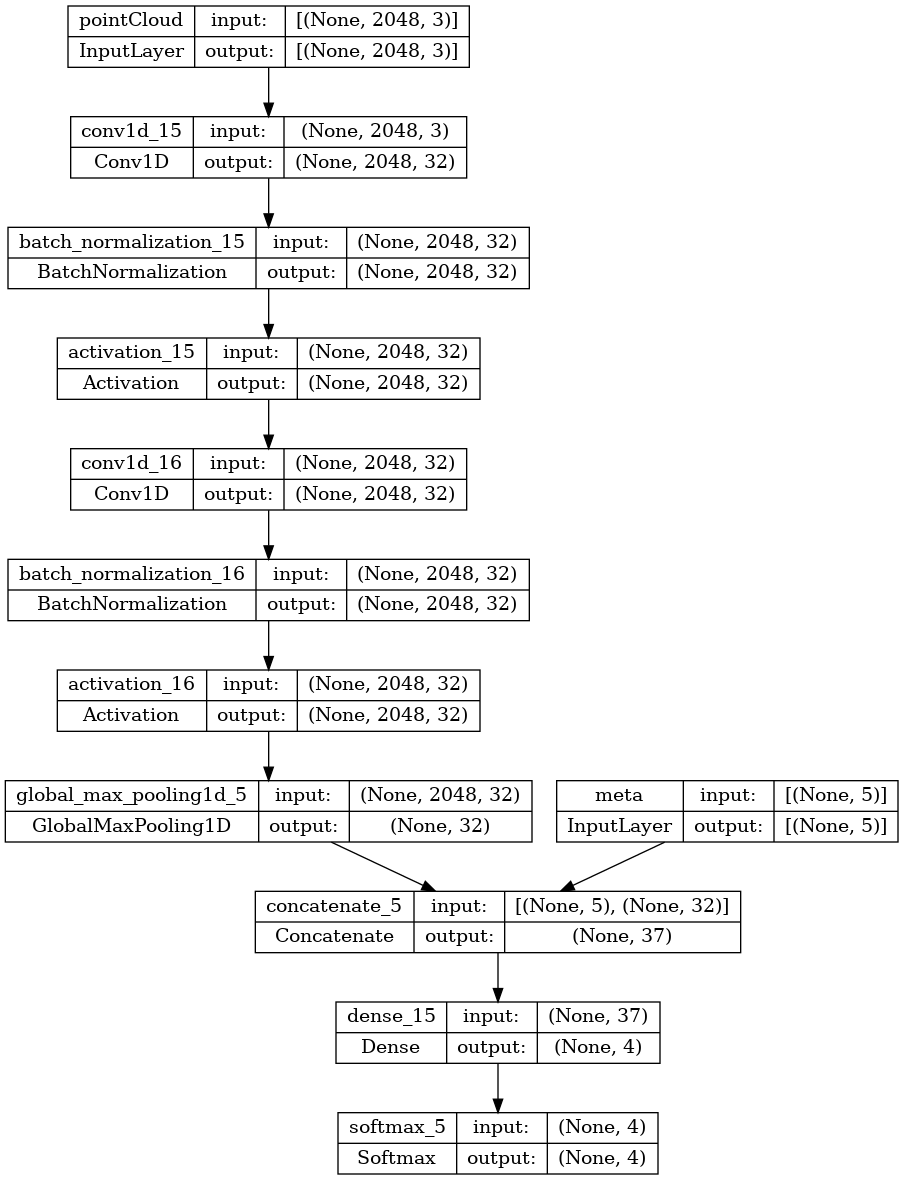

In [74]:
loaded_study = optuna.load_study(study_name='office10_is_test', storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)
keras.utils.plot_model(best_model, show_shapes=True)

In [142]:
import pandas as pd

def plot_history(history:dict, ymax:float=None):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss(MSE)")
    if ymax is not None:
        plt.ylim(0., ymax)
    plt.show()

    acc_df = history_df[["sparse_categorical_accuracy", "val_sparse_categorical_accuracy"]]
    acc_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0., 1.)
    plt.show()

## チューニングの再現

In [127]:
from keras.callbacks import TensorBoard
import datetime

tb_log_dir = "/mnt/MachineLearning/tblogs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("tb_log_dir = ", tb_log_dir)
# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

"""
チューニング結果を確認するため、改めてチューニング時と同じデータセットで学習
最終テストは行わない
"""
tuning_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    val_office = val_office_list[0]
    train_office_list = [office for office in fit_office_list if office != val_office]
    
    X_dict_train, y_train = get_officeDataset(train_office_list, df_ml, pointCloud_dict,
                                              objective_col="countTimeMean_bin", shuffle=True)
    X_dict_val, y_val = get_officeDataset([val_office], df_ml, pointCloud_dict,
                                          objective_col="countTimeMean_bin", shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)
    
    print(best_model.summary())
    
    tuning_history = best_model.fit(
        X_dict_train, y_train,
        validation_data = (X_dict_val, y_val),
        epochs = 200,
        batch_size=loaded_study.best_params["batch_size"],
        callbacks = [
            EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10),
            TensorBoard(log_dir=tb_log_dir+"/"+test_office, histogram_freq=1, write_graph=True)
        ],
        # verbose=False,
    )

    tuning_dict[test_office] = {"best_trial":best_trial, "history":tuning_history}


tb_log_dir =  /mnt/MachineLearning/tblogs/20221224-005855
test_office: office1
Model: "predictionnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pointCloud (InputLayer)        [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d_43 (Conv1D)             (None, 2048, 32)     128         ['pointCloud[0][0]']             
                                                                                                  
 batch_normalization_43 (BatchN  (None, 2048, 32)    128         ['conv1d_43[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activa

In [128]:
tb_log_dir

'/mnt/MachineLearning/tblogs/20221224-005855'

In [129]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [130]:
%tensorboard  --logdir $tb_log_dir

Best trial (test for office1):
  Value: 1.2636399269104004
  Params: 
    activation: ReLU
    batch_size: 128
    conv_layers: 1
    dense_layers: 1
    dropout: None
    filters-0: 32
    lr: 1.827963196886808e-05
    units-0: 512


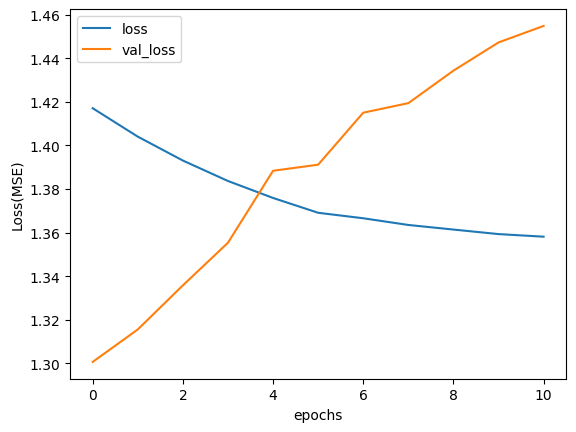

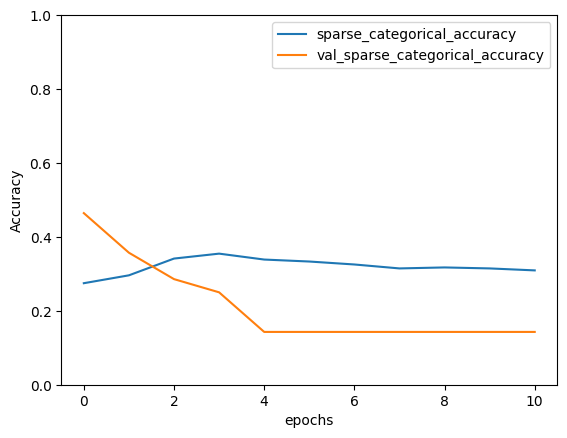

Best trial (test for office7):
  Value: 1.181649088859558
  Params: 
    activation: LeakyReLU
    batch_size: 32
    conv_layers: 2
    dense_layers: 4
    dropout: 0.3
    filters-0: 32
    filters-1: 32
    lr: 0.0002543003892719255
    units-0: 128
    units-1: 128
    units-2: 448
    units-3: 448


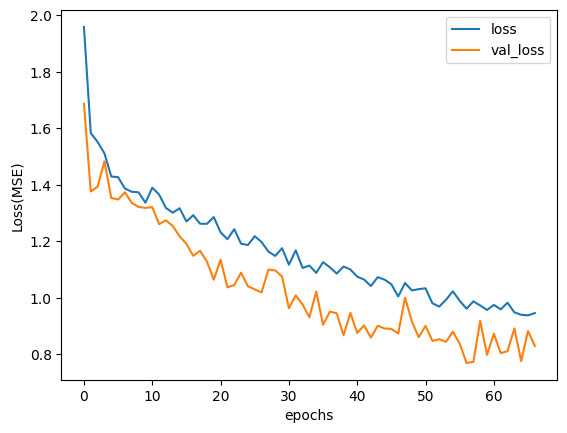

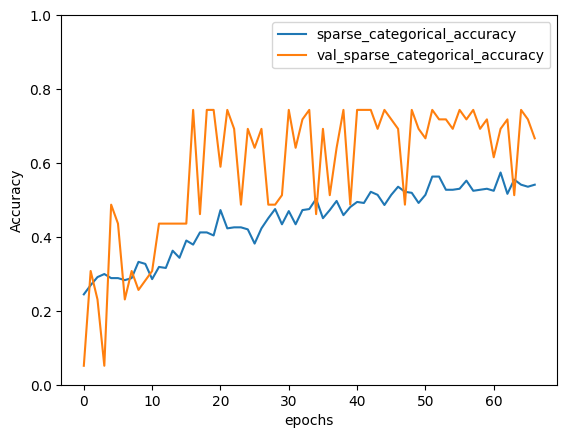

Best trial (test for office10):
  Value: 1.2087711811065673
  Params: 
    batch_size: 128
    conv_layers: 2
    dense_layers: 0
    filters-0: 32
    filters-1: 32
    lr: 0.09895876709162278


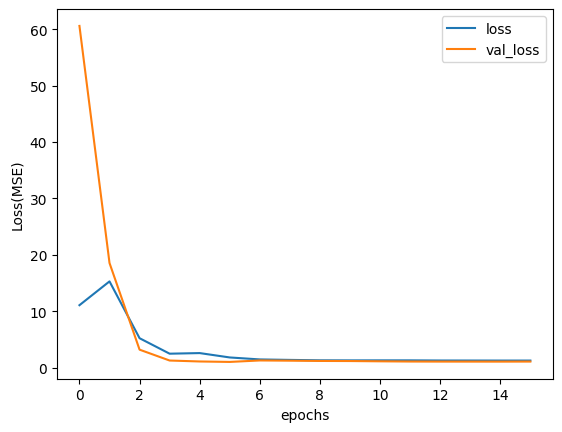

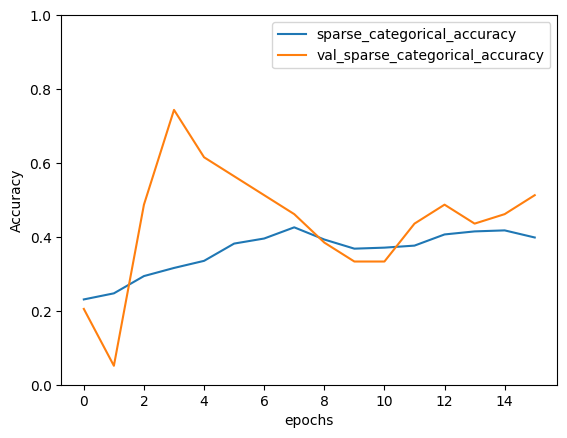

Best trial (test for office16):
  Value: 1.3043208837509155
  Params: 
    activation: ReLU
    batch_size: 128
    conv_layers: 2
    dense_layers: 4
    dropout: 0.5
    filters-0: 224
    filters-1: 32
    lr: 1.450725152043643e-05
    units-0: 256
    units-1: 64
    units-2: 64
    units-3: 192


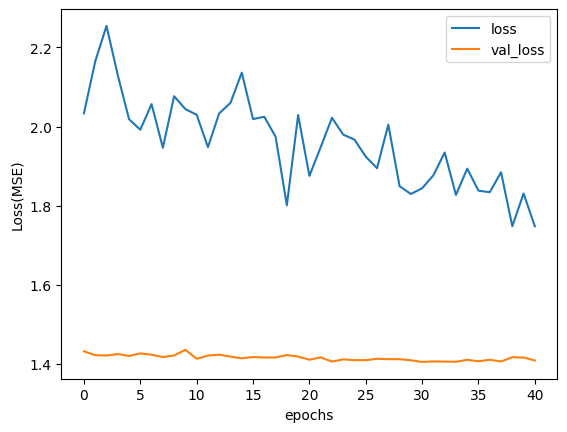

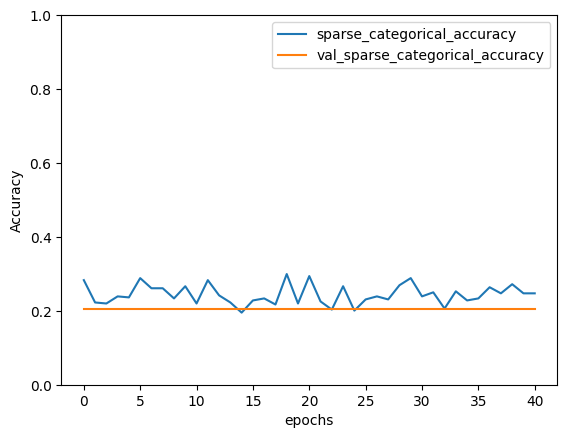

Best trial (test for office22):
  Value: 1.0908784985542297
  Params: 
    activation: ReLU
    batch_size: 64
    conv_layers: 2
    dense_layers: 2
    dropout: 0.3
    filters-0: 32
    filters-1: 32
    lr: 0.0007930177772525483
    units-0: 128
    units-1: 512


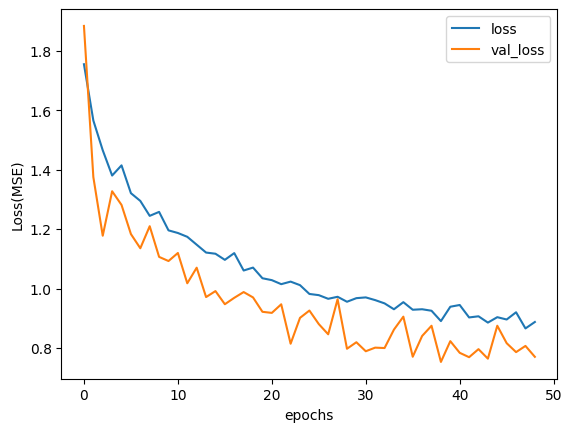

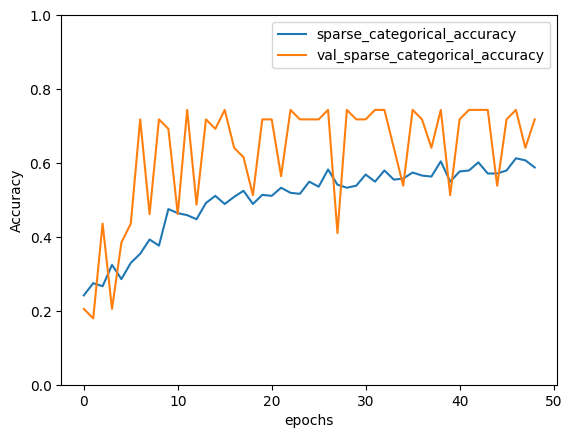

Best trial (test for office28):
  Value: 1.1408403158187865
  Params: 
    activation: ReLU
    batch_size: 32
    conv_layers: 3
    dense_layers: 2
    dropout: 0.5
    filters-0: 160
    filters-1: 128
    filters-2: 32
    lr: 0.00022205202904007442
    units-0: 256
    units-1: 448


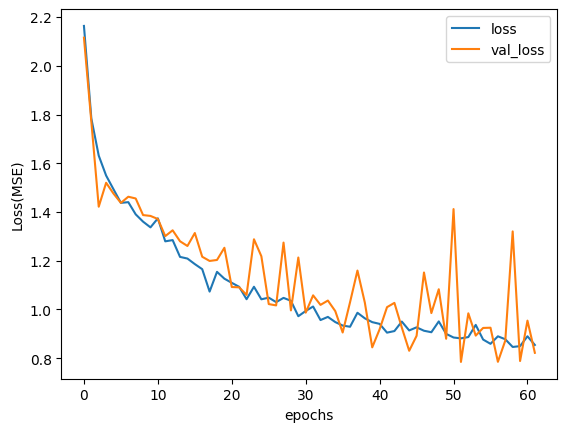

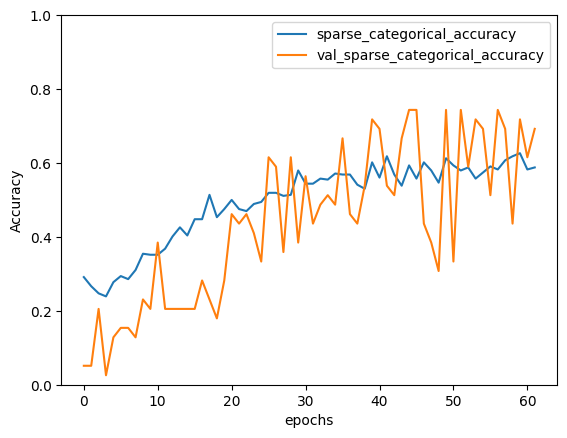

In [143]:
for test_office, result_dict in tuning_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
    plot_history(result_dict["history"].history)

## 最終テスト

In [134]:
"""
最終テスト
チューナーに与えなかったオフィスを使って検証
"""

# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

test_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_office_list = [office for office in office_list if office != test_office]
    
    X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict,
                                          objective_col="countTimeMean_bin", shuffle=True)
    X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict,
                                            objective_col="countTimeMean_bin", shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)

    test_history = best_model.fit(
        X_dict_fit, y_fit,
        batch_size = loaded_study.best_params["batch_size"],
        epochs = 200,
        validation_data = (X_dict_test, y_test),
        # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
    )
    
    test_dict[test_office] = {"best_trial":best_trial, "history":test_history}


test_office: office1
Epoch 1/200
4/4 [==============================] - 1s 79ms/step - loss: 2.2179 - sparse_categorical_accuracy: 0.2679 - val_loss: 3.3512 - val_sparse_categorical_accuracy: 0.0513
Epoch 2/200
4/4 [==============================] - 0s 22ms/step - loss: 2.1362 - sparse_categorical_accuracy: 0.2679 - val_loss: 3.2942 - val_sparse_categorical_accuracy: 0.0513
Epoch 3/200
4/4 [==============================] - 0s 22ms/step - loss: 2.0559 - sparse_categorical_accuracy: 0.2679 - val_loss: 3.0212 - val_sparse_categorical_accuracy: 0.0513
Epoch 4/200
4/4 [==============================] - 0s 24ms/step - loss: 1.9836 - sparse_categorical_accuracy: 0.2679 - val_loss: 3.0209 - val_sparse_categorical_accuracy: 0.0513
Epoch 5/200
4/4 [==============================] - 0s 21ms/step - loss: 1.9109 - sparse_categorical_accuracy: 0.2679 - val_loss: 2.9119 - val_sparse_categorical_accuracy: 0.0513
Epoch 6/200
4/4 [==============================] - 0s 24ms/step - loss: 1.8467 - sparse_c

Best trial (test for office1):
  Value: 1.2636399269104004
  Params: 
    activation: ReLU
    batch_size: 128
    conv_layers: 1
    dense_layers: 1
    dropout: None
    filters-0: 32
    lr: 1.827963196886808e-05
    units-0: 512


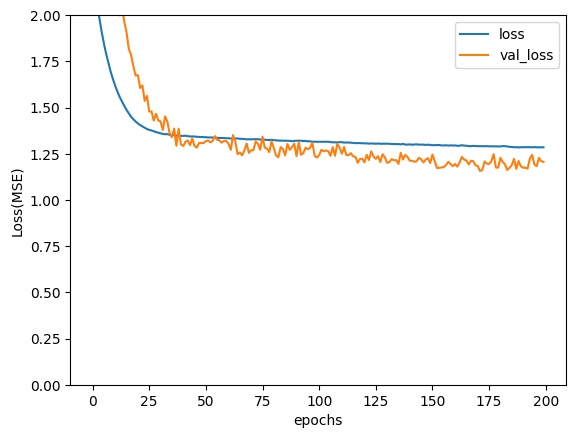

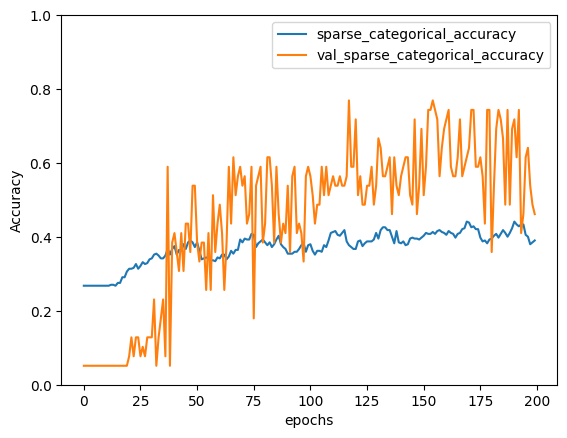

Best trial (test for office7):
  Value: 1.181649088859558
  Params: 
    activation: LeakyReLU
    batch_size: 32
    conv_layers: 2
    dense_layers: 4
    dropout: 0.3
    filters-0: 32
    filters-1: 32
    lr: 0.0002543003892719255
    units-0: 128
    units-1: 128
    units-2: 448
    units-3: 448


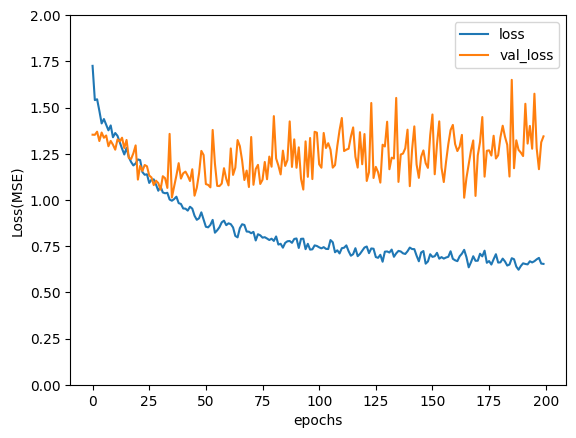

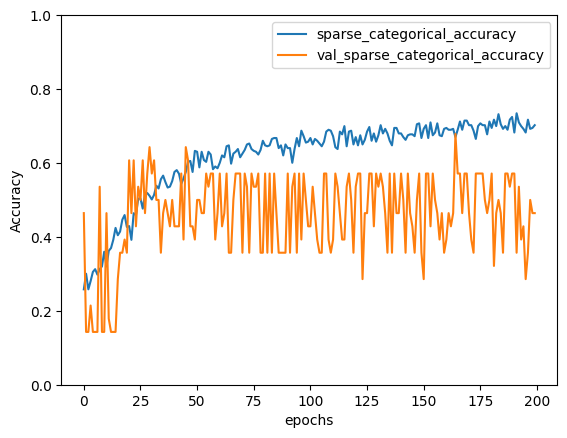

Best trial (test for office10):
  Value: 1.2087711811065673
  Params: 
    batch_size: 128
    conv_layers: 2
    dense_layers: 0
    filters-0: 32
    filters-1: 32
    lr: 0.09895876709162278


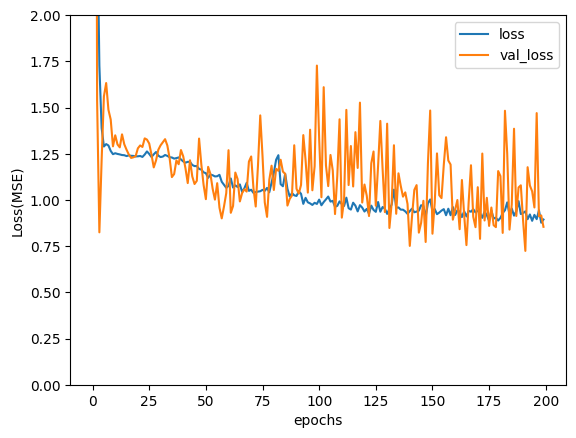

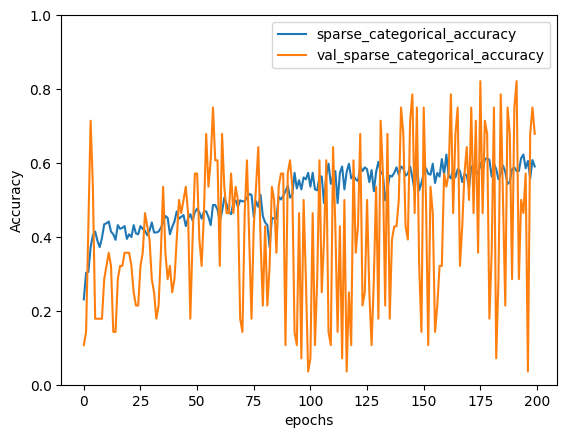

Best trial (test for office16):
  Value: 1.3043208837509155
  Params: 
    activation: ReLU
    batch_size: 128
    conv_layers: 2
    dense_layers: 4
    dropout: 0.5
    filters-0: 224
    filters-1: 32
    lr: 1.450725152043643e-05
    units-0: 256
    units-1: 64
    units-2: 64
    units-3: 192


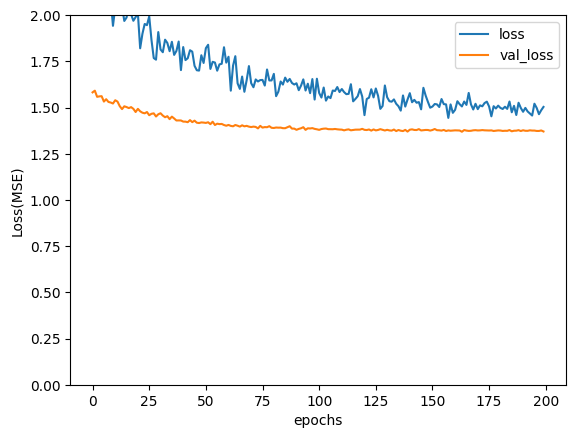

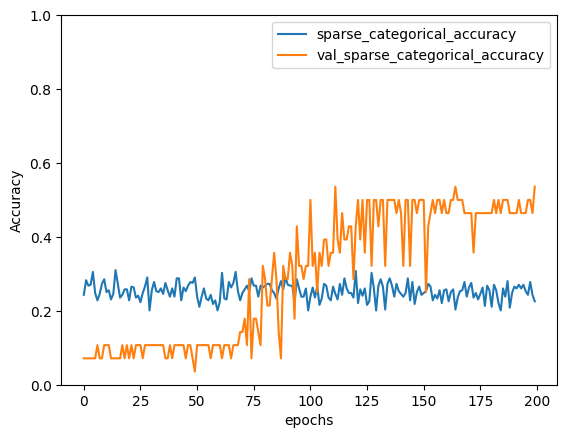

Best trial (test for office22):
  Value: 1.0908784985542297
  Params: 
    activation: ReLU
    batch_size: 64
    conv_layers: 2
    dense_layers: 2
    dropout: 0.3
    filters-0: 32
    filters-1: 32
    lr: 0.0007930177772525483
    units-0: 128
    units-1: 512


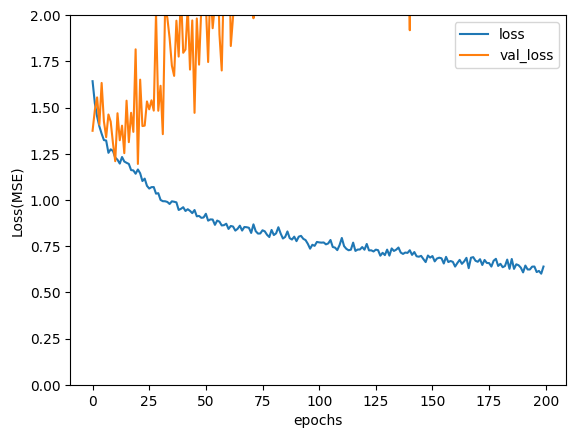

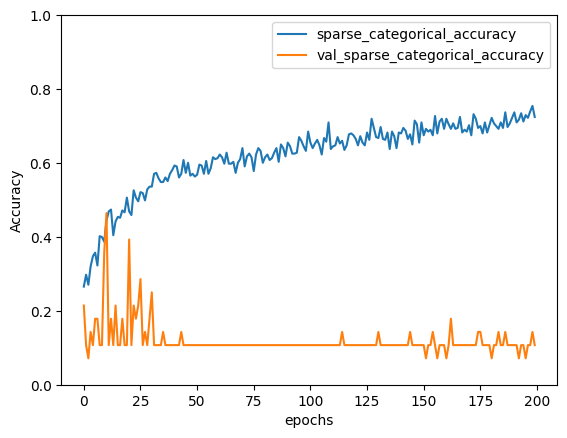

Best trial (test for office28):
  Value: 1.1408403158187865
  Params: 
    activation: ReLU
    batch_size: 32
    conv_layers: 3
    dense_layers: 2
    dropout: 0.5
    filters-0: 160
    filters-1: 128
    filters-2: 32
    lr: 0.00022205202904007442
    units-0: 256
    units-1: 448


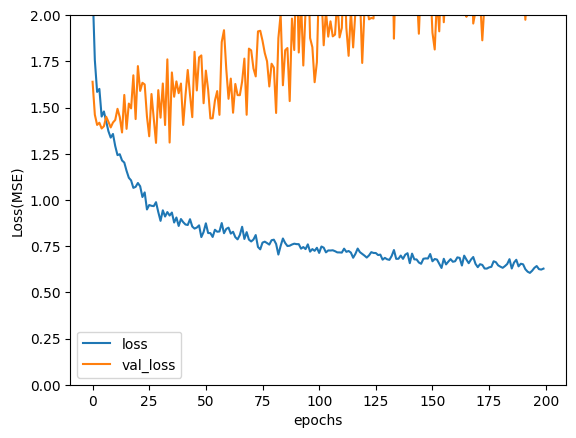

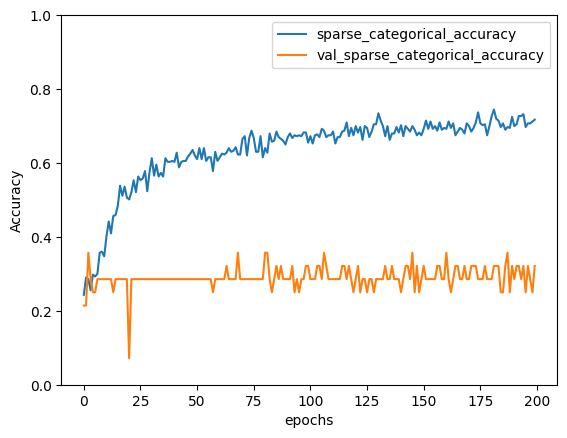

In [144]:
for test_office, result_dict in test_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
        
    plot_history(result_dict["history"].history, ymax=2.)

In [147]:
"""
最終テスト
only office10
"""

test_office="office10"

print("test_office:", test_office)
fit_office_list = [office for office in office_list if office != test_office]
    
X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict,
                                      objective_col="countTimeMean_bin", shuffle=True)
X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict,
                                      objective_col="countTimeMean_bin", shuffle=False)

study_name = test_office + '_is_test'

loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)

test_history = best_model.fit(
    X_dict_fit, y_fit,
    batch_size = loaded_study.best_params["batch_size"],
    epochs = 200,
    validation_data = (X_dict_test, y_test),
    # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
)



test_office: office10
Epoch 1/200
4/4 [==============================] - 1s 74ms/step - loss: 10.8042 - sparse_categorical_accuracy: 0.2357 - val_loss: 10.5178 - val_sparse_categorical_accuracy: 0.1071
Epoch 2/200
4/4 [==============================] - 0s 17ms/step - loss: 7.5312 - sparse_categorical_accuracy: 0.2457 - val_loss: 2.4806 - val_sparse_categorical_accuracy: 0.2500
Epoch 3/200
4/4 [==============================] - 0s 18ms/step - loss: 2.9165 - sparse_categorical_accuracy: 0.2928 - val_loss: 3.2021 - val_sparse_categorical_accuracy: 0.1429
Epoch 4/200
4/4 [==============================] - 0s 17ms/step - loss: 1.9828 - sparse_categorical_accuracy: 0.3846 - val_loss: 2.3932 - val_sparse_categorical_accuracy: 0.1071
Epoch 5/200
4/4 [==============================] - 0s 16ms/step - loss: 1.6095 - sparse_categorical_accuracy: 0.3821 - val_loss: 1.7381 - val_sparse_categorical_accuracy: 0.1071
Epoch 6/200
4/4 [==============================] - 0s 16ms/step - loss: 1.3942 - spars

  Value: 1.2087711811065673
  Params: 
    batch_size: 128
    conv_layers: 2
    dense_layers: 0
    filters-0: 32
    filters-1: 32
    lr: 0.09895876709162278


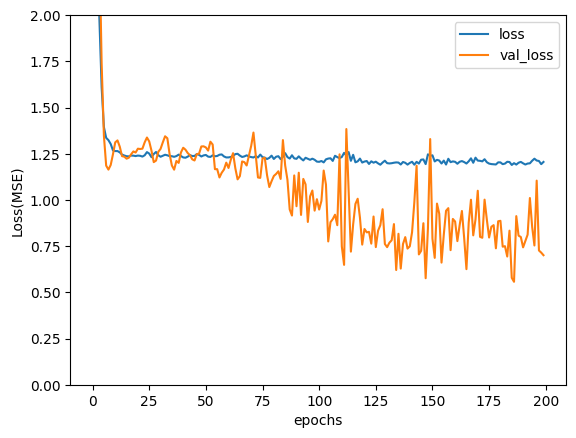

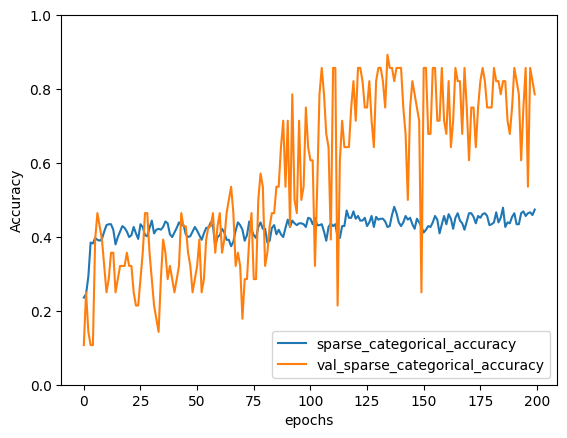

In [148]:
print("  Value: {}".format(best_trial.value))

print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

plot_history(test_history.history, ymax=2.)

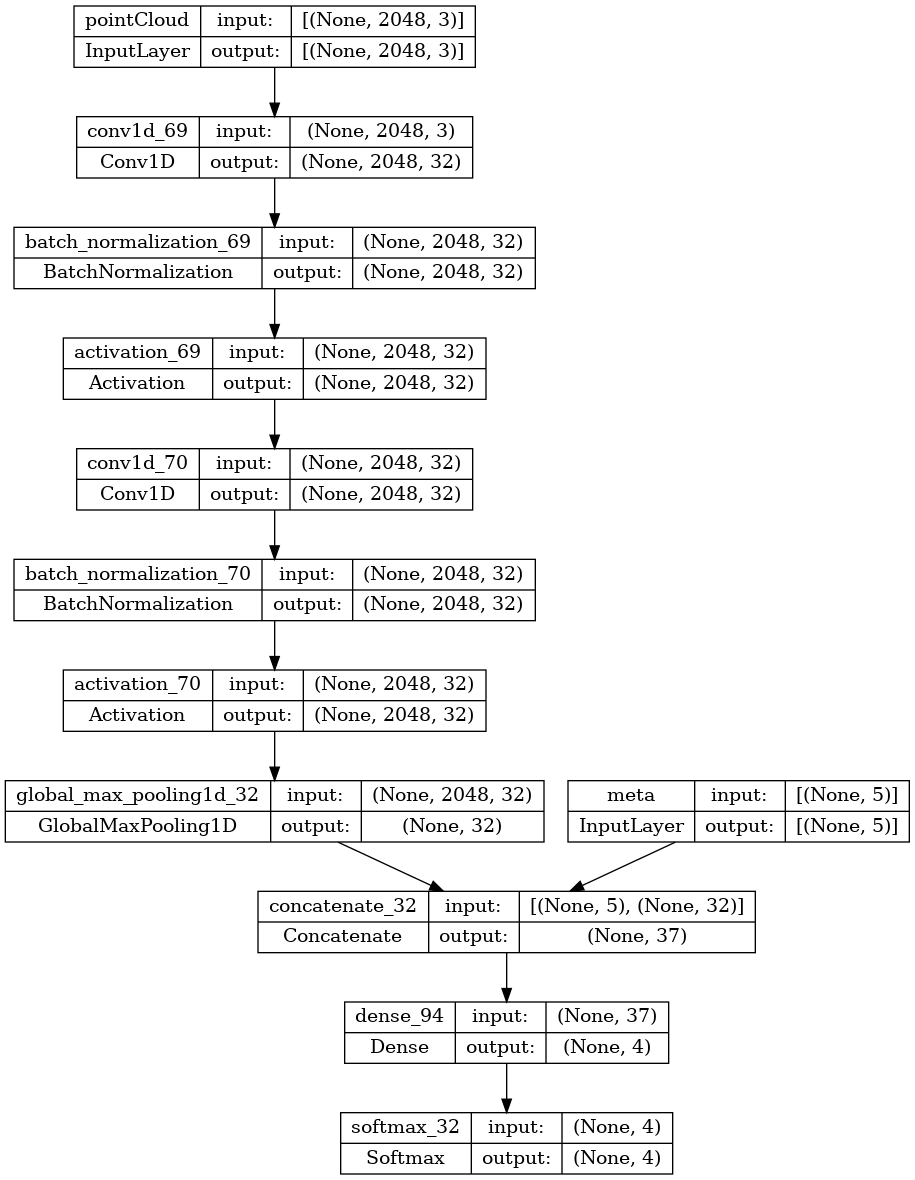

In [149]:
keras.utils.plot_model(best_model, show_shapes=True)

In [150]:
y_fit_pred_softmax = best_model.predict(X_dict_fit)
y_test_pred_softmax = best_model.predict(X_dict_test)

1/1 [==============================] - 0s 20ms/step


In [151]:
y_test.values

array([2, 3, 2, 3, 3, 3, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [152]:
y_test_pred = y_test_pred_softmax.argmax(axis=1)
y_test_pred

array([3, 3, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [153]:
result_df = pd.DataFrame({"correct":y_test, "predict":y_test_pred})
result_df["match"] = (result_df["correct"] == result_df["predict"])
result_df

,correct,predict,match
case_name,,,
office10_0_0,2,3,False
office10_0_164_aout,3,3,True
office10_0_164_bout,2,3,False
office10_0_246_aout,3,2,False
office10_0_246_bout,3,3,True
office10_0_82_aout,3,0,False
office10_0_82_bout,2,0,False
office10_360_0,0,0,True
office10_360_164_aout,0,0,True


In [343]:
def show_office_residual_plot(train_x, train_y, test_x, test_y, office_array, figsize=[10, 8]):
    xlim = [min(min(train_x), min(test_x))-5, max(max(train_x), max(test_x))+5]
    fig= plt.figure(figsize=figsize)

    plt.figure(figsize=[10, 8])

    #カラーマップ等の準備
    markers = ("s", "x", "o", "^", "v", "<", ">", "1", "2", "3", "4", "8")
    colors = ("red", "blue", "limegreen", "gray", "cyan", "black", "purple", "green",
              "orange", "yellow", "crimson", "goldenrod", "orchid", "khaki", "darkgray")

    idx = 0
    for target_office_name in np.unique(office_list):
        if target_office_name == "office10":
            continue
            
        target_office_index = [i for i in range(len(office_array)) if target_office_name+"_" in office_array[i]]
        print(target_office_name, len(target_office_index))
        
        plt.scatter(train_x[target_office_index], train_y[target_office_index], 
                    s=80, c=colors[idx], marker=markers[2], edgecolor="white", label="Training:"+target_office_name)
        
        idx+=1
        
    plt.scatter(test_x, test_y, s=80, c="steelblue", marker="x", edgecolor="white", label="Test data")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc="best")
    plt.hlines(y=0, xmin=xlim[0], xmax=xlim[1], color="black", lw=2)
    plt.xlim(xlim)
    plt.tight_layout()
    plt.show()

In [344]:
y_fit.to_numpy().shape

(140,)

In [ ]:
X_dict_fit["meta"].index

In [ ]:
# #正規表現で書いており、.extractはパターンにマッチした最初の文字列のみを抜き出す。office+0-9までの数字1桁または2桁を探索
# office_array = X_index.str.extract("(office+[0-9]{1,2})").to_numpy()

#残差プロット
show_office_residual_plot(train_x=y_fit_pred, train_y=y_fit_pred - y_fit.to_numpy().reshape((-1,1)), 
                            test_x=y_test_pred, test_y=y_test_pred - y_test.to_numpy().reshape((-1,1)), 
                            office_array=X_dict_fit["meta"].index
                                  )

In [133]:
X_dict_fit

{'meta': array([[-1.38455178,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        [-1.38455178,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        ...,
        [ 0.44645519,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108, -0.68946029, -0.87131147,  1.14769521, -0.39824886],
        [ 0.44645519, -1.66695169, -0.87131147, -0.87131147,  2.51099278]]),
 'pointCloud_aircon': array([[[ 1.3765091 , -2.0106473 , -0.52029866],
         [ 1.3765091 , -1.8412895 , -0.52029866],
         [ 1.3765091 , -1.7396748 , -0.52029866],
         ...,
         [ 2.7313716 , -0.92675734, -0.52029866],
         [ 2.7313716 , -0.8251426 , -0.52029866],
         [ 2.7313716 , -0.6557848 , -0.52029866]],
 
        [[-0.6557848 , -0.99450046, -0.52029866],
         [-0.6557848 , -0.8251426 , -0.52029866],
         [-0.6557848 , -0.72352785, -0.52029866],
         ...,
         [ 0.6990778 ,  0

In [85]:
df_total

,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off,n_from2sec/S_bin,countTimeMean_bin
case_name,,,,,,,,,,,,
office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1,3,3
office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0,3,3
office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0,2,2
office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0,3,3
office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0,1,3
office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0,0,3
office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0,0,3


In [94]:
def plot_RoI_level(classification_level):
    #オフィスごとのRoI_levelをカウントしてみる
    unique_office = np.unique(office_list)
    num_RoI_level = np.zeros((len(unique_office), classification_level))#ラベルのカウント数を保存するリスト

    #各オフィスにアクセスするループ
    count = 0#ループの回数をカウントする
    for selected_office in unique_office:
        df_selected_office = df_total[df_total["office"]==selected_office]
        #各ラベルの個数カウント
        for i in range(classification_level):
            num_RoI_level[count, i] = (df_selected_office['countTimeMean_bin'] == i).sum()

        count += 1


    #グラフの描画
    colors = ("steelblue", "limegreen", "gold","orange","crimson")
    plt.figure(figsize=[12, 8]) 
    virtical = num_RoI_level#縦軸の値
    horizontal = np.arange(unique_office.shape[0])#横軸の値
    for level in range(classification_level):
        plt.bar(x=horizontal, height=virtical[:, level], tick_label=unique_office, bottom=virtical[:, :level].sum(axis=1), color=colors[level])

    plt.ylabel("count")
    plt.xlabel("office name")
    plt.legend(np.arange(classification_level), loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()

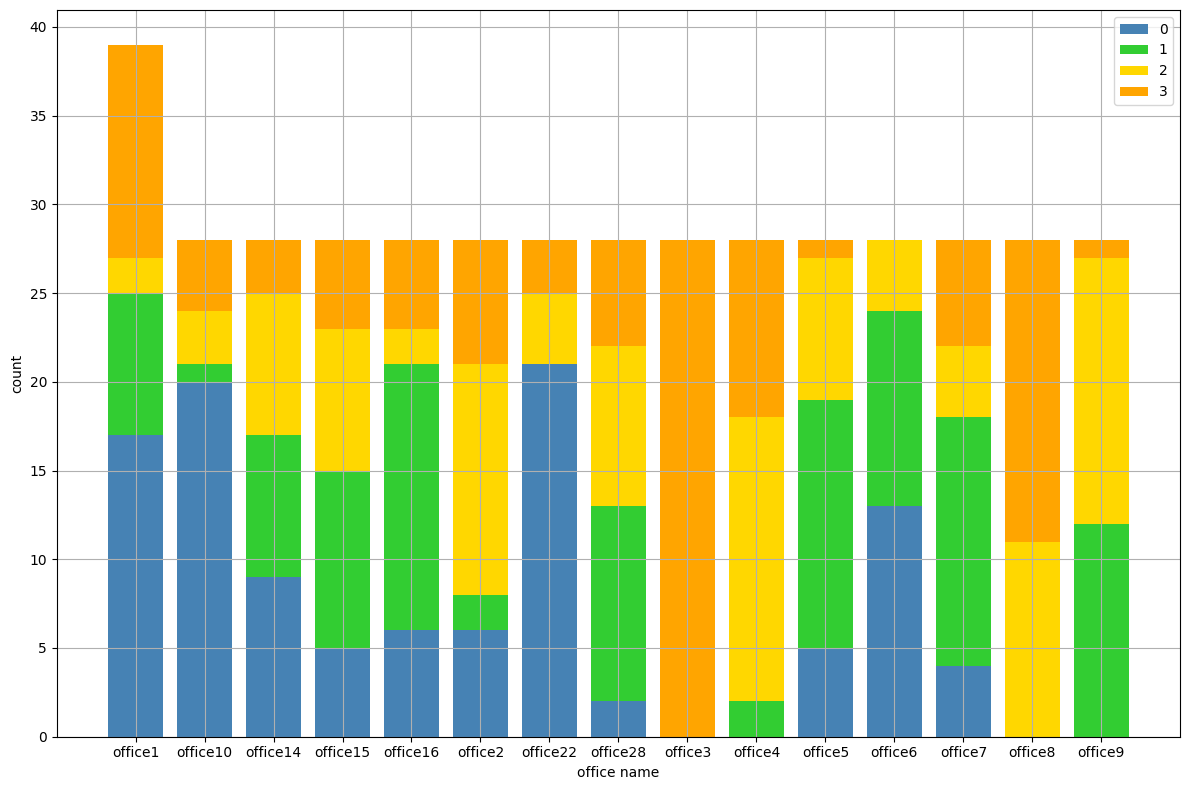

In [95]:
plot_RoI_level(4)

In [158]:
idealOffice_list = []

for office in office_list:
    df_office = df_total[df_total["office"]==office]
    if df_office["countTimeMean_bin"].nunique() == 4:
        idealOffice_list.append(office)
        
idealOffice_list

['office2',
 'office15',
 'office14',
 'office1',
 'office16',
 'office7',
 'office10',
 'office28',
 'office5']

In [78]:
import gc
 
gc.collect()

8887

In [79]:
from keras.backend import clear_session

# Clear clutter from previous Keras session graphs.
clear_session()